In [1]:
state = 'NE' 
year = 2020
obj_type = 'cut_edges'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of NE has 3 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from NE_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 1403 plans from file.


In [6]:
from pareto import filter_and_sort_pareto
from metrics import scores

plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
_,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
print(f"Selected {len(nondominated_warm_starts_plans)} nondominated warm start plans")

Selected 21 nondominated warm start plans


In [7]:
from epsilon_constraint import epsilon_constraint_method

(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )

Initially, L = 647297 and U = 660373 and k = 3.

****************************************
Trying deviation = 6538.346666666666
****************************************
Using user-provided warm starts.
Selected warm_start = [[9, 16, 26, 76], [0, 1, 2, 3, 4, 5, 8, 11, 12, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 66, 67, 68, 70, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92], [6, 7, 10, 21, 28, 47, 61, 65, 69, 71, 87, 91]]
Objective value: 15
Deviation: 4554.666666666628

****************************************
Running labeling model!
****************************************
L = 647297 and U = 660373 and k = 3
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering

     0     0   13.21894    0  362   17.00000   13.21894  22.2%     -    1s
     0     0   13.21896    0  366   17.00000   13.21896  22.2%     -    1s
     0     0   13.23671    0  368   17.00000   13.23671  22.1%     -    1s
     0     0   13.24806    0  372   17.00000   13.24806  22.1%     -    1s
     0     0   13.24827    0  370   17.00000   13.24827  22.1%     -    1s
     0     0   13.25063    0  370   17.00000   13.25063  22.1%     -    1s
     0     0   13.25286    0  371   17.00000   13.25286  22.0%     -    1s
     0     0   13.25297    0  356   17.00000   13.25297  22.0%     -    1s
     0     0   13.25505    0  369   17.00000   13.25505  22.0%     -    1s
     0     0   13.25668    0  367   17.00000   13.25668  22.0%     -    1s
     0     0   13.25740    0  368   17.00000   13.25740  22.0%     -    1s
     0     0   13.26137    0  377   17.00000   13.26137  22.0%     -    1s
     0     0   13.26137    0  377   17.00000   13.26137  22.0%     -    1s
     0     2   13.26525  

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.73318    0  256   22.00000   11.73318  46.7%     -    0s
     0     0   12.63366    0  259   22.00000   12.63366  42.6%     -    0s
     0     0   12.82739    0  336   22.00000   12.82739  41.7%     -    0s
     0     0   12.83621    0  337   22.00000   12.83621  41.7%     -    0s
     0     0   12.94319    0  343   22.00000   12.94319  41.2%     -    0s
     0     0   12.94484    0  344   22.00000   12.94484  41.2%     -    0s
     0     0   12.94860    0  350   22.00000   12.94860  41.1%     -    0s
     0     0   12.96009    0  364   22.00000   12.96009  41.1%     -    0s
     0     0   12.96023    0  369   22.00000   12.96023  41.1%     -    0s
     0     0   12.96545    0  372   22.00000   12.96545  41.1%     -    0s
     0     0   12.96708    0  373   22.00000   12.96708  41.1%     -    0s
     0     0   12.96708    0  372   22.00000   12.96708  41.1%     -    0s
     0     2   12.9719

Loaded user MIP start with objective 24

Presolve removed 1986 rows and 1409 columns
Presolve time: 0.03s
Presolved: 1818 rows, 1834 columns, 6332 nonzeros
Variable types: 0 continuous, 1834 integer (1834 binary)

Root relaxation: objective 1.173696e+01, 2060 iterations, 0.06 seconds (0.05 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.73696    0  256   24.00000   11.73696  51.1%     -    0s
     0     0   12.84980    0  260   24.00000   12.84980  46.5%     -    0s
     0     0   13.22189    0  247   24.00000   13.22189  44.9%     -    0s
     0     0   13.33537    0  331   24.00000   13.33537  44.4%     -    0s
     0     0   13.34618    0  255   24.00000   13.34618  44.4%     -    0s
     0     0   13.35146    0  341   24.00000   13.35146  44.4%     -    0s
     0     0   13.35709    0  332   24.00000   13.35709  44.3%     -    0s
     0     0   13.38

Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 3804 rows, 3243 columns and 12403 nonzeros
Model fingerprint: 0x6eb3e23b
Variable types: 837 continuous, 2406 integer (2406 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]

User MIP start produced solution with objective 28 (0.01s)
Loaded user MIP start with objective 28

Presolve removed 1972 rows and 1399 columns
Presolve time: 0.02s
Presolved: 1832 rows, 1844 columns, 6381 nonzeros
Variable types: 0 continuous, 184

  8054  3424   22.55070   48  233   32.00000   17.68993  44.7%  80.5   10s
 14395  6166   27.10407   34  344   32.00000   19.11230  40.3%  80.9   15s
 23415  9967 infeasible   48        32.00000   20.16513  37.0%  78.9   20s
 32012 12681     cutoff   33        32.00000   21.03802  34.3%  78.7   25s
 40576 14692   30.48113   35  423   32.00000   21.70425  32.2%  80.1   30s
 45648 15837   25.88126   41  293   32.00000   22.28267  30.4%  80.6   35s
 53962 16699 infeasible   44        32.00000   23.06179  27.9%  81.7   41s
 59455 17053 infeasible   37        32.00000   23.50473  26.5%  81.8   46s
 66268 17206 infeasible   34        32.00000   24.12220  24.6%  82.3   50s
 74228 16858   30.11339   27  224   32.00000   24.73051  22.7%  82.7   56s
 82310 16275   27.97892   35  259   32.00000   25.28923  21.0%  82.9   61s
 87914 15364     cutoff   46        32.00000   25.77432  19.5%  83.0   65s
 96396 13748   29.01762   28   87   32.00000   26.34384  17.7%  82.8   70s
 105041 11473   27.16027 


****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[9, 10, 26, 43, 46, 76], [7, 16, 20, 21, 22, 37, 44, 47, 65, 71, 72], [0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 17, 18, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]]

****************************************
Trying deviation = 151.16666666670548
****************************************
Using user-provided warm starts.
Selected warm_start = [[4, 16, 40, 44, 59, 72, 76, 81], [0, 1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 15, 17, 18, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 45, 46, 49, 50, 52, 53, 54, 55, 56, 57, 58, 61, 62, 63, 64, 66, 67, 68, 70, 73, 74, 75, 77, 78, 79, 80, 82, 83, 84, 85, 86, 88, 89, 90, 92], [6, 7, 10, 19, 22, 

 346809 51737   34.23525   37  178   42.00000   33.31878  20.7%  74.2  325s
 353109 51464   34.41929   32  394   42.00000   33.46132  20.3%  74.2  330s
 359225 51239   40.51680   36  149   42.00000   33.58098  20.0%  74.3  335s
 367455 50799   36.52949   39  305   42.00000   33.75775  19.6%  74.3  341s
 373666 50561   40.53390   29  418   42.00000   33.88860  19.3%  74.3  345s
 380186 50507   37.35239   35  251   42.00000   34.00599  19.0%  74.3  351s
 386475 50183   37.03439   52   25   42.00000   34.11219  18.8%  74.3  355s
 392720 49854     cutoff   30        42.00000   34.24091  18.5%  74.3  360s
 398927 49668   39.98270   49   55   42.00000   34.35978  18.2%  74.2  365s
 407325 49042   38.21385   37  266   42.00000   34.51378  17.8%  74.2  371s
 413202 48635   38.96744   29  310   42.00000   34.61056  17.6%  74.1  375s
 419362 48027 infeasible   36        42.00000   34.74693  17.3%  74.1  380s
 425631 47489 infeasible   29        42.00000   34.87531  17.0%  74.1  385s
 434006 4677

     0     0   11.10486    0  329   43.00000   11.10486  74.2%     -    1s
     0     0   11.12100    0  349   43.00000   11.12100  74.1%     -    1s
     0     0   11.12249    0  354   43.00000   11.12249  74.1%     -    1s
     0     0   11.17939    0  384   43.00000   11.17939  74.0%     -    1s
     0     0   11.19084    0  350   43.00000   11.19084  74.0%     -    1s
     0     0   11.19370    0  352   43.00000   11.19370  74.0%     -    1s
     0     0   11.19370    0  352   43.00000   11.19370  74.0%     -    1s
     0     0   11.21550    0  348   43.00000   11.21550  73.9%     -    1s
     0     0   11.22544    0  311   43.00000   11.22544  73.9%     -    1s
     0     0   11.22806    0  381   43.00000   11.22806  73.9%     -    1s
     0     0   11.22930    0  378   43.00000   11.22930  73.9%     -    1s
     0     0   11.22987    0  384   43.00000   11.22987  73.9%     -    1s
     0     0   11.30177    0  414   43.00000   11.30177  73.7%     -    1s
     0     0   11.32505  

 359980 58937   37.97411   49  115   43.00000   35.41474  17.6%  93.0  406s
 364291 58581   38.39492   28  337   43.00000   35.52231  17.4%  92.9  412s
 368437 58199   39.01259   34  356   43.00000   35.61782  17.2%  92.9  417s
 370734 57970   37.81011   37  101   43.00000   35.66667  17.1%  92.9  420s
 374806 57706   40.31630   33  391   43.00000   35.76041  16.8%  92.9  426s
 379091 57320     cutoff   32        43.00000   35.86108  16.6%  92.9  431s
 382769 56786 infeasible   42        43.00000   35.95339  16.4%  92.9  436s
 386936 56277   37.53072   44  253   43.00000   36.04992  16.2%  92.8  442s
 388875 56080     cutoff   57        43.00000   36.08641  16.1%  92.8  445s
 393441 55398   41.01517   46  127   43.00000   36.18567  15.8%  92.7  451s
 397694 54825   37.15470   50  231   43.00000   36.29233  15.6%  92.7  456s
 402178 54093   37.86518   35  302   43.00000   36.39044  15.4%  92.6  462s
 404163 53757 infeasible   31        43.00000   36.42944  15.3%  92.6  465s
 408592 5310

     0     0   13.05421    0  368   45.00000   13.05421  71.0%     -    0s
     0     2   13.07159    0  368   45.00000   13.07159  71.0%     -    0s
  2391  1811   29.89246   28  108   45.00000   16.45397  63.4%  78.7    5s
  8264  4738   34.61017   45  231   45.00000   17.56811  61.0%  69.9   10s
 14309  8579   40.94308   58   69   45.00000   19.55071  56.6%  69.4   15s
 23019 13418 infeasible   54        45.00000   21.71342  51.7%  71.3   20s
 29952 17006   29.94212   27  164   45.00000   22.53728  49.9%  72.3   25s
 37867 20481   43.10543   35  300   45.00000   23.15782  48.5%  72.8   30s
 43900 23287   32.71928   45  320   45.00000   23.57036  47.6%  73.1   35s
 51467 26369 infeasible   55        45.00000   24.02190  46.6%  73.5   41s
 57596 28966   31.30202   29  360   45.00000   24.41563  45.7%  74.2   46s
 63078 31116   38.70509   43   49   45.00000   24.72015  45.1%  74.7   50s
 69857 33678   36.90329   50   50   45.00000   25.00000  44.4%  75.2   55s
 75716 35988   37.74684  

 650180 147285   37.70922   38  101   45.00000   34.36482  23.6%  81.5  535s
 656449 147695   42.76894   35  285   45.00000   34.41258  23.5%  81.6  541s
 662526 148259 infeasible   52        45.00000   34.45854  23.4%  81.6  546s
 669015 148908   38.78158   50   85   45.00000   34.51209  23.3%  81.6  551s
 673269 149143   41.46150   35  257   45.00000   34.53672  23.3%  81.6  555s
 679310 149675   38.39675   41   78   45.00000   34.58828  23.1%  81.6  560s
 685565 150207   39.42364   49   50   45.00000   34.63831  23.0%  81.6  566s
 689701 150415     cutoff   38        45.00000   34.66335  23.0%  81.6  570s
 695483 150688   39.49016   55   47   45.00000   34.71963  22.8%  81.6  575s
 701670 151047 infeasible   57        45.00000   34.77056  22.7%  81.7  580s
 707815 151259   41.87447   37  284   45.00000   34.82356  22.6%  81.7  585s
 711598 151520     cutoff   57        45.00000   34.84534  22.6%  81.7  590s
 717757 151732   43.27029   39   76   45.00000   34.90439  22.4%  81.7  596s

 1290235 120694 infeasible   53        45.00000   39.04055  13.2%  80.9 1066s
 1296281 119794     cutoff   35        45.00000   39.08550  13.1%  80.9 1070s
 1302467 118689     cutoff   39        45.00000   39.12839  13.0%  80.8 1075s
 1308144 117524     cutoff   38        45.00000   39.17136  13.0%  80.8 1081s
 1314728 116208   42.42719   48   74   45.00000   39.21955  12.8%  80.7 1086s
 1321036 115082     cutoff   49        45.00000   39.26965  12.7%  80.7 1091s
 1327394 113953   40.90456   37  181   45.00000   39.31350  12.6%  80.6 1096s
 1333576 112611   42.04868   45  153   45.00000   39.35792  12.5%  80.6 1101s
 1339778 111346     cutoff   48        45.00000   39.40304  12.4%  80.5 1105s
 1346063 110201   41.70821   40  268   45.00000   39.45211  12.3%  80.5 1111s
 1352226 108768   42.25780   42  283   45.00000   39.49574  12.2%  80.4 1115s
 1357177 107678     cutoff   38        45.00000   39.53466  12.1%  80.4 1121s
 1361342 106726 infeasible   38        45.00000   39.56948  12.1

  7991  4654   29.00000   32   16   46.00000   16.38690  64.4%  68.1   10s
 13172  8057   43.35518   52  138   46.00000   18.26224  60.3%  66.3   15s
 21809 13630   38.72169   49  250   46.00000   19.70542  57.2%  64.8   20s
 30097 18384   30.41415   52  246   46.00000   20.48026  55.5%  64.5   25s
 38478 23044   41.71747   60  164   46.00000   21.08466  54.2%  64.8   30s
 43996 26033   33.99077   40  323   46.00000   21.38126  53.5%  64.7   35s
 51078 29569   24.12562   39   69   46.00000   21.83326  52.5%  63.5   40s
 57058 32508   32.42237   30  239   46.00000   22.25592  51.6%  63.2   45s
 64467 35665     cutoff   62        46.00000   22.62197  50.8%  63.1   50s
 71542 39172   37.75940   36  278   46.00000   22.94028  50.1%  62.7   56s
 77216 41953   37.35094   59  162   46.00000   23.22585  49.5%  62.9   61s
 84251 45314   27.80068   20  420   46.00000   23.53402  48.8%  62.6   66s
 91060 48269   26.86250   28  344   46.00000   23.77153  48.3%  62.3   71s
 97159 51394   36.58795  

 667580 213568   40.88435   46  235   46.00000   30.94268  32.7%  65.5  550s
 672445 214448 infeasible   39        46.00000   30.97622  32.7%  65.5  555s
 678232 216030   39.89229   66   35   46.00000   31.01645  32.6%  65.6  560s
 684569 217179   40.46248   50  259   46.00000   31.05177  32.5%  65.6  565s
 690642 218519 infeasible   46        46.00000   31.09359  32.4%  65.6  570s
 696945 219688   36.02069   49  239   46.00000   31.13713  32.3%  65.6  575s
 703051 220854   39.51632   58  271   46.00000   31.17492  32.2%  65.6  581s
 709496 222252   42.22692   49  126   46.00000   31.21020  32.2%  65.6  586s
 714920 223040     cutoff   34        46.00000   31.24206  32.1%  65.6  590s
 719959 224362   40.18270   36  334   46.00000   31.27477  32.0%  65.6  595s
 727843 225715   36.35259   52  238   46.00000   31.33033  31.9%  65.6  601s
 732102 226423   42.53028   43   95   46.00000   31.35597  31.8%  65.6  605s
 738291 227676   38.54796   59  230   46.00000   31.39025  31.8%  65.6  611s

 1213122 300371   42.58469   29  289   46.00000   33.83846  26.4%  66.3 1080s
 1216330 300608   39.51977   40  339   46.00000   33.84762  26.4%  66.3 1086s
 1219309 301161 infeasible   46        46.00000   33.86256  26.4%  66.3 1091s
 1225230 301809     cutoff   49        46.00000   33.88872  26.3%  66.4 1096s
 1229129 302365   42.60588   35  307   46.00000   33.90460  26.3%  66.4 1101s
 1233393 302780     cutoff   43        46.00000   33.92335  26.3%  66.4 1105s
 1237305 303343   41.56313   33  245   46.00000   33.94022  26.2%  66.4 1110s
 1242968 304177   35.29599   61  305   46.00000   33.96140  26.2%  66.4 1116s
 1246899 304567   41.71818   36  168   46.00000   33.98008  26.1%  66.4 1120s
 1251033 305288   40.73059   67  117   46.00000   33.99867  26.1%  66.4 1125s
 1257184 306318   43.35796   45  300   46.00000   34.01978  26.0%  66.4 1131s
 1261112 307076   36.10245   41  280   46.00000   34.03207  26.0%  66.4 1135s
 1267040 307901   41.35993   28   36   46.00000   34.05186  26.0

 1719548 349863   41.31158   56   37   46.00000   35.66578  22.5%  67.1 1610s
 1726088 350094 infeasible   53        46.00000   35.69063  22.4%  67.1 1616s
 1731829 350099   40.56000   38  325   46.00000   35.71173  22.4%  67.1 1621s
 1735865 350284 infeasible   39        46.00000   35.72705  22.3%  67.1 1625s
 1741838 350320   42.81529   61   82   46.00000   35.74971  22.3%  67.2 1630s
 1748076 350479   39.02730   39  294   46.00000   35.77193  22.2%  67.2 1635s
 1753739 350520     cutoff   26        46.00000   35.79420  22.2%  67.2 1641s
 1759768 350527   37.10476   50   64   46.00000   35.81814  22.1%  67.2 1646s
 1763936 350510 infeasible   40        46.00000   35.83470  22.1%  67.2 1650s
 1769820 350565     cutoff   42        46.00000   35.85443  22.1%  67.2 1655s
 1775877 350549 infeasible   38        46.00000   35.87934  22.0%  67.2 1660s
 1781710 350585 infeasible   41        46.00000   35.90294  22.0%  67.3 1666s
 1787681 350498     cutoff   51        46.00000   35.92709  21.9

 2262940 335474   40.59659   35  113   46.00000   37.59033  18.3%  68.2 2141s
 2266897 335015   42.86788   48  107   46.00000   37.60689  18.2%  68.2 2145s
 2272462 334514   44.36875   34  453   46.00000   37.63036  18.2%  68.2 2151s
 2276745 334023   39.08247   42  237   46.00000   37.64453  18.2%  68.2 2155s
 2281126 333637   39.14215   38  238   46.00000   37.66035  18.1%  68.2 2160s
 2287542 332954   43.83924   42  273   46.00000   37.68340  18.1%  68.2 2166s
 2293640 332217     cutoff   34        46.00000   37.70963  18.0%  68.2 2171s
 2297382 331796   39.55940   41  375   46.00000   37.72087  18.0%  68.2 2175s
 2303517 331120     cutoff   63        46.00000   37.74538  17.9%  68.2 2181s
 2307488 330716   38.59015   60  314   46.00000   37.76171  17.9%  68.3 2185s
 2311649 330343   41.61758   32  426   46.00000   37.77383  17.9%  68.3 2190s
 2317871 329707 infeasible   44        46.00000   37.79651  17.8%  68.3 2196s
 2322072 329233   40.52623   35  171   46.00000   37.81298  17.8

 2789258 259113   42.87874   55  308   46.00000   39.53304  14.1%  68.3 2671s
 2793502 258229   41.31796   35  286   46.00000   39.55011  14.0%  68.3 2675s
 2799566 256987   39.98160   45  208   46.00000   39.57516  14.0%  68.3 2681s
 2803324 255936   40.01502   60  203   46.00000   39.59094  13.9%  68.3 2685s
 2809853 254626     cutoff   35        46.00000   39.61752  13.9%  68.3 2691s
 2814273 253526 infeasible   35        46.00000   39.63444  13.8%  68.3 2695s
 2818180 252633   42.36071   46  336   46.00000   39.65060  13.8%  68.3 2700s
 2824566 251287   40.83206   41  335   46.00000   39.67659  13.7%  68.3 2706s
 2828711 250308     cutoff   34        46.00000   39.69376  13.7%  68.3 2710s
 2834768 248696   40.51778   55  207   46.00000   39.72057  13.7%  68.3 2716s
 2839110 247791   44.10157   49  286   46.00000   39.73527  13.6%  68.3 2720s
 2845192 246726     cutoff   53        46.00000   39.76273  13.6%  68.3 2725s
 2848091 245562   40.08937   34  260   46.00000   39.77432  13.5

 3361323 71063   44.17279   35  302   46.00000   42.38426  7.86%  66.8 3200s
 3369922 65712 infeasible   33        46.00000   42.45696  7.70%  66.7 3206s
 3376453 61975 infeasible   37        46.00000   42.52171  7.56%  66.7 3211s
 3382902 58085   43.26921   39  245   46.00000   42.58635  7.42%  66.6 3216s
 3389433 54138   43.71294   50   38   46.00000   42.64959  7.28%  66.6 3221s
 3395775 50081     cutoff   51        46.00000   42.70998  7.15%  66.5 3225s
 3402546 45826     cutoff   50        46.00000   42.78739  6.98%  66.5 3230s
 3408809 41712 infeasible   44        46.00000   42.85888  6.83%  66.4 3235s
 3416707 36612 infeasible   38        46.00000   42.96137  6.61%  66.4 3241s
 3423253 32828 infeasible   46        46.00000   43.02519  6.47%  66.3 3246s
 3429473 28513     cutoff   44        46.00000   43.10953  6.28%  66.3 3251s
 3436186 23245 infeasible   41        46.00000   43.21551  6.05%  66.2 3255s
 3443402 17712 infeasible   44        46.00000   43.35143  5.76%  66.1 3260s

 236245 125291   33.98165   34  355   50.00000   27.20575  45.6%  57.2  186s
 239430 126498   33.93328   41  256   50.00000   27.26114  45.5%  57.3  190s
 244109 128126   31.88443   36  362   50.00000   27.36313  45.3%  57.5  195s
 248613 129672   37.21066   31  254   50.00000   27.46127  45.1%  57.8  200s
 252445 131134   34.25875   31  189   50.00000   27.52848  44.9%  58.0  205s
 257530 132674   36.78777   47   96   50.00000   27.63048  44.7%  58.1  210s
 262327 134318   37.09079   26  250   50.00000   27.71978  44.6%  58.3  216s
 266182 135416   32.25800   42  209   50.00000   27.78131  44.4%  58.4  220s
 270217 136937   36.14617   37  352   50.00000   27.87399  44.3%  58.5  225s
 275112 138707 infeasible   27        50.00000   27.99018  44.0%  58.7  230s
 279906 140331 infeasible   51        50.00000   28.11561  43.8%  58.8  236s
 283230 141548   44.30542   44  218   50.00000   28.12701  43.7%  58.9  240s
 288160 143106   45.92120   34  252   50.00000   28.24127  43.5%  59.0  245s

 650097 254057     cutoff   49        50.00000   32.17340  35.7%  64.0  720s
 652981 255025   43.82592   56   67   50.00000   32.19966  35.6%  64.1  725s
 658107 256532   35.59371   27  301   50.00000   32.23126  35.5%  64.1  731s
 661401 257552   37.62022   46  269   50.00000   32.25181  35.5%  64.1  736s
 664870 258394 infeasible   45        50.00000   32.26919  35.5%  64.1  740s
 668013 259494   36.03613   35  182   50.00000   32.28963  35.4%  64.2  745s
 671557 260482 infeasible   35        50.00000   32.31701  35.4%  64.1  750s
 676481 261916   42.46864   42  314   50.00000   32.34853  35.3%  64.2  757s
 679170 262628   43.69131   42  238   50.00000   32.36782  35.3%  64.2  761s
 682535 263766   44.39256   30  146   50.00000   32.38886  35.2%  64.2  766s
 685646 264721   47.23507   34  303   50.00000   32.40433  35.2%  64.2  771s
 689036 265832 infeasible   46        50.00000   32.42411  35.2%  64.2  776s
 692503 266874   40.93424   42  290   50.00000   32.44427  35.1%  64.3  780s

 1005740 360624   41.75340   31  143   50.00000   33.95399  32.1%  65.0 1255s
 1009524 361583 infeasible   51        50.00000   33.97243  32.1%  65.0 1260s
 1013340 362827   38.17273   26  339   50.00000   33.98595  32.0%  65.0 1266s
 1017207 363868   41.65136   34  207   50.00000   34.00000  32.0%  64.9 1272s
 1019053 364379   38.84145   41  374   50.00000   34.00803  32.0%  65.0 1275s
 1022000 365096 infeasible   44        50.00000   34.01811  32.0%  65.0 1281s
 1025695 366235   44.06759   43  194   50.00000   34.03721  31.9%  65.0 1288s
 1027466 366774   36.70332   41  315   50.00000   34.04137  31.9%  65.0 1290s
 1031231 367758   47.10057   31  344   50.00000   34.05655  31.9%  65.0 1296s
 1035009 368721   37.61282   33  314   50.00000   34.07162  31.9%  65.0 1302s
 1036866 369187   47.44521   36  107   50.00000   34.07727  31.8%  65.0 1305s
 1040576 370265   44.53602   41  136   50.00000   34.09124  31.8%  65.0 1311s
 1044396 371484   44.09606   45  270   50.00000   34.10705  31.8

 1316677 445898 infeasible   36        50.00000   35.04123  29.9%  65.2 1788s
 1318706 446430   38.97271   37  292   50.00000   35.04794  29.9%  65.2 1791s
 1322546 447451   46.10719   35  161   50.00000   35.05897  29.9%  65.2 1798s
 1324587 447988     cutoff   45        50.00000   35.06389  29.9%  65.2 1801s
 1328477 448978   42.04095   43  215   50.00000   35.07668  29.8%  65.2 1808s
 1330176 449607     cutoff   43        50.00000   35.08241  29.8%  65.2 1811s
 1332320 449907   45.50429   42  235   50.00000   35.08631  29.8%  65.2 1817s
 1333304 450207   45.67252   43  210   50.00000   35.08766  29.8%  65.2 1820s
 1336461 451068   46.47301   42  306   50.00000   35.09494  29.8%  65.2 1827s
 1338429 451561   48.02821   45  185   50.00000   35.10787  29.8%  65.2 1831s
 1342431 452793   44.85909   44  381   50.00000   35.12042  29.8%  65.2 1838s
 1344537 453283   38.52141   41   89   50.00000   35.12494  29.8%  65.2 1841s
 1346601 453928   37.80312   44  139   50.00000   35.13195  29.7

 1604424 510133 infeasible   26        50.00000   35.96330  28.1%  65.4 2316s
 1608239 510725   37.98354   35  298   50.00000   35.97426  28.1%  65.4 2323s
 1610051 511089   36.30015   42  360   50.00000   35.98136  28.0%  65.4 2326s
 1611948 511252   44.82578   39  249   50.00000   35.98559  28.0%  65.4 2330s
 1614803 512084   41.99324   34  138   50.00000   35.99515  28.0%  65.4 2336s
 1616893 512432   39.09623   25  313   50.00000   36.00037  28.0%  65.4 2340s
 1620733 513239   42.89985   43  449   50.00000   36.01215  28.0%  65.4 2347s
 1622623 513593   37.27725   27  256   50.00000   36.01785  28.0%  65.4 2350s
 1626432 514242 infeasible   40        50.00000   36.02915  27.9%  65.4 2357s
 1628304 514483 infeasible   60        50.00000   36.03620  27.9%  65.4 2360s
 1632189 515204   43.18727   30  358   50.00000   36.04836  27.9%  65.4 2367s
 1633862 515622   45.47316   51  168   50.00000   36.05321  27.9%  65.4 2371s
 1637847 516494   46.70926   42  290   50.00000   36.06543  27.9

 1891859 559311   44.25182   36  312   50.00000   36.86066  26.3%  65.5 2847s
 1893844 559656   38.56439   23  220   50.00000   36.86845  26.3%  65.5 2851s
 1895766 559946   46.20038   32  249   50.00000   36.87433  26.3%  65.5 2855s
 1899631 560627   41.33888   30  329   50.00000   36.88562  26.2%  65.5 2862s
 1901569 560986   45.35072   36   93   50.00000   36.89084  26.2%  65.5 2866s
 1903687 561299   44.97381   28  285   50.00000   36.89811  26.2%  65.5 2870s
 1907501 561858   38.50701   27  343   50.00000   36.90880  26.2%  65.5 2877s
 1909460 562209   40.67546   31  245   50.00000   36.91573  26.2%  65.5 2881s
 1911549 562562 infeasible   45        50.00000   36.92115  26.2%  65.5 2885s
 1915431 563195   48.62634   43  174   50.00000   36.93136  26.1%  65.5 2892s
 1917473 563496 infeasible   49        50.00000   36.93722  26.1%  65.5 2895s
 1921225 563967 infeasible   36        50.00000   36.94892  26.1%  65.5 2903s
 1923214 564349   40.37377   48  210   50.00000   36.95459  26.1

 2170125 600821     cutoff   45        50.00000   37.61985  24.8%  65.5 3377s
 2172113 601096   41.76385   35  392   50.00000   37.62449  24.8%  65.5 3380s
 2176176 601723 infeasible   41        50.00000   37.63574  24.7%  65.5 3388s
 2178375 601819   42.01470   35  307   50.00000   37.64100  24.7%  65.4 3392s
 2179115 602108   44.74627   50  348   50.00000   37.64102  24.7%  65.4 3396s
 2181185 602463   45.58947   43  288   50.00000   37.64789  24.7%  65.4 3400s
 2185238 602884   43.40805   33  256   50.00000   37.66003  24.7%  65.4 3408s
 2187213 603197   38.69232   39  330   50.00000   37.66465  24.7%  65.4 3412s
 2189323 603510   40.19634   40  313   50.00000   37.67056  24.7%  65.4 3416s
 2191205 603738 infeasible   40        50.00000   37.67595  24.6%  65.4 3420s
 2194674 604149   44.10330   52  244   50.00000   37.68510  24.6%  65.4 3427s
 2196779 604383 infeasible   54        50.00000   37.69053  24.6%  65.4 3431s
 2198764 604681 infeasible   38        50.00000   37.69410  24.6

 2436812 635960   41.52695   48  139   50.00000   38.27907  23.4%  65.3 3907s
 2439014 636404   44.57786   38  170   50.00000   38.28357  23.4%  65.3 3911s
 2441118 636611 infeasible   45        50.00000   38.28783  23.4%  65.3 3915s
 2445409 637284 infeasible   54        50.00000   38.29803  23.4%  65.3 3922s
 2447494 637544   43.13389   48   93   50.00000   38.30219  23.4%  65.3 3926s
 2449534 637792   44.34111   42  323   50.00000   38.30704  23.4%  65.3 3930s
 2453574 638431   39.19377   41  350   50.00000   38.31610  23.4%  65.3 3938s
 2455581 638528   41.92948   36  213   50.00000   38.32110  23.4%  65.3 3943s
 2456165 638776   44.42052   37  108   50.00000   38.32110  23.4%  65.3 3947s
 2457946 639143 infeasible   39        50.00000   38.32569  23.3%  65.3 3951s
 2460031 639430 infeasible   29        50.00000   38.33103  23.3%  65.3 3955s
 2464169 639946   42.14534   36  444   50.00000   38.33969  23.3%  65.3 3963s
 2466209 640105     cutoff   46        50.00000   38.34446  23.3

 2705823 664522     cutoff   36        50.00000   38.90757  22.2%  65.1 4436s
 2708597 664731   46.99427   36  303   50.00000   38.91349  22.2%  65.1 4443s
 2710668 664808   40.67310   44  226   50.00000   38.92183  22.2%  65.1 4447s
 2712894 664857   41.50161   49  267   50.00000   38.92721  22.1%  65.1 4451s
 2714913 665008   40.41980   47  147   50.00000   38.93269  22.1%  65.1 4456s
 2717727 665239     cutoff   46        50.00000   38.93790  22.1%  65.1 4460s
 2721055 665530     cutoff   33        50.00000   38.94787  22.1%  65.1 4467s
 2723211 665653   45.53623   37  255   50.00000   38.95397  22.1%  65.1 4471s
 2725424 665751   43.57747   35  339   50.00000   38.95896  22.1%  65.1 4475s
 2729656 665970     cutoff   35        50.00000   38.96968  22.1%  65.1 4483s
 2731720 666095   42.94965   35  288   50.00000   38.97626  22.0%  65.1 4487s
 2733637 666207   40.66417   40  263   50.00000   38.98021  22.0%  65.1 4491s
 2735785 666410     cutoff   34        50.00000   38.98701  22.0

 2974562 679196   44.50533   34  388   50.00000   39.55947  20.9%  64.8 4967s
 2976059 679336   44.57353   29  384   50.00000   39.56320  20.9%  64.8 4972s
 2979063 679473 infeasible   48        50.00000   39.56889  20.9%  64.8 4976s
 2981221 679597   47.22298   52   84   50.00000   39.57472  20.9%  64.8 4980s
 2983301 679717   40.02448   35  197   50.00000   39.57951  20.8%  64.8 4985s
 2987609 680026   46.52078   53  179   50.00000   39.58833  20.8%  64.8 4993s
 2989611 680102   47.04586   41  159   50.00000   39.59404  20.8%  64.8 4997s
 2991389 680246   42.85485   30  282   50.00000   39.59700  20.8%  64.8 5001s
 2993450 680363   40.38845   41  365   50.00000   39.60215  20.8%  64.8 5005s
 2997500 680555   46.24293   46  203   50.00000   39.61112  20.8%  64.8 5013s
 2999549 680699   44.26879   43  234   50.00000   39.61492  20.8%  64.8 5017s
 3001565 680816   41.51819   46  250   50.00000   39.61978  20.8%  64.8 5021s
 3003623 680891     cutoff   46        50.00000   39.62569  20.7

 3236713 685615 infeasible   56        50.00000   40.17511  19.6%  64.6 5496s
 3238641 685460     cutoff   37        50.00000   40.17959  19.6%  64.6 5500s
 3242785 685501   41.65695   62   61   50.00000   40.19006  19.6%  64.6 5507s
 3244875 685463   43.29896   38  120   50.00000   40.19488  19.6%  64.6 5511s
 3246967 685425   46.16794   35  264   50.00000   40.19988  19.6%  64.6 5515s
 3251178 685413     cutoff   34        50.00000   40.21056  19.6%  64.6 5523s
 3253164 685357   46.41116   37  359   50.00000   40.21525  19.6%  64.6 5528s
 3254892 685201   48.84917   31  308   50.00000   40.21968  19.6%  64.6 5532s
 3257372 685152   44.77150   33  251   50.00000   40.22639  19.5%  64.6 5537s
 3259578 685059   43.66865   43  354   50.00000   40.23055  19.5%  64.6 5540s
 3261656 685078     cutoff   44        50.00000   40.23818  19.5%  64.6 5545s
 3266191 684968   42.03092   41  196   50.00000   40.24979  19.5%  64.6 5553s
 3268251 684855   41.72104   39  329   50.00000   40.25461  19.5

 3510100 675006   46.31201   45  159   50.00000   40.87206  18.3%  64.2 6028s
 3512353 674900   45.30029   52  141   50.00000   40.87770  18.2%  64.2 6032s
 3514607 674728   44.12431   29  294   50.00000   40.88307  18.2%  64.2 6036s
 3516787 674607   45.29955   40  234   50.00000   40.88868  18.2%  64.2 6041s
 3518000 674552 infeasible   38        50.00000   40.89167  18.2%  64.2 6045s
 3522423 674324   46.06739   42  211   50.00000   40.90276  18.2%  64.2 6053s
 3524608 674247   45.60715   36  251   50.00000   40.90749  18.2%  64.2 6057s
 3526810 674187     cutoff   56        50.00000   40.91263  18.2%  64.2 6061s
 3528828 674029 infeasible   72        50.00000   40.91774  18.2%  64.2 6065s
 3532411 673912   47.03393   26  498   50.00000   40.92288  18.2%  64.2 6070s
 3535203 673590   41.72204   35  272   50.00000   40.93188  18.1%  64.2 6078s
 3537149 673556   43.16984   45  359   50.00000   40.93711  18.1%  64.2 6082s
 3539432 673371   46.04661   33  367   50.00000   40.94280  18.1

 3777776 649000 infeasible   47        50.00000   41.57715  16.8%  63.8 6556s
 3779980 648778   48.09533   43  180   50.00000   41.58269  16.8%  63.8 6560s
 3783999 648397   43.66514   49  186   50.00000   41.59474  16.8%  63.7 6569s
 3785626 648163   43.77363   31  357   50.00000   41.59713  16.8%  63.7 6573s
 3787928 647963   45.91101   51  220   50.00000   41.60286  16.8%  63.7 6577s
 3790223 647650     cutoff   40        50.00000   41.60807  16.8%  63.7 6582s
 3792288 647394 infeasible   35        50.00000   41.61473  16.8%  63.7 6585s
 3795756 647180   42.75995   45  282   50.00000   41.62133  16.8%  63.7 6590s
 3798759 646705 infeasible   33        50.00000   41.63056  16.7%  63.7 6598s
 3800745 646489   43.60944   40  274   50.00000   41.63683  16.7%  63.7 6602s
 3802853 646311   48.00596   46  117   50.00000   41.64290  16.7%  63.7 6606s
 3804998 646081   48.57184   34  220   50.00000   41.64771  16.7%  63.7 6610s
 3809054 645474     cutoff   33        50.00000   41.65850  16.7

 4074764 610917   46.17908   33  347   50.00000   42.32857  15.3%  63.2 7087s
 4077117 610416 infeasible   34        50.00000   42.33957  15.3%  63.2 7091s
 4079507 609867 infeasible   40        50.00000   42.34909  15.3%  63.2 7095s
 4081813 609698     cutoff   35        50.00000   42.35583  15.3%  63.2 7100s
 4084165 608867   46.74197   36  313   50.00000   42.35710  15.3%  63.2 7107s
 4086472 608335   47.71123   30  317   50.00000   42.36091  15.3%  63.2 7111s
 4088751 607844   42.91555   45  311   50.00000   42.36572  15.3%  63.2 7115s
 4093675 606719   46.66905   51  104   50.00000   42.39227  15.2%  63.2 7123s
 4095837 606104   48.40144   40  220   50.00000   42.39783  15.2%  63.2 7126s
 4098089 605457   44.31864   43  141   50.00000   42.40430  15.2%  63.2 7130s
 4102418 604499 infeasible   44        50.00000   42.41961  15.2%  63.1 7136s
 4104534 604018     cutoff   41        50.00000   42.42705  15.1%  63.1 7140s
 4108637 602955 infeasible   47        50.00000   42.43924  15.1

 144820 79636   28.88302   40  282   51.00000   25.17244  50.6%  55.5  110s
 149814 81806   34.43356   47   99   51.00000   25.30786  50.4%  55.7  115s
 155826 83723   31.32057   25  542   51.00000   25.45313  50.1%  56.1  120s
 160742 86288   27.01907   32  333   51.00000   25.61083  49.8%  56.4  125s
 165807 88441   37.27645   34  112   51.00000   25.72345  49.6%  56.7  130s
 171229 90874   42.08425   55   53   51.00000   25.84775  49.3%  56.8  135s
 178086 93680   32.12510   31   43   51.00000   26.00558  49.0%  57.0  141s
 182947 95518     cutoff   70        51.00000   26.09953  48.8%  57.2  145s
 187384 97399   44.18365   55  107   51.00000   26.22383  48.6%  57.3  150s
 192463 99420 infeasible   36        51.00000   26.33988  48.4%  57.4  155s
 198131 101666   28.48724   28  324   51.00000   26.42103  48.2%  57.5  160s
 202334 103159   42.57880   50  267   51.00000   26.51953  48.0%  57.6  165s
 207431 105433   31.27940   42  384   51.00000   26.61882  47.8%  57.7  171s
 212566 1

 547546 206726   36.80651   47   35   51.00000   31.50464  38.2%  61.9  646s
 550875 207557   38.20913   42  267   51.00000   31.53460  38.2%  62.0  651s
 554123 208392   40.25732   39  300   51.00000   31.57380  38.1%  62.0  657s
 557670 209412 infeasible   31        51.00000   31.60079  38.0%  62.0  662s
 559622 209819   39.22401   36  381   51.00000   31.62136  38.0%  62.0  665s
 563104 210718   32.41281   37  352   51.00000   31.65803  37.9%  62.0  670s
 566516 211610   40.69032   27  362   51.00000   31.69339  37.9%  62.0  675s
 569585 212388   48.33925   59  160   51.00000   31.71730  37.8%  62.1  681s
 573258 213281 infeasible   49        51.00000   31.75051  37.7%  62.1  686s
 576850 214197   40.12111   44  227   51.00000   31.77759  37.7%  62.1  692s
 578656 214596   48.13909   39  369   51.00000   31.79530  37.7%  62.1  695s
 582094 215566   40.61653   40  282   51.00000   31.82787  37.6%  62.1  700s
 585760 216459   43.18581   60  242   51.00000   31.86399  37.5%  62.1  706s

 880252 288272   40.34946   54  215   51.00000   34.14543  33.0%  63.3 1180s
 883359 288945   40.21152   34  299   51.00000   34.16630  33.0%  63.3 1185s
 886906 289813   36.44574   56  190   51.00000   34.18480  33.0%  63.3 1190s
 890385 290421     cutoff   43        51.00000   34.20855  32.9%  63.3 1195s
 893684 291219 infeasible   37        51.00000   34.23429  32.9%  63.3 1200s
 897226 291958   35.37026   43  289   51.00000   34.25170  32.8%  63.4 1205s
 900834 292893   47.18905   38  312   51.00000   34.27144  32.8%  63.4 1210s
 904431 293727   41.29837   36  271   51.00000   34.29461  32.8%  63.4 1216s
 907960 294307   42.01798   32  290   51.00000   34.31864  32.7%  63.4 1221s
 910129 294931 infeasible   47        51.00000   34.32992  32.7%  63.4 1226s
 913436 295795   40.58210   34  383   51.00000   34.35155  32.6%  63.4 1231s
 916910 296794   41.56453   38  147   51.00000   34.37386  32.6%  63.4 1236s
 920636 297566 infeasible   45        51.00000   34.39375  32.6%  63.4 1241s

 1221094 366332   43.29231   48  294   51.00000   35.91336  29.6%  63.7 1711s
 1224092 366924   44.19712   37  351   51.00000   35.92804  29.6%  63.7 1717s
 1225909 367347 infeasible   52        51.00000   35.93815  29.5%  63.7 1720s
 1229692 368165   41.47567   35  199   51.00000   35.95528  29.5%  63.7 1726s
 1233435 368868   46.23190   36  279   51.00000   35.96948  29.5%  63.7 1732s
 1235120 369169   46.29836   58  337   51.00000   35.97756  29.5%  63.7 1735s
 1238692 369989     cutoff   48        51.00000   35.99504  29.4%  63.7 1741s
 1242466 370702   43.64154   45  420   51.00000   36.00819  29.4%  63.7 1747s
 1244292 370908   44.02752   31  339   51.00000   36.01556  29.4%  63.8 1750s
 1247775 371633   41.17305   33  447   51.00000   36.03516  29.3%  63.8 1756s
 1251600 372274   46.15985   45  257   51.00000   36.05265  29.3%  63.8 1762s
 1253648 372805   41.53786   38  310   51.00000   36.06081  29.3%  63.8 1765s
 1256875 373388   44.31119   33  191   51.00000   36.07322  29.3

 1531520 421297   43.90878   41  125   51.00000   37.23547  27.0%  63.6 2241s
 1533760 421683   42.80579   42  337   51.00000   37.24527  27.0%  63.6 2245s
 1537484 422258   42.13462   34  383   51.00000   37.25879  26.9%  63.6 2251s
 1541341 422896   44.69294   42  108   51.00000   37.27228  26.9%  63.6 2258s
 1543314 423197   45.60486   31  490   51.00000   37.28088  26.9%  63.6 2261s
 1547171 423913   43.54275   51  122   51.00000   37.29492  26.9%  63.6 2268s
 1549164 424249   47.77438   38  311   51.00000   37.30366  26.9%  63.6 2271s
 1552986 424656 infeasible   50        51.00000   37.31817  26.8%  63.6 2277s
 1554833 424952   46.54758   50  258   51.00000   37.32568  26.8%  63.6 2281s
 1558681 425570 infeasible   40        51.00000   37.34146  26.8%  63.6 2288s
 1560546 425771     cutoff   53        51.00000   37.35050  26.8%  63.6 2291s
 1562171 425987   44.32687   37  318   51.00000   37.35646  26.8%  63.6 2295s
 1566113 426666   47.18436   34  167   51.00000   37.37186  26.7

 1821261 465371   41.59312   47  362   51.00000   38.25686  25.0%  63.4 2770s
 1825074 465795   46.41728   44  406   51.00000   38.26983  25.0%  63.4 2777s
 1827142 466119   46.56462   48  303   51.00000   38.27922  24.9%  63.4 2781s
 1829248 466359   44.37634   43  237   51.00000   38.28386  24.9%  63.3 2785s
 1833422 466828   41.07290   33  433   51.00000   38.29872  24.9%  63.3 2792s
 1835460 467101     cutoff   38        51.00000   38.30375  24.9%  63.3 2796s
 1837399 467381   45.65378   33  333   51.00000   38.31231  24.9%  63.3 2800s
 1841428 468070 infeasible   37        51.00000   38.32425  24.9%  63.3 2808s
 1843610 468357 infeasible   39        51.00000   38.33028  24.8%  63.3 2811s
 1845600 468532 infeasible   44        51.00000   38.33876  24.8%  63.3 2815s
 1849665 469047   45.78913   40   60   51.00000   38.35171  24.8%  63.3 2822s
 1851739 469322   44.56639   40  120   51.00000   38.35867  24.8%  63.3 2826s
 1853618 469655   48.26213   47  233   51.00000   38.36649  24.8

 2101219 493200     cutoff   36        51.00000   39.20030  23.1%  62.9 3302s
 2103180 493270 infeasible   46        51.00000   39.20612  23.1%  62.9 3305s
 2107039 493538   41.21595   51  250   51.00000   39.22142  23.1%  62.9 3313s
 2109109 493613     cutoff   44        51.00000   39.22778  23.1%  62.9 3316s
 2111010 493823     cutoff   51        51.00000   39.23484  23.1%  62.9 3320s
 2115117 494241   43.93020   38  334   51.00000   39.24488  23.0%  62.9 3328s
 2117099 494416 infeasible   79        51.00000   39.25028  23.0%  62.9 3331s
 2119189 494664   43.91008   42  110   51.00000   39.25773  23.0%  62.9 3335s
 2122942 495020     cutoff   34        51.00000   39.26886  23.0%  62.9 3342s
 2124952 495206   45.24163   48  313   51.00000   39.27606  23.0%  62.9 3346s
 2126994 495384   42.67605   37  408   51.00000   39.28325  23.0%  62.9 3350s
 2130977 495590   47.75779   51  163   51.00000   39.29550  22.9%  62.9 3357s
 2133021 495788   44.62088   44  397   51.00000   39.30322  22.9

 2379298 510685   48.20171   33  155   51.00000   40.07632  21.4%  62.4 3831s
 2383386 510899   45.10658   54  302   51.00000   40.08890  21.4%  62.4 3838s
 2385474 510890   48.52798   36  208   51.00000   40.09550  21.4%  62.4 3842s
 2387555 510918   46.19660   42  313   51.00000   40.10022  21.4%  62.4 3846s
 2389579 510975 infeasible   39        51.00000   40.10893  21.4%  62.4 3850s
 2393711 511215   49.02491   44  125   51.00000   40.12118  21.3%  62.4 3858s
 2395752 511413   42.26977   44  307   51.00000   40.12764  21.3%  62.4 3862s
 2397740 511460   47.06024   45  145   51.00000   40.13269  21.3%  62.4 3865s
 2401772 511644 infeasible   57        51.00000   40.14464  21.3%  62.4 3873s
 2403779 511818   46.67128   53   63   51.00000   40.15201  21.3%  62.4 3877s
 2405846 512038 infeasible   52        51.00000   40.15793  21.3%  62.4 3881s
 2407940 512180   46.15530   38  340   51.00000   40.16115  21.3%  62.4 3885s
 2412289 512354   40.19773   54   73   51.00000   40.17540  21.2

 2653703 521093   42.59959   40  290   51.00000   40.88577  19.8%  61.9 4362s
 2655689 521103   47.12549   56  366   51.00000   40.89222  19.8%  61.9 4366s
 2657893 521171 infeasible   41        51.00000   40.89912  19.8%  61.9 4370s
 2662066 521121   47.61088   55  118   51.00000   40.90999  19.8%  61.9 4378s
 2664175 521159   46.52855   39  184   51.00000   40.91740  19.8%  61.9 4382s
 2666086 521227 infeasible   47        51.00000   40.92383  19.8%  61.9 4386s
 2668243 521250     cutoff   59        51.00000   40.92912  19.7%  61.9 4390s
 2672190 521292   44.91587   52  147   51.00000   40.94079  19.7%  61.9 4398s
 2674467 521339 infeasible   50        51.00000   40.94721  19.7%  61.9 4402s
 2676598 521390   48.67836   45  328   51.00000   40.95543  19.7%  61.9 4406s
 2678805 521482   49.01697   43  386   51.00000   40.96250  19.7%  61.9 4410s
 2683033 521694 infeasible   42        51.00000   40.97215  19.7%  61.9 4418s
 2685150 521798   43.99696   41  299   51.00000   40.97953  19.6

 2920824 523462   41.78388   51  128   51.00000   41.62796  18.4%  61.4 4897s
 2922732 523425   49.12288   52  360   51.00000   41.63297  18.4%  61.4 4901s
 2924572 523311 infeasible   41        51.00000   41.63930  18.4%  61.4 4905s
 2928674 523142   46.84756   41  110   51.00000   41.64962  18.3%  61.4 4914s
 2930924 523038     cutoff   43        51.00000   41.65658  18.3%  61.4 4917s
 2932808 522991   46.03391   45  274   51.00000   41.66253  18.3%  61.4 4921s
 2935062 523051   46.86501   49   80   51.00000   41.66935  18.3%  61.4 4925s
 2937102 522877   46.04133   62  166   51.00000   41.67433  18.3%  61.4 4930s
 2941207 522865   45.56826   59   95   51.00000   41.68690  18.3%  61.4 4938s
 2943375 522731 infeasible   54        51.00000   41.69379  18.2%  61.4 4942s
 2945351 522721   48.67151   44   38   51.00000   41.69982  18.2%  61.4 4946s
 2948449 522740 infeasible   40        51.00000   41.70798  18.2%  61.4 4953s
 2950702 522731   43.38189   49  315   51.00000   41.71454  18.2

 3178156 515902   47.59189   45  218   51.00000   42.33173  17.0%  60.9 5425s
 3179714 515904   44.78308   46  116   51.00000   42.33687  17.0%  60.9 5430s
 3181025 515844   49.27866   40  242   51.00000   42.33919  17.0%  60.9 5435s
 3184371 515724   43.15643   41   83   51.00000   42.34590  17.0%  60.9 5440s
 3188019 515639   44.46936   49  333   51.00000   42.35628  16.9%  60.9 5449s
 3190250 515550   43.59711   45  269   51.00000   42.36218  16.9%  60.9 5454s
 3192458 515473   48.16291   40  195   51.00000   42.36773  16.9%  60.9 5459s
 3194606 515378   46.77684   41  169   51.00000   42.37334  16.9%  60.9 5463s
 3196653 515249   48.93397   49  250   51.00000   42.37925  16.9%  60.9 5467s
 3198777 515204     cutoff   52        51.00000   42.38388  16.9%  60.9 5471s
 3200814 515093   43.14093   45  144   51.00000   42.38986  16.9%  60.9 5476s
 3203005 514928 infeasible   48        51.00000   42.39368  16.9%  60.9 5480s
 3205498 514700     cutoff   44        51.00000   42.39890  16.9

 3430640 503835   48.31261   42  205   51.00000   42.97482  15.7%  60.4 5980s
 3432865 503633   45.08164   39  314   51.00000   42.98491  15.7%  60.4 5988s
 3435018 503577   44.99877   73   33   51.00000   42.98931  15.7%  60.4 5993s
 3437174 503875   46.72289   44  318   51.00000   42.99563  15.7%  60.4 5998s
 3439765 503895 infeasible   67        51.00000   43.00000  15.7%  60.4 6004s
 3442324 503952 infeasible   45        51.00000   43.00000  15.7%  60.4 6008s
 3444082 503924   49.71685   40  239   51.00000   43.00265  15.7%  60.4 6013s
 3446421 503725   45.82204   55  292   51.00000   43.00936  15.7%  60.4 6018s
 3448627 503581   45.99004   44  304   51.00000   43.01424  15.7%  60.4 6023s
 3450761 503329   48.74936   59   52   51.00000   43.01931  15.6%  60.4 6027s
 3452715 503053 infeasible   41        51.00000   43.02560  15.6%  60.4 6031s
 3454780 502930   47.81621   41  135   51.00000   43.03079  15.6%  60.4 6035s
 3456911 502677     cutoff   42        51.00000   43.03604  15.6

 3671850 483231   46.23813   55  294   51.00000   43.60014  14.5%  59.9 6514s
 3673932 482987     cutoff   54        51.00000   43.60487  14.5%  59.9 6519s
 3676117 482826 infeasible   67        51.00000   43.61010  14.5%  59.9 6523s
 3677902 482671   46.62297   35  177   51.00000   43.61523  14.5%  59.9 6527s
 3679999 482431   48.09032   41  383   51.00000   43.62061  14.5%  59.9 6532s
 3682008 482131 infeasible   43        51.00000   43.62665  14.5%  59.9 6536s
 3684105 481883   48.38824   35  258   51.00000   43.63201  14.4%  59.9 6541s
 3686229 481650   45.61973   41  364   51.00000   43.63902  14.4%  59.9 6546s
 3688346 481478 infeasible   50        51.00000   43.64413  14.4%  59.9 6550s
 3690420 481241   47.05096   39  259   51.00000   43.64895  14.4%  59.9 6555s
 3692195 481023   45.20653   45  285   51.00000   43.65430  14.4%  59.9 6560s
 3694427 480811   45.52254   54  134   51.00000   43.65971  14.4%  59.8 6565s
 3696509 480597   47.55795   40  344   51.00000   43.66665  14.4

 3899717 461361   44.30830   44  450   51.00000   44.16565  13.4%  59.4 7045s
 3901745 461210   47.03531   39  243   51.00000   44.17047  13.4%  59.4 7050s
 3903789 460962     cutoff   49        51.00000   44.17538  13.4%  59.4 7055s
 3906761 460663   45.26376   60   47   51.00000   44.18062  13.4%  59.4 7060s
 3909938 460314 infeasible   42        51.00000   44.18991  13.4%  59.4 7069s
 3912022 460124 infeasible   33        51.00000   44.19387  13.3%  59.4 7073s
 3914125 459916   46.85619   31  271   51.00000   44.19882  13.3%  59.4 7078s
 3916025 459694   46.73158   54  310   51.00000   44.20386  13.3%  59.4 7082s
 3918181 459533   48.92316   58  211   51.00000   44.20835  13.3%  59.4 7087s
 3920380 459422   45.72980   52  247   51.00000   44.21352  13.3%  59.3 7092s
 3922544 459262 infeasible   55        51.00000   44.21784  13.3%  59.3 7097s
 3924650 459080   47.14355   50  281   51.00000   44.22207  13.3%  59.3 7103s
 3926545 458856 infeasible   46        51.00000   44.22712  13.3

 145619 86514   29.97207   32  308   57.00000   25.22631  55.7%  64.9  126s
 150107 88776   49.10438   47  109   57.00000   25.31275  55.6%  65.1  130s
 155250 91688   46.79421   38  310   57.00000   25.43552  55.4%  65.2  135s
 160432 94400   26.47398   40  233   57.00000   25.55092  55.2%  65.6  141s
 164234 96546   34.48399   41   36   57.00000   25.63866  55.0%  65.7  145s
 169756 99124   37.16931   34  264   57.00000   25.73731  54.8%  65.9  151s
 175288 101920   32.70029   36  288   57.00000   25.85379  54.6%  66.2  156s
 178862 103627   32.20867   24  109   57.00000   25.92417  54.5%  66.2  160s
 184135 106220   33.06830   38  252   57.00000   26.03632  54.3%  66.5  166s
 187665 107844   37.23577   29  412   57.00000   26.11073  54.2%  66.6  170s
 193376 110552   29.18232   61  252   57.00000   26.22262  54.0%  66.8  176s
 196566 112170   36.78778   42  259   57.00000   26.30090  53.9%  67.0  180s
 202468 114659   34.71547   36  461   57.00000   26.41010  53.7%  67.2  186s
 2060

 503062 222484   41.18181   44  335   57.00000   30.90525  45.8%  76.7  660s
 506219 223513   46.22049   29  268   57.00000   30.96032  45.7%  76.8  666s
 507981 224017   34.13634   35   98   57.00000   30.97834  45.7%  76.9  670s
 511421 225139   35.43369   28  305   57.00000   31.01157  45.6%  76.9  677s
 513072 225705   37.18326   40  282   57.00000   31.03399  45.6%  76.9  680s
 515400 226308   46.04922   37  192   57.00000   31.06129  45.5%  77.0  687s
 516745 226740   43.89573   36  150   57.00000   31.06217  45.5%  77.0  690s
 520258 227809   36.36077   35  232   57.00000   31.11579  45.4%  77.0  696s
 522013 228379   33.65696   32  388   57.00000   31.14447  45.4%  77.0  700s
 525609 229486   47.51106   33  345   57.00000   31.18285  45.3%  77.0  706s
 528958 230622   47.28684   48  224   57.00000   31.21807  45.2%  77.1  713s
 530735 230960   44.26028   49  168   57.00000   31.23456  45.2%  77.1  716s
 534071 231958   33.90668   27  334   57.00000   31.27677  45.1%  77.1  722s

 784105 299080   36.67121   30  485   57.00000   33.70825  40.9%  78.9 1196s
 785411 299490   40.77911   37  339   57.00000   33.72155  40.8%  79.0 1200s
 789213 300488   45.41398   27  200   57.00000   33.74969  40.8%  79.0 1206s
 791070 300912   43.83374   37  360   57.00000   33.76812  40.8%  79.0 1210s
 794721 301766 infeasible   37        57.00000   33.80447  40.7%  79.0 1217s
 796643 302140   39.90369   37  386   57.00000   33.82338  40.7%  79.0 1220s
 800498 302982   40.84037   33  270   57.00000   33.85717  40.6%  79.0 1227s
 802265 303332 infeasible   49        57.00000   33.87310  40.6%  79.0 1231s
 805889 304233   38.70460   30  194   57.00000   33.90885  40.5%  79.0 1237s
 807675 304732   49.57657   41  104   57.00000   33.92262  40.5%  79.0 1241s
 811298 305568   38.24492   33  323   57.00000   33.95541  40.4%  79.0 1248s
 813195 305938   43.07953   29  341   57.00000   33.96782  40.4%  79.0 1251s
 815029 306272   39.07844   34  234   57.00000   33.98605  40.4%  79.0 1255s

 1060185 351208     cutoff   39        57.00000   36.12337  36.6%  78.3 1732s
 1062208 351514 infeasible   46        57.00000   36.14250  36.6%  78.3 1736s
 1064224 351832   43.69437   35  292   57.00000   36.15985  36.6%  78.3 1740s
 1068252 352448 infeasible   58        57.00000   36.19223  36.5%  78.3 1748s
 1070338 352929   53.27705   33  235   57.00000   36.20648  36.5%  78.3 1752s
 1072406 353402 infeasible   31        57.00000   36.22127  36.5%  78.2 1756s
 1074594 353696   39.56301   37  393   57.00000   36.23340  36.4%  78.2 1760s
 1078755 354307 infeasible   47        57.00000   36.26609  36.4%  78.2 1768s
 1080689 354685   50.98524   34   87   57.00000   36.28151  36.3%  78.2 1772s
 1082875 354990   41.94010   38  218   57.00000   36.29995  36.3%  78.2 1776s
 1084912 355317 infeasible   43        57.00000   36.31356  36.3%  78.2 1780s
 1089058 356076   42.37218   40  316   57.00000   36.34614  36.2%  78.2 1788s
 1091167 356596 infeasible   39        57.00000   36.36389  36.2

 1327846 395448   41.20778   36  260   57.00000   38.02648  33.3%  77.1 2260s
 1330290 396172 infeasible   46        57.00000   38.05105  33.2%  77.1 2268s
 1332385 396447 infeasible   32        57.00000   38.06543  33.2%  77.1 2272s
 1334325 396772 infeasible   34        57.00000   38.07419  33.2%  77.1 2276s
 1336489 397080 infeasible   34        57.00000   38.08646  33.2%  77.1 2280s
 1338634 397353 infeasible   49        57.00000   38.10435  33.2%  77.1 2285s
 1342731 398010   39.13605   34  240   57.00000   38.12991  33.1%  77.1 2293s
 1344947 398304     cutoff   41        57.00000   38.14057  33.1%  77.0 2298s
 1347074 398620   48.92233   31  183   57.00000   38.15412  33.1%  77.0 2302s
 1349168 398865   47.86530   49  375   57.00000   38.16642  33.0%  77.0 2306s
 1351373 399134   51.15369   35  309   57.00000   38.18030  33.0%  77.0 2310s
 1353487 399565   43.37138   28  458   57.00000   38.18934  33.0%  77.0 2315s
 1357642 400151   50.80313   33  178   57.00000   38.21608  33.0

 1582952 432999 infeasible   54        57.00000   39.52319  30.7%  76.1 2790s
 1585159 433267   46.21249   31  351   57.00000   39.53846  30.6%  76.1 2795s
 1587150 433613   43.27919   29  227   57.00000   39.54974  30.6%  76.1 2800s
 1591625 434210     cutoff   46        57.00000   39.56914  30.6%  76.0 2808s
 1593712 434426   40.98106   43  137   57.00000   39.58369  30.6%  76.0 2813s
 1595782 434751   49.56544   35  294   57.00000   39.59422  30.5%  76.0 2817s
 1597896 435096   50.32421   28  422   57.00000   39.60784  30.5%  76.0 2821s
 1600030 435443     cutoff   41        57.00000   39.62001  30.5%  76.0 2826s
 1602408 435703   44.55078   42  201   57.00000   39.63039  30.5%  76.0 2831s
 1604604 435999   48.14638   28  425   57.00000   39.64177  30.5%  76.0 2836s
 1606840 436279 infeasible   48        57.00000   39.65404  30.4%  76.0 2840s
 1609094 436575   43.42172   32  282   57.00000   39.66676  30.4%  76.0 2845s
 1613336 437326   41.95192   27  403   57.00000   39.68736  30.4

 1825046 468887   47.37898   36  402   57.00000   40.66133  28.7%  75.2 3321s
 1827222 469282   53.63685   29  211   57.00000   40.67074  28.6%  75.2 3326s
 1829334 469576   51.38648   35  464   57.00000   40.67895  28.6%  75.2 3331s
 1831649 469769   54.35577   49  276   57.00000   40.68856  28.6%  75.2 3336s
 1833800 470232   54.14038   45  145   57.00000   40.69507  28.6%  75.2 3341s
 1836034 470601 infeasible   48        57.00000   40.70352  28.6%  75.2 3347s
 1838368 470916 infeasible   46        57.00000   40.71321  28.6%  75.1 3351s
 1840460 471216   43.78799   25  489   57.00000   40.72492  28.6%  75.1 3356s
 1842346 471554   45.79914   30  236   57.00000   40.73149  28.5%  75.1 3361s
 1844508 471789 infeasible   39        57.00000   40.73901  28.5%  75.1 3366s
 1846596 472002 infeasible   42        57.00000   40.75038  28.5%  75.1 3370s
 1848627 472329   52.68015   35  240   57.00000   40.75756  28.5%  75.1 3376s
 1850821 472671   52.65308   62   92   57.00000   40.76539  28.5

 2049786 499894   54.31397   36  213   57.00000   41.56397  27.1%  74.5 3855s
 2051908 500185 infeasible   31        57.00000   41.57128  27.1%  74.5 3860s
 2054077 500482   51.29138   40   56   57.00000   41.57863  27.1%  74.5 3865s
 2056245 500917   44.21661   34  309   57.00000   41.58761  27.0%  74.5 3870s
 2058460 501236 infeasible   23        57.00000   41.59449  27.0%  74.4 3876s
 2060635 501610 infeasible   33        57.00000   41.60136  27.0%  74.4 3880s
 2062815 501849   54.70342   36  307   57.00000   41.61028  27.0%  74.4 3885s
 2064969 502279   44.11568   43  241   57.00000   41.61952  27.0%  74.4 3890s
 2067187 502388     cutoff   37        57.00000   41.62964  27.0%  74.4 3895s
 2069084 502772   44.59067   26  463   57.00000   41.63643  27.0%  74.4 3900s
 2073171 503240   49.69595   31  319   57.00000   41.65084  26.9%  74.4 3909s
 2075417 503537 infeasible   39        57.00000   41.66000  26.9%  74.4 3915s
 2077576 503871   53.73396   42  162   57.00000   41.67007  26.9

 2281068 533787     cutoff   52        57.00000   42.38179  25.6%  73.8 4417s
 2283119 534093   52.00000   41   13   57.00000   42.38997  25.6%  73.8 4423s
 2285308 534447   47.70147   27   87   57.00000   42.39407  25.6%  73.8 4428s
 2287607 534729   49.63819   39  271   57.00000   42.40426  25.6%  73.8 4433s
 2289688 534998   50.49755   38  362   57.00000   42.41143  25.6%  73.8 4438s
 2291781 535283   46.93354   41   85   57.00000   42.42010  25.6%  73.8 4444s
 2294067 535505   46.18804   32  254   57.00000   42.42828  25.6%  73.8 4449s
 2295310 535580   53.84928   43  164   57.00000   42.43336  25.6%  73.8 4453s
 2296772 535905   45.62625   53   95   57.00000   42.43461  25.6%  73.8 4459s
 2298760 536136   47.23298   32  374   57.00000   42.43766  25.5%  73.8 4464s
 2300863 536381   45.86908   29  139   57.00000   42.45535  25.5%  73.8 4469s
 2303134 536644   49.81088   47  157   57.00000   42.46234  25.5%  73.8 4475s
 2305395 536894   48.61610   33  326   57.00000   42.47182  25.5

 2506021 562806 infeasible   31        57.00000   43.17098  24.3%  73.0 5003s
 2508353 563079   49.46501   50  313   57.00000   43.17909  24.2%  73.0 5009s
 2510624 563327   47.63431   34  405   57.00000   43.18590  24.2%  73.0 5015s
 2512874 563568   47.47645   30  254   57.00000   43.19392  24.2%  73.0 5021s
 2515096 563831   49.38131   49  211   57.00000   43.20177  24.2%  73.0 5027s
 2517252 564081   51.95525   35  411   57.00000   43.20998  24.2%  73.0 5033s
 2519488 564359 infeasible   32        57.00000   43.21585  24.2%  73.0 5039s
 2521760 564644 infeasible   34        57.00000   43.22334  24.2%  73.0 5045s
 2524072 564850 infeasible   43        57.00000   43.23182  24.2%  73.0 5051s
 2526248 565025 infeasible   44        57.00000   43.23652  24.1%  73.0 5057s
 2528564 565255   44.31142   74   72   57.00000   43.24426  24.1%  73.0 5063s
 2530820 565526   50.33621   43  139   57.00000   43.25194  24.1%  73.0 5070s
 2533245 565829   46.86084   39   32   57.00000   43.26256  24.1

 2740880 578434   51.32437   30  255   57.00000   44.05990  22.7%  72.1 5609s
 2743259 578438   49.37135   32  416   57.00000   44.06864  22.7%  72.1 5614s
 2745232 578614 infeasible   37        57.00000   44.07764  22.7%  72.1 5620s
 2747383 578759   50.44623   45  276   57.00000   44.08518  22.7%  72.1 5627s
 2749703 578899 infeasible   68        57.00000   44.09473  22.6%  72.1 5633s
 2752002 579083   49.44089   43  163   57.00000   44.10398  22.6%  72.1 5639s
 2754336 579075     cutoff   40        57.00000   44.11277  22.6%  72.0 5645s
 2756471 579218 infeasible   32        57.00000   44.12214  22.6%  72.0 5651s
 2758649 579288   50.33529   44  300   57.00000   44.12796  22.6%  72.0 5657s
 2760903 579445   48.42982   35  216   57.00000   44.13856  22.6%  72.0 5663s
 2763308 579569   46.62571   53  269   57.00000   44.14626  22.6%  72.0 5669s
 2765620 579665   47.49937   30  224   57.00000   44.15570  22.5%  72.0 5675s
 2766934 579821 infeasible   32        57.00000   44.15647  22.5

 2988001 591525 infeasible   45        57.00000   44.94142  21.2%  71.2 6166s
 2990347 591621 infeasible   41        57.00000   44.94974  21.1%  71.2 6171s
 2992629 591695   52.46122   48  126   57.00000   44.95578  21.1%  71.2 6175s
 2994794 591801   48.19841   41  333   57.00000   44.96512  21.1%  71.2 6180s
 2997033 591893   45.34647   32  383   57.00000   44.97088  21.1%  71.2 6185s
 2999327 591992   47.74027   38  366   57.00000   44.97856  21.1%  71.2 6190s
 3001623 592239   52.06918   56  133   57.00000   44.98643  21.1%  71.2 6195s
 3004065 593424   51.13577   30  323   57.00000   44.99383  21.1%  71.2 6202s
 3007298 594111 infeasible   76        57.00000   44.99705  21.1%  71.1 6209s
 3010529 594506   50.30304   57   69   57.00000   45.00000  21.1%  71.1 6215s
 3015294 594837 infeasible   49        57.00000   45.00798  21.0%  71.1 6224s
 3017582 594910   54.67050   74   57   57.00000   45.01317  21.0%  71.1 6228s
 3019669 595029   50.73939   80   49   57.00000   45.01890  21.0

 3244977 599118 infeasible   45        57.00000   45.76921  19.7%  70.3 6713s
 3247140 599001   50.88143   34  302   57.00000   45.77521  19.7%  70.3 6716s
 3249078 598991   51.45351   37  247   57.00000   45.78332  19.7%  70.3 6721s
 3251257 598955 infeasible   36        57.00000   45.79163  19.7%  70.3 6725s
 3255506 598861   53.46885   52   48   57.00000   45.80797  19.6%  70.2 6733s
 3257839 598751     cutoff   35        57.00000   45.81505  19.6%  70.2 6738s
 3259903 598570 infeasible   38        57.00000   45.82430  19.6%  70.2 6742s
 3261890 598453   49.53632   40  261   57.00000   45.83064  19.6%  70.2 6746s
 3264067 598385     cutoff   31        57.00000   45.84208  19.6%  70.2 6750s
 3267722 598346   51.34251   35  178   57.00000   45.84936  19.6%  70.2 6755s
 3270153 598274   54.79224   38  240   57.00000   45.86340  19.5%  70.2 6764s
 3272497 598232   52.01492   43  190   57.00000   45.87026  19.5%  70.2 6768s
 3274482 598250     cutoff   47        57.00000   45.87809  19.5

Selected warm_start = [[2, 3, 4, 10, 11, 30, 38, 40, 44, 54, 70, 72, 76], [0, 1, 5, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 56, 57, 58, 59, 62, 63, 64, 66, 67, 68, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]
Objective value: 60
Deviation: 7.666666666627862

****************************************
Running labeling model!
****************************************
L = 653827 and U = 653842 and k = 3
sizes =  [1, 1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (190

 295819 160452   32.40112   28  290   60.00000   27.37673  54.4%  59.3  321s
 299173 161897   34.75792   43  156   60.00000   27.43812  54.3%  59.3  326s
 302676 163304   33.49241   38  397   60.00000   27.49528  54.2%  59.4  331s
 305955 164703   38.33475   38  157   60.00000   27.54408  54.1%  59.5  337s
 307681 165400   49.58561   68  309   60.00000   27.57257  54.0%  59.5  340s
 311275 166794   41.76784   45  189   60.00000   27.61502  54.0%  59.6  345s
 314531 168208   31.28700   31  492   60.00000   27.67104  53.9%  59.7  350s
 318040 169739   34.23722   37  186   60.00000   27.71205  53.8%  59.7  356s
 321250 170994   32.69540   30  398   60.00000   27.75349  53.7%  59.8  361s
 324449 172515   30.80348   24  308   60.00000   27.80367  53.7%  59.9  366s
 327949 174015   40.32355   48  217   60.00000   27.85096  53.6%  59.9  372s
 329592 174725   41.14481   40  240   60.00000   27.87087  53.5%  59.9  375s
 332862 176088   50.26571   42  180   60.00000   27.90890  53.5%  60.0  380s

 584737 276687 infeasible   80        60.00000   30.51397  49.1%  62.4  857s
 586622 277392   33.63530   38  355   60.00000   30.52899  49.1%  62.4  861s
 590015 278735   37.15075   44  177   60.00000   30.55689  49.1%  62.5  868s
 591854 279507 infeasible   25        60.00000   30.57317  49.0%  62.5  872s
 593677 280318   36.63404   29  341   60.00000   30.58565  49.0%  62.5  876s
 595598 280975 infeasible   37        60.00000   30.60458  49.0%  62.5  880s
 599127 282418 infeasible   34        60.00000   30.62106  49.0%  62.5  887s
 601025 283159   49.00363   41  236   60.00000   30.64061  48.9%  62.4  891s
 602923 283877   50.68114   33  248   60.00000   30.64612  48.9%  62.4  895s
 606499 285225   43.19831   43   54   60.00000   30.67378  48.9%  62.5  902s
 608215 285638   42.02198   48   25   60.00000   30.68644  48.9%  62.5  906s
 610930 287070   48.34925   45  332   60.00000   30.70405  48.8%  62.5  913s
 612807 287655   31.59295   44  315   60.00000   30.72028  48.8%  62.5  916s

 844632 371969   44.62797   47  184   60.00000   32.20402  46.3%  63.4 1390s
 848414 373286   34.76494   46  135   60.00000   32.22145  46.3%  63.4 1397s
 850298 373983   54.98149   43  287   60.00000   32.23148  46.3%  63.4 1401s
 853920 375269   53.92523   45  279   60.00000   32.24981  46.3%  63.4 1408s
 855793 376066   37.30218   40  351   60.00000   32.25950  46.2%  63.4 1412s
 857779 376823     cutoff   52        60.00000   32.27107  46.2%  63.4 1415s
 861459 378271 infeasible   45        60.00000   32.29131  46.2%  63.4 1424s
 863428 378999   42.95734   36  168   60.00000   32.30002  46.2%  63.4 1427s
 865330 379655 infeasible   39        60.00000   32.31050  46.1%  63.4 1431s
 867125 380462   35.00080   27  265   60.00000   32.32029  46.1%  63.4 1435s
 870953 381826 infeasible   42        60.00000   32.34130  46.1%  63.4 1442s
 872814 382513   35.03897   34  260   60.00000   32.35195  46.1%  63.4 1446s
 874839 383297   52.20463   33  300   60.00000   32.35938  46.1%  63.4 1450s

 1100803 460554 infeasible   34        60.00000   33.39612  44.3%  63.7 1923s
 1102852 461402   38.72885   31  105   60.00000   33.40521  44.3%  63.7 1928s
 1104870 461951 infeasible   38        60.00000   33.41463  44.3%  63.7 1932s
 1106770 462630 infeasible   50        60.00000   33.42333  44.3%  63.7 1936s
 1108691 463251   45.46731   40  212   60.00000   33.43067  44.3%  63.7 1940s
 1112478 464444   34.46619   38   98   60.00000   33.44751  44.3%  63.7 1949s
 1114389 465042   42.54396   45  317   60.00000   33.45300  44.2%  63.7 1953s
 1116364 465678   36.13881   27  283   60.00000   33.46477  44.2%  63.7 1957s
 1118256 466285 infeasible   33        60.00000   33.47195  44.2%  63.7 1961s
 1120253 466825 infeasible   40        60.00000   33.48043  44.2%  63.7 1965s
 1123938 468122   48.42690   36  109   60.00000   33.49629  44.2%  63.7 1974s
 1125906 468599   37.55132   28  312   60.00000   33.50329  44.2%  63.7 1978s
 1127727 469250   43.68687   46  102   60.00000   33.51032  44.1

 1339813 532595   40.18001   41   90   60.00000   34.42279  42.6%  63.5 2452s
 1341057 533091 infeasible   38        60.00000   34.42336  42.6%  63.5 2456s
 1343023 533666   42.53672   33  414   60.00000   34.43744  42.6%  63.5 2461s
 1345126 534180   44.47413   46   79   60.00000   34.44940  42.6%  63.5 2465s
 1347415 534733 infeasible   32        60.00000   34.45848  42.6%  63.5 2470s
 1349381 535277   45.71926   40  319   60.00000   34.46523  42.6%  63.5 2475s
 1351743 535921   40.32802   30  369   60.00000   34.47642  42.5%  63.5 2480s
 1355837 536797   35.61934   34  212   60.00000   34.49525  42.5%  63.5 2489s
 1357851 537335   51.67215   50   88   60.00000   34.50613  42.5%  63.5 2494s
 1360033 537841   46.89750   40  332   60.00000   34.51385  42.5%  63.5 2498s
 1362009 538392   40.20719   33  152   60.00000   34.52393  42.5%  63.5 2503s
 1364128 538946 infeasible   38        60.00000   34.53305  42.4%  63.5 2507s
 1366205 539413   45.71475   32   91   60.00000   34.54385  42.4

 1574318 587202   38.88196   26  347   60.00000   35.53895  40.8%  63.1 2986s
 1576429 587604   48.02590   38  207   60.00000   35.55530  40.7%  63.1 2991s
 1578460 588055   52.82403   39  345   60.00000   35.56379  40.7%  63.0 2996s
 1580652 588533     cutoff   42        60.00000   35.57398  40.7%  63.0 3000s
 1582834 588997   52.25448   36  345   60.00000   35.58201  40.7%  63.0 3005s
 1584880 589432   53.87887   41  377   60.00000   35.59139  40.7%  63.0 3010s
 1586875 589929 infeasible   46        60.00000   35.60069  40.7%  63.0 3015s
 1591015 590844   38.66346   34  282   60.00000   35.62135  40.6%  63.0 3024s
 1592972 591275   47.32398   49  262   60.00000   35.63045  40.6%  63.0 3028s
 1594954 591711   39.28350   28  110   60.00000   35.63579  40.6%  63.0 3033s
 1597132 592216   55.68255   56  125   60.00000   35.64339  40.6%  63.0 3038s
 1599193 592684   51.29551   37  279   60.00000   35.65535  40.6%  63.0 3043s
 1601197 593229   57.60947   43  356   60.00000   35.66515  40.6

 1797621 636963     cutoff   38        60.00000   36.49166  39.2%  62.7 3521s
 1799780 637333   41.89150   37  268   60.00000   36.50030  39.2%  62.7 3525s
 1801721 637646   57.34151   53  242   60.00000   36.50748  39.2%  62.7 3530s
 1803708 637956   41.73583   42  265   60.00000   36.51531  39.1%  62.7 3535s
 1805631 638431   48.85217   34  418   60.00000   36.52378  39.1%  62.7 3540s
 1807725 638734 infeasible   33        60.00000   36.53068  39.1%  62.7 3545s
 1811224 639076   50.50830   40  170   60.00000   36.54183  39.1%  62.7 3550s
 1813658 639511   44.08158   28  227   60.00000   36.55917  39.1%  62.7 3559s
 1815611 639833   56.23775   43   36   60.00000   36.57234  39.0%  62.7 3564s
 1817620 640248   38.03925   29  406   60.00000   36.57821  39.0%  62.7 3569s
 1819639 640698   51.25611   34  200   60.00000   36.58792  39.0%  62.7 3574s
 1821762 641086   49.82540   32  113   60.00000   36.59885  39.0%  62.6 3579s
 1823720 641498 infeasible   51        60.00000   36.60610  39.0

 2043590 680374   50.70688   41  387   60.00000   37.53847  37.4%  62.4 4050s
 2047646 680449   57.06186   24  328   60.00000   37.56365  37.4%  62.4 4057s
 2049674 680691   46.17457   46  251   60.00000   37.57284  37.4%  62.4 4061s
 2051916 680880   40.51422   32  298   60.00000   37.58547  37.4%  62.4 4065s
 2056163 681258   46.11007   42  287   60.00000   37.60737  37.3%  62.4 4073s
 2058413 681478     cutoff   41        60.00000   37.61636  37.3%  62.4 4077s
 2060634 681668   44.86921   33  351   60.00000   37.62928  37.3%  62.4 4081s
 2062786 681869   43.90763   34  254   60.00000   37.63864  37.3%  62.4 4085s
 2065713 682059   43.08922   38  296   60.00000   37.65275  37.2%  62.4 4090s
 2069188 682439   40.25910   37  133   60.00000   37.67416  37.2%  62.4 4098s
 2071478 682607   46.81051   34  305   60.00000   37.68703  37.2%  62.4 4101s
 2073508 682855   43.76107   32  352   60.00000   37.69832  37.2%  62.4 4105s
 2076196 683136   41.74550   33  124   60.00000   37.70786  37.2

 2319940 708350   52.63767   49   65   60.00000   38.87553  35.2%  61.8 4582s
 2321989 708581   55.89227   54  224   60.00000   38.88495  35.2%  61.8 4587s
 2324047 708623   53.57515   41  287   60.00000   38.89762  35.2%  61.8 4591s
 2326280 708784   40.68922   48   71   60.00000   38.90889  35.2%  61.7 4595s
 2330598 708936   54.97919   42  266   60.00000   38.92996  35.1%  61.7 4603s
 2332491 709106   44.53203   31  386   60.00000   38.94330  35.1%  61.7 4607s
 2334745 709231   48.71123   31   97   60.00000   38.95279  35.1%  61.7 4611s
 2336925 709462   47.64173   42  125   60.00000   38.96516  35.1%  61.7 4616s
 2338972 709732   49.43678   43  288   60.00000   38.97466  35.0%  61.7 4620s
 2343403 710612   52.37689   43  224   60.00000   38.99550  35.0%  61.7 4629s
 2345798 710795   51.20006   34  227   60.00000   39.00000  35.0%  61.7 4633s
 2348000 710875   54.15766   30  315   60.00000   39.00824  35.0%  61.7 4638s
 2349805 711033 infeasible   37        60.00000   39.00991  35.0

 2575040 721844   47.50523   41   30   60.00000   40.16172  33.1%  60.9 5112s
 2577283 721811   48.22102   52  130   60.00000   40.17184  33.0%  60.9 5116s
 2579210 721794 infeasible   32        60.00000   40.18088  33.0%  60.9 5120s
 2581368 721991   41.79667   28  354   60.00000   40.19689  33.0%  60.9 5125s
 2583659 722024 infeasible   44        60.00000   40.20839  33.0%  60.9 5130s
 2587967 722246   58.00000   38   21   60.00000   40.22941  33.0%  60.8 5138s
 2590238 722314 infeasible   42        60.00000   40.24301  32.9%  60.8 5142s
 2592366 722356   50.64629   41  105   60.00000   40.25321  32.9%  60.8 5147s
 2594618 722321   45.52676   34  313   60.00000   40.25840  32.9%  60.8 5150s
 2598665 722236   54.38728   45  397   60.00000   40.28061  32.9%  60.8 5158s
 2600745 722402   53.90795   40  334   60.00000   40.29740  32.8%  60.8 5163s
 2603089 722496 infeasible   27        60.00000   40.30957  32.8%  60.8 5168s
 2605509 722469   46.45986   34  429   60.00000   40.32022  32.8

 2828220 731055   49.32517   52   38   60.00000   41.40045  31.0%  59.9 5643s
 2830694 731190   49.18727   27  336   60.00000   41.40972  31.0%  59.9 5649s
 2833180 731188   48.93001   40  395   60.00000   41.42173  31.0%  59.9 5653s
 2835319 731274 infeasible   46        60.00000   41.43327  30.9%  59.9 5657s
 2837375 731277 infeasible   42        60.00000   41.44299  30.9%  59.9 5662s
 2839832 731360   47.98722   35  352   60.00000   41.45648  30.9%  59.9 5668s
 2842254 731471     cutoff   32        60.00000   41.46824  30.9%  59.9 5673s
 2844684 731580 infeasible   70        60.00000   41.48238  30.9%  59.9 5678s
 2847106 731824 infeasible   69        60.00000   41.49444  30.8%  59.9 5683s
 2849660 731967 infeasible   32        60.00000   41.50419  30.8%  59.8 5688s
 2852063 732092 infeasible   43        60.00000   41.51616  30.8%  59.8 5694s
 2854410 732119   44.91195   33  100   60.00000   41.52696  30.8%  59.8 5699s
 2856624 732275   47.76894   30  403   60.00000   41.53900  30.8

 3072935 746543   51.23163   44  178   60.00000   42.46597  29.2%  59.0 6205s
 3075180 746667 infeasible   36        60.00000   42.47397  29.2%  59.0 6211s
 3077567 747076   52.42701   43  329   60.00000   42.48559  29.2%  59.0 6217s
 3080170 747213     cutoff   75        60.00000   42.49418  29.2%  59.0 6223s
 3082717 747170 infeasible   44        60.00000   42.50520  29.2%  58.9 6229s
 3085092 747413   46.82384   37  211   60.00000   42.51447  29.1%  58.9 6235s
 3087512 747450   46.58292   33  244   60.00000   42.52586  29.1%  58.9 6240s
 3089978 747730   48.73605   54  136   60.00000   42.53522  29.1%  58.9 6245s
 3092003 748045 infeasible   36        60.00000   42.54120  29.1%  58.9 6250s
 3094420 748287   50.53807   80   31   60.00000   42.55184  29.1%  58.9 6256s
 3096918 748549   43.99583   67   33   60.00000   42.56099  29.1%  58.9 6262s
 3099569 748764 infeasible   45        60.00000   42.57002  29.0%  58.9 6268s
 3102002 748964 infeasible   37        60.00000   42.58098  29.0

 3319436 769394 infeasible   31        60.00000   43.36758  27.7%  58.2 6805s
 3321864 769741   54.03208   52  183   60.00000   43.37605  27.7%  58.2 6811s
 3324372 769903   53.19899   78   54   60.00000   43.38527  27.7%  58.2 6817s
 3326840 770066 infeasible   46        60.00000   43.39578  27.7%  58.2 6823s
 3329059 770316   53.21548   39  309   60.00000   43.39956  27.7%  58.2 6829s
 3331495 770513 infeasible   48        60.00000   43.41003  27.6%  58.1 6834s
 3333774 770752   47.34042   39  307   60.00000   43.41813  27.6%  58.1 6840s
 3336130 770947   52.32390   43   48   60.00000   43.42572  27.6%  58.1 6847s
 3337825 771150     cutoff   47        60.00000   43.42711  27.6%  58.1 6852s
 3340160 771453 infeasible   52        60.00000   43.43934  27.6%  58.1 6858s
 3342540 771756   51.83813   46  224   60.00000   43.44871  27.6%  58.1 6864s
 3344926 772000     cutoff   43        60.00000   43.45563  27.6%  58.1 6870s
 3347197 772198   51.13204   41  310   60.00000   43.46278  27.6

Variable types: 0 continuous, 1832 integer (1832 binary)

Root relaxation: objective 1.176772e+01, 1903 iterations, 0.06 seconds (0.05 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.76772    0  255   65.00000   11.76772  81.9%     -    0s
     0     0   12.95901    0  303   65.00000   12.95901  80.1%     -    0s
     0     0   13.24902    0  291   65.00000   13.24902  79.6%     -    0s
     0     0   13.36785    0  297   65.00000   13.36785  79.4%     -    0s
     0     0   13.38093    0  293   65.00000   13.38093  79.4%     -    0s
     0     0   13.40580    0  294   65.00000   13.40580  79.4%     -    0s
     0     0   13.41130    0  305   65.00000   13.41130  79.4%     -    0s
     0     0   13.42283    0  297   65.00000   13.42283  79.3%     -    0s
     0     0   13.44676    0  283   65.00000   13.44676  79.3%     -    0s
     0     0   13.44765   

 397405 202567   51.36647   34  224   65.00000   28.97626  55.4%  56.3  452s
 398981 203090 infeasible   48        65.00000   29.01109  55.4%  56.4  455s
 402224 204127   36.91503   35  384   65.00000   29.05832  55.3%  56.4  460s
 405350 205151   50.72309   36  169   65.00000   29.12795  55.2%  56.5  466s
 408657 206346   32.87590   20  399   65.00000   29.17009  55.1%  56.5  472s
 410410 206891   37.35876   26  400   65.00000   29.19617  55.1%  56.6  475s
 413641 208068   38.89614   33  357   65.00000   29.24744  55.0%  56.6  481s
 417004 209238   38.62787   26  375   65.00000   29.29298  54.9%  56.6  486s
 420532 210515   43.93596   28  285   65.00000   29.34743  54.9%  56.7  492s
 422224 210995 infeasible   47        65.00000   29.37457  54.8%  56.7  495s
 425399 212289   33.59542   25  356   65.00000   29.42485  54.7%  56.7  500s
 428841 213636   39.48713   43  241   65.00000   29.47524  54.7%  56.8  506s
 432471 214827   38.82327   27  369   65.00000   29.52573  54.6%  56.8  513s

 691585 301040   43.79447   35  325   65.00000   32.51891  50.0%  58.9  985s
 695254 302299   33.41373   29  290   65.00000   32.55128  49.9%  59.0  992s
 697063 302793 infeasible   36        65.00000   32.56491  49.9%  59.0  995s
 700448 303770     cutoff   41        65.00000   32.60197  49.8%  59.0 1002s
 702158 304274   45.26301   36  367   65.00000   32.62129  49.8%  59.0 1005s
 705658 305313 infeasible   40        65.00000   32.65359  49.8%  59.0 1012s
 707451 305805   50.42876   25  177   65.00000   32.67135  49.7%  59.0 1015s
 710896 306980   37.70787   32  393   65.00000   32.70463  49.7%  59.1 1021s
 712731 307390   52.57623   35  310   65.00000   32.71740  49.7%  59.1 1025s
 716073 308181   43.96572   30  403   65.00000   32.75799  49.6%  59.1 1031s
 719575 309053   49.26210   37  276   65.00000   32.79371  49.5%  59.1 1037s
 721162 309639   39.10221   33  341   65.00000   32.81065  49.5%  59.1 1041s
 724775 310597   46.38139   40  334   65.00000   32.85162  49.5%  59.1 1047s

 961993 379214 infeasible   29        65.00000   34.74811  46.5%  60.1 1522s
 963883 379681 infeasible   34        65.00000   34.76423  46.5%  60.1 1526s
 967626 380799   55.46326   42  172   65.00000   34.79496  46.5%  60.2 1533s
 969556 381273 infeasible   43        65.00000   34.81301  46.4%  60.2 1537s
 971379 381671   44.91820   37  293   65.00000   34.82593  46.4%  60.2 1540s
 975217 382582 infeasible   30        65.00000   34.85594  46.4%  60.2 1548s
 977071 383119 infeasible   65        65.00000   34.87462  46.3%  60.2 1551s
 979015 383603   43.43947   29  431   65.00000   34.88718  46.3%  60.2 1555s
 982998 384701   43.53376   39  306   65.00000   34.91899  46.3%  60.1 1563s
 984889 385213   38.60669   37  210   65.00000   34.93771  46.2%  60.2 1567s
 986825 385733   39.52642   46  467   65.00000   34.95038  46.2%  60.2 1571s
 990594 386711   60.46755   46  284   65.00000   34.97892  46.2%  60.2 1578s
 992552 387196   41.06115   33  227   65.00000   34.99371  46.2%  60.2 1582s

 1225835 441933 infeasible   28        65.00000   36.68898  43.6%  60.1 2053s
 1227625 442131   39.49853   31  454   65.00000   36.70693  43.5%  60.1 2056s
 1229466 442540   46.21402   39  393   65.00000   36.72196  43.5%  60.1 2060s
 1233346 443408   38.47075   31  308   65.00000   36.75017  43.5%  60.1 2068s
 1235321 443719   52.01708   39  271   65.00000   36.76252  43.4%  60.1 2071s
 1237214 444048   43.30566   44  292   65.00000   36.78562  43.4%  60.1 2075s
 1241058 444945   47.47809   26  308   65.00000   36.81086  43.4%  60.1 2083s
 1242990 445262   59.01245   41  281   65.00000   36.81376  43.4%  60.1 2087s
 1244822 445597   50.19797   40  254   65.00000   36.83453  43.3%  60.1 2090s
 1248541 446356   50.12621   32  356   65.00000   36.86529  43.3%  60.1 2098s
 1250475 446771 infeasible   36        65.00000   36.88180  43.3%  60.1 2102s
 1252484 446965   59.98199   41  220   65.00000   36.89739  43.2%  60.1 2106s
 1254139 447308   57.26750   51  310   65.00000   36.90968  43.2

 1473217 485328   43.81052   34  407   65.00000   38.53354  40.7%  60.0 2581s
 1474986 485430 infeasible   38        65.00000   38.54995  40.7%  60.0 2585s
 1478734 485885 infeasible   35        65.00000   38.58662  40.6%  60.0 2593s
 1480815 486182 infeasible   49        65.00000   38.60273  40.6%  60.0 2597s
 1482755 486491   52.32518   29  346   65.00000   38.61418  40.6%  60.0 2601s
 1484801 486808 infeasible   63        65.00000   38.63421  40.6%  60.0 2605s
 1488691 487234 infeasible   37        65.00000   38.65938  40.5%  60.0 2613s
 1490686 487478     cutoff   53        65.00000   38.67470  40.5%  60.0 2617s
 1492631 487793 infeasible   39        65.00000   38.69156  40.5%  60.0 2622s
 1494752 488269   41.20263   35  161   65.00000   38.70650  40.5%  60.0 2626s
 1496854 488542   60.06900   34   61   65.00000   38.71552  40.4%  60.0 2630s
 1500664 489050   58.52733   41  232   65.00000   38.74989  40.4%  60.0 2639s
 1502180 489288   55.36176   37  349   65.00000   38.75793  40.4

 1720320 518950   58.32206   38  309   65.00000   40.33489  37.9%  59.5 3116s
 1722396 519103   55.65081   38  320   65.00000   40.34600  37.9%  59.5 3121s
 1724439 519141   53.27247   30  365   65.00000   40.35699  37.9%  59.5 3125s
 1726445 519331 infeasible   35        65.00000   40.37081  37.9%  59.5 3130s
 1730466 519696 infeasible   41        65.00000   40.40530  37.8%  59.5 3138s
 1732502 519970 infeasible   29        65.00000   40.41611  37.8%  59.5 3143s
 1734629 520349 infeasible   38        65.00000   40.43768  37.8%  59.5 3147s
 1736764 520663 infeasible   53        65.00000   40.45086  37.8%  59.5 3152s
 1738830 520830   44.82029   48   82   65.00000   40.46278  37.7%  59.5 3157s
 1740865 521071   53.08862   30  223   65.00000   40.47711  37.7%  59.4 3161s
 1742897 521466   54.35403   29  399   65.00000   40.49325  37.7%  59.4 3165s
 1745004 521774   46.16479   34  295   65.00000   40.50430  37.7%  59.4 3170s
 1747163 522068   50.40126   44  255   65.00000   40.51977  37.7

 1947378 553310   58.03188   32  370   65.00000   41.74143  35.8%  59.0 3648s
 1949354 553712 infeasible   55        65.00000   41.75253  35.8%  59.0 3654s
 1951526 554063   44.03105   37  276   65.00000   41.75986  35.8%  59.0 3659s
 1953588 554403 infeasible   37        65.00000   41.77366  35.7%  59.0 3664s
 1955788 554773   59.99615   49   90   65.00000   41.78770  35.7%  58.9 3669s
 1957907 554982 infeasible   40        65.00000   41.79914  35.7%  58.9 3674s
 1959851 555441 infeasible   47        65.00000   41.81100  35.7%  58.9 3679s
 1962128 555786   47.48968   48  257   65.00000   41.82529  35.7%  58.9 3685s
 1964278 556035     cutoff   36        65.00000   41.83278  35.6%  58.9 3690s
 1966251 556405   53.96750   32  284   65.00000   41.84655  35.6%  58.9 3695s
 1968402 556774   45.76868   32  230   65.00000   41.86231  35.6%  58.9 3700s
 1970431 557133 infeasible   32        65.00000   41.87052  35.6%  58.9 3706s
 1972544 557630   48.70911   39  263   65.00000   41.88295  35.6

 2219208 604884   45.01137   50   42   65.00000   43.06207  33.8%  58.3 4186s
 2220913 605275     cutoff   27        65.00000   43.06528  33.7%  58.3 4190s
 2225126 606017   44.23707   31  319   65.00000   43.08718  33.7%  58.3 4198s
 2227344 606369 infeasible   29        65.00000   43.10002  33.7%  58.3 4202s
 2229597 606898 infeasible   40        65.00000   43.10933  33.7%  58.3 4207s
 2231810 607183   48.81586   47  258   65.00000   43.12151  33.7%  58.3 4211s
 2233941 607714   62.88401   44  320   65.00000   43.13161  33.6%  58.3 4215s
 2238486 608490   49.84930   45  170   65.00000   43.15232  33.6%  58.3 4224s
 2240644 608839   62.75035   31  319   65.00000   43.16112  33.6%  58.3 4228s
 2242795 609270   60.31661   45  275   65.00000   43.16919  33.6%  58.3 4232s
 2244904 609575   45.55932   41  399   65.00000   43.18046  33.6%  58.3 4236s
 2246855 610009   46.01435   42   20   65.00000   43.19095  33.6%  58.3 4240s
 2249139 610356   58.77063   34  306   65.00000   43.19886  33.5

 2486967 658606 infeasible   53        65.00000   44.16778  32.0%  57.8 4722s
 2489228 659153   50.78764   37  367   65.00000   44.18093  32.0%  57.8 4727s
 2491589 659587   54.39059   38  217   65.00000   44.18915  32.0%  57.7 4731s
 2493883 660065   49.40893   42  270   65.00000   44.19906  32.0%  57.7 4736s
 2496164 660354 infeasible   44        65.00000   44.20873  32.0%  57.7 4740s
 2498436 660914   50.63994   39  191   65.00000   44.21801  32.0%  57.7 4745s
 2500829 661338   59.89257   43   72   65.00000   44.22847  32.0%  57.7 4750s
 2503983 661893   46.93328   33  411   65.00000   44.23642  31.9%  57.7 4758s
 2505888 662323 infeasible   49        65.00000   44.24602  31.9%  57.7 4763s
 2508168 662687   58.93043   31  200   65.00000   44.25364  31.9%  57.7 4767s
 2510231 663159   58.11924   43  333   65.00000   44.26516  31.9%  57.7 4771s
 2512346 663529   56.06985   49   82   65.00000   44.27314  31.9%  57.7 4776s
 2514551 664081 infeasible   38        65.00000   44.28158  31.9

 2729715 707520   56.18567   29  330   65.00000   45.03052  30.7%  57.3 5253s
 2731755 707968   53.82517   43  220   65.00000   45.03824  30.7%  57.3 5258s
 2733826 708398   55.48470   51  172   65.00000   45.04482  30.7%  57.3 5262s
 2735959 708759 infeasible   37        65.00000   45.05033  30.7%  57.3 5267s
 2738068 709264   53.41715   34  409   65.00000   45.05804  30.7%  57.3 5272s
 2740245 709652 infeasible   48        65.00000   45.06526  30.7%  57.3 5277s
 2742320 710061   51.47665   37  222   65.00000   45.06963  30.7%  57.3 5282s
 2744399 710522   50.31973   39  315   65.00000   45.07738  30.7%  57.3 5287s
 2746501 711089 infeasible   40        65.00000   45.08115  30.6%  57.3 5292s
 2748844 711542   52.05888   39  401   65.00000   45.08872  30.6%  57.3 5297s
 2750911 712028   58.31024   47  205   65.00000   45.09653  30.6%  57.3 5302s
 2753002 712316   51.53717   50  164   65.00000   45.10255  30.6%  57.3 5307s
 2755047 712717   49.40654   42   76   65.00000   45.10573  30.6

 2955780 754805   49.09787   28  379   65.00000   45.69272  29.7%  57.0 5788s
 2957691 755319   56.11386   42  260   65.00000   45.70163  29.7%  57.0 5793s
 2959932 755738   49.17676   43  307   65.00000   45.70902  29.7%  57.0 5798s
 2961945 756102   62.10781   50   51   65.00000   45.71226  29.7%  57.0 5804s
 2963915 756623   51.12408   34  325   65.00000   45.71976  29.7%  57.0 5809s
 2965999 757055   48.61371   31  392   65.00000   45.72496  29.7%  57.0 5814s
 2968006 757488   48.16223   40  221   65.00000   45.73364  29.6%  57.0 5820s
 2970132 758167   48.76575   34  303   65.00000   45.73841  29.6%  57.0 5825s
 2972425 758505 infeasible   40        65.00000   45.74236  29.6%  57.0 5832s
 2973599 758937   50.11211   37  241   65.00000   45.74256  29.6%  57.0 5837s
 2975610 759440   49.54351   33  250   65.00000   45.75000  29.6%  57.0 5843s
 2977777 759749   50.87652   34  290   65.00000   45.75778  29.6%  57.0 5848s
 2979823 760203   49.27466   33  290   65.00000   45.76303  29.6

 3175741 803315   51.38029   49  326   65.00000   46.24947  28.8%  56.7 6350s
 3176671 803809   50.72592   34  291   65.00000   46.25493  28.8%  56.7 6355s
 3178784 804263   56.31873   41  310   65.00000   46.25994  28.8%  56.7 6360s
 3180962 804687 infeasible   32        65.00000   46.26643  28.8%  56.7 6365s
 3183117 805095   57.22237   54   89   65.00000   46.27168  28.8%  56.7 6371s
 3185196 805500   52.23085   33  271   65.00000   46.27807  28.8%  56.7 6376s
 3187226 805876     cutoff   47        65.00000   46.28243  28.8%  56.7 6381s
 3189354 806276 infeasible   44        65.00000   46.28831  28.8%  56.7 6387s
 3191349 806741 infeasible   43        65.00000   46.29383  28.8%  56.7 6393s
 3193549 807247 infeasible   33        65.00000   46.29817  28.8%  56.7 6398s
 3195774 807811   54.48041   41   87   65.00000   46.30436  28.8%  56.7 6404s
 3198055 808322   46.61051   52  341   65.00000   46.30812  28.8%  56.7 6409s
 3200063 808772   62.28368   51  328   65.00000   46.31330  28.7

 3390442 850699   50.14784   31  339   65.00000   46.75087  28.1%  56.5 6928s
 3392593 851080   60.77452   42   34   65.00000   46.75549  28.1%  56.5 6934s
 3394707 851499 infeasible   61        65.00000   46.75959  28.1%  56.5 6939s
 3396610 851853   58.08180   33  235   65.00000   46.76337  28.1%  56.5 6944s
 3398615 852329 infeasible   54        65.00000   46.76863  28.0%  56.5 6949s
 3400761 852675   57.12991   44  287   65.00000   46.77461  28.0%  56.5 6955s
 3402628 853128   59.99783   38  314   65.00000   46.78025  28.0%  56.5 6960s
 3404594 853428   52.83577   48  300   65.00000   46.78416  28.0%  56.5 6965s
 3406493 853816   54.08547   34  300   65.00000   46.79047  28.0%  56.5 6970s
 3408588 854053 infeasible   48        65.00000   46.79426  28.0%  56.5 6976s
 3409675 854401 infeasible   61        65.00000   46.79473  28.0%  56.5 6981s
 3411480 854931 infeasible   52        65.00000   46.79600  28.0%  56.5 6987s
 3413611 855389   52.30281   35  288   65.00000   46.80377  28.0

     0     0   11.17805    0  344   74.00000   11.17805  84.9%     -    1s
     0     0   11.18116    0  351   74.00000   11.18116  84.9%     -    1s
     0     0   11.18639    0  343   74.00000   11.18639  84.9%     -    1s
     0     0   11.18738    0  343   74.00000   11.18738  84.9%     -    1s
     0     0   11.18875    0  339   74.00000   11.18875  84.9%     -    1s
     0     0   11.18909    0  345   74.00000   11.18909  84.9%     -    1s
     0     0   11.24981    0  356   74.00000   11.24981  84.8%     -    1s
     0     0   11.34408    0  332   74.00000   11.34408  84.7%     -    1s
     0     0   11.34483    0  329   74.00000   11.34483  84.7%     -    1s
     0     0   11.34732    0  319   74.00000   11.34732  84.7%     -    1s
     0     0   11.35030    0  357   74.00000   11.35030  84.7%     -    1s
     0     0   11.36309    0  367   74.00000   11.36309  84.6%     -    1s
     0     0   11.38726    0  347   74.00000   11.38726  84.6%     -    1s
     0     0   11.38728  

 393544 173510   32.25440   35  297   74.00000   30.94566  58.2%  54.5  431s
 396973 174332   34.97827   47   73   74.00000   31.01371  58.1%  54.5  436s
 400334 175114   43.19672   29  368   74.00000   31.08225  58.0%  54.5  441s
 403250 176003   67.94985   41  148   74.00000   31.13703  57.9%  54.5  445s
 406594 177086   51.28871   41  361   74.00000   31.20277  57.8%  54.5  450s
 410021 178066   38.45392   36  408   74.00000   31.26539  57.7%  54.5  455s
 413709 179395   31.58473   41   43   74.00000   31.31560  57.7%  54.5  460s
 417161 180433   35.53463   29  420   74.00000   31.39418  57.6%  54.5  465s
 420614 181564   38.66897   30  296   74.00000   31.44515  57.5%  54.5  470s
 424285 182482   36.78218   37  132   74.00000   31.51689  57.4%  54.5  475s
 427527 183409   34.76510   31  439   74.00000   31.58360  57.3%  54.5  480s
 431595 184435 infeasible   72        74.00000   31.65606  57.2%  54.5  485s
 435842 185355 infeasible   49        74.00000   31.72929  57.1%  54.5  490s

 784368 280314   46.36905   34  359   74.00000   37.04018  49.9%  53.3  966s
 788113 281326   54.71037   46  131   74.00000   37.09692  49.9%  53.3  971s
 792038 282413   71.00000   50   14   74.00000   37.12356  49.8%  53.2  977s
 796060 283487 infeasible   38        74.00000   37.18677  49.7%  53.2  982s
 797993 284036   59.29623   61   67   74.00000   37.21411  49.7%  53.2  985s
 801643 285078   49.13839   37  368   74.00000   37.25681  49.7%  53.2  990s
 805461 286313   63.97439   35  215   74.00000   37.30112  49.6%  53.2  996s
 809118 287245   39.52915   42  384   74.00000   37.33896  49.5%  53.2 1001s
 812871 288166   64.76279   47  253   74.00000   37.39378  49.5%  53.2 1006s
 816842 289377   40.95138   30  364   74.00000   37.42636  49.4%  53.2 1011s
 820033 290051   53.18861   34  248   74.00000   37.47254  49.4%  53.2 1016s
 824034 291289   41.45433   37  323   74.00000   37.51915  49.3%  53.2 1022s
 826210 291676     cutoff   57        74.00000   37.54424  49.3%  53.1 1025s

 1182966 383449   50.18750   63  173   74.00000   41.13798  44.4%  51.9 1496s
 1186934 384429   59.61091   45  240   74.00000   41.16956  44.4%  51.8 1501s
 1191244 385269   44.88747   38  275   74.00000   41.20352  44.3%  51.8 1507s
 1195460 386066   44.00611   63  103   74.00000   41.24560  44.3%  51.8 1512s
 1197706 386396     cutoff   84        74.00000   41.26605  44.2%  51.8 1515s
 1201943 387320   64.39259   50  144   74.00000   41.30586  44.2%  51.8 1520s
 1205782 387956   47.99184   34  326   74.00000   41.33513  44.1%  51.8 1525s
 1209789 388751   43.80393   39  322   74.00000   41.37659  44.1%  51.7 1531s
 1214197 389565   63.40822   63   80   74.00000   41.42117  44.0%  51.7 1536s
 1218177 390216 infeasible   43        74.00000   41.45375  44.0%  51.7 1542s
 1221800 391036   64.86608   43  229   74.00000   41.49308  43.9%  51.7 1547s
 1224139 391145   64.07232   49  149   74.00000   41.52002  43.9%  51.7 1550s
 1226548 392061   62.26689   44  231   74.00000   41.53127  43.9

 1563899 465766   48.70622   38  295   74.00000   44.14181  40.3%  50.5 2026s
 1568099 466563   57.87599   83  128   74.00000   44.16461  40.3%  50.5 2032s
 1569540 466966 infeasible   32        74.00000   44.17619  40.3%  50.5 2035s
 1573996 467732   56.83303   34  458   74.00000   44.20229  40.3%  50.4 2041s
 1578281 468654   61.24740   51  201   74.00000   44.23373  40.2%  50.4 2047s
 1580586 469081   59.10869   39  148   74.00000   44.24362  40.2%  50.4 2050s
 1584759 470040 infeasible   56        74.00000   44.27445  40.2%  50.4 2057s
 1587111 470490 infeasible   55        74.00000   44.29193  40.1%  50.4 2060s
 1591366 471323   49.29481   46  215   74.00000   44.31304  40.1%  50.4 2066s
 1595397 472324   53.98134   48   29   74.00000   44.34044  40.1%  50.4 2072s
 1597343 472757   46.37217   62  128   74.00000   44.35209  40.1%  50.4 2075s
 1601798 473689   66.92254   46  216   74.00000   44.38376  40.0%  50.4 2081s
 1605914 474762   51.94544   48  195   74.00000   44.40572  40.0

 1933813 554716 infeasible   75        74.00000   46.13153  37.7%  49.4 2556s
 1938109 555937   63.34527   45  300   74.00000   46.14903  37.6%  49.4 2562s
 1940217 556488   66.03257   67  128   74.00000   46.15881  37.6%  49.4 2566s
 1944352 557663   48.31852   56   17   74.00000   46.17521  37.6%  49.4 2572s
 1946307 558339 infeasible   41        74.00000   46.18440  37.6%  49.4 2575s
 1950739 559410   68.07054   83   67   74.00000   46.20105  37.6%  49.4 2581s
 1952846 559994 infeasible   46        74.00000   46.21030  37.6%  49.4 2585s
 1957289 561109 infeasible   69        74.00000   46.23059  37.5%  49.4 2591s
 1961532 562175 infeasible   61        74.00000   46.24444  37.5%  49.3 2597s
 1963670 562662   67.47499   36  197   74.00000   46.25666  37.5%  49.3 2600s
 1967894 563735   50.23062   41  292   74.00000   46.27288  37.5%  49.3 2606s
 1972070 564810   52.91546   54  300   74.00000   46.29471  37.4%  49.3 2613s
 1973984 565047   50.37224   46  198   74.00000   46.30000  37.4

 2270106 644259   69.52919   66   61   74.00000   47.39507  36.0%  48.7 3087s
 2272284 644829 infeasible   65        74.00000   47.40100  35.9%  48.7 3090s
 2276680 646091   58.02000   47  428   74.00000   47.41436  35.9%  48.7 3097s
 2278841 646833   59.67958   67  143   74.00000   47.42159  35.9%  48.7 3101s
 2281310 647276 infeasible   37        74.00000   47.42875  35.9%  48.7 3105s
 2285607 648484   62.69930   46  238   74.00000   47.44236  35.9%  48.7 3112s
 2287626 649127   51.68937   33  391   74.00000   47.45047  35.9%  48.6 3116s
 2292378 650472   62.95355   54  354   74.00000   47.46487  35.9%  48.6 3123s
 2294737 651215   66.08456   64  117   74.00000   47.46987  35.9%  48.6 3126s
 2297014 651882   48.92458   46  236   74.00000   47.47953  35.8%  48.6 3130s
 2301396 653223 infeasible   41        74.00000   47.49088  35.8%  48.6 3137s
 2303482 653793   54.37944   92  134   74.00000   47.49954  35.8%  48.6 3140s
 2308056 655308   55.96869   59   39   74.00000   47.51048  35.8

 2593207 734966   60.51579   70  175   74.00000   48.29917  34.7%  47.9 3615s
 2597994 736093   57.07406   49  305   74.00000   48.31073  34.7%  47.9 3622s
 2600081 736650   56.11319   41  372   74.00000   48.31521  34.7%  47.9 3626s
 2602249 737238   58.06432   54   98   74.00000   48.32113  34.7%  47.9 3630s
 2607001 738398   58.59103   43   73   74.00000   48.33401  34.7%  47.9 3637s
 2609040 739169     cutoff   56        74.00000   48.33949  34.7%  47.9 3641s
 2611545 739793   63.45737   50  221   74.00000   48.34531  34.7%  47.9 3645s
 2616025 740910   53.11163   54  311   74.00000   48.35709  34.7%  47.9 3652s
 2618221 741480   56.28984   45  230   74.00000   48.36259  34.6%  47.9 3656s
 2620402 742224 infeasible   40        74.00000   48.36887  34.6%  47.9 3660s
 2625183 743352   53.73829   59  229   74.00000   48.38116  34.6%  47.9 3667s
 2627482 744139   50.37613   79   63   74.00000   48.38778  34.6%  47.9 3671s
 2630066 744862   60.47541   44  289   74.00000   48.39316  34.6

 2906184 816097   53.26323   55  248   74.00000   49.09303  33.7%  47.3 4147s
 2908147 816615   56.48837   47  366   74.00000   49.09870  33.7%  47.3 4151s
 2910416 817131   54.69914   49  209   74.00000   49.10465  33.6%  47.3 4156s
 2912932 817590 infeasible   43        74.00000   49.10905  33.6%  47.3 4160s
 2917403 818594 infeasible   48        74.00000   49.12249  33.6%  47.3 4168s
 2919751 819102   60.72461   63   70   74.00000   49.12709  33.6%  47.3 4172s
 2922157 819664   58.18328   47  250   74.00000   49.13538  33.6%  47.3 4176s
 2924139 820102   57.05300   30  397   74.00000   49.14009  33.6%  47.3 4180s
 2928450 820973 infeasible   44        74.00000   49.15016  33.6%  47.3 4188s
 2930693 821439   58.42113   53  197   74.00000   49.15627  33.6%  47.3 4192s
 2933054 821871   49.54219   53  390   74.00000   49.16418  33.6%  47.3 4196s
 2935212 822381   50.82684   45  284   74.00000   49.16861  33.6%  47.3 4200s
 2939896 823641 infeasible   77        74.00000   49.18207  33.5

 3187350 881866   54.61507   43  203   74.00000   49.77566  32.7%  46.9 4676s
 3189559 882410   64.49884   62   11   74.00000   49.77988  32.7%  46.9 4680s
 3193781 883357 infeasible   55        74.00000   49.79006  32.7%  46.9 4688s
 3195928 883911 infeasible   49        74.00000   49.79575  32.7%  46.9 4692s
 3198255 884535 infeasible   48        74.00000   49.80031  32.7%  46.9 4696s
 3200398 885069   70.89752   80   13   74.00000   49.80446  32.7%  46.9 4700s
 3204723 886363   56.64498   53  307   74.00000   49.81440  32.7%  46.9 4708s
 3206910 886744   63.04274   54   47   74.00000   49.81873  32.7%  46.9 4712s
 3208834 887280   63.33698   45  262   74.00000   49.82376  32.7%  46.9 4716s
 3210966 887824   54.59403   44  371   74.00000   49.82870  32.7%  46.9 4721s
 3213307 888338   54.61859   64   92   74.00000   49.83436  32.7%  46.9 4725s
 3217663 889498   58.65566   42  235   74.00000   49.84554  32.6%  46.9 4734s
 3219875 890051   50.43766   53  290   74.00000   49.85058  32.6

 3446611 943009     cutoff   56        74.00000   50.31895  32.0%  46.5 5207s
 3447975 943531   59.65135   61  269   74.00000   50.32062  32.0%  46.5 5211s
 3450055 944177   54.45675   46  387   74.00000   50.32475  32.0%  46.5 5216s
 3452243 944735   57.18000   70  145   74.00000   50.32942  32.0%  46.5 5221s
 3454592 945016   56.79719   68  108   74.00000   50.33360  32.0%  46.5 5225s
 3456494 945509 infeasible   77        74.00000   50.33799  32.0%  46.5 5230s
 3460646 945982   56.15286   63   34   74.00000   50.34372  32.0%  46.5 5235s
 3463169 946941   68.93536   60  141   74.00000   50.35179  32.0%  46.5 5244s
 3465467 947523   57.71581   89   60   74.00000   50.35783  31.9%  46.5 5249s
 3467838 948145 infeasible   53        74.00000   50.36087  31.9%  46.5 5253s
 3470169 948539   63.98276   63  268   74.00000   50.36737  31.9%  46.5 5258s
 3472125 949096 infeasible   37        74.00000   50.37094  31.9%  46.5 5262s
 3474475 949565   54.34544   53  268   74.00000   50.37562  31.9

 3693546 1000934     cutoff   51        74.00000   50.82304  31.3%  46.2 5744s
 3695808 1001359   68.03747   50  296   74.00000   50.82792  31.3%  46.2 5749s
 3697707 1001824 infeasible   50        74.00000   50.83162  31.3%  46.2 5754s
 3699982 1002223   53.71071   47  251   74.00000   50.83594  31.3%  46.2 5758s
 3701917 1002648 infeasible   53        74.00000   50.84004  31.3%  46.2 5763s
 3703727 1003138 infeasible   50        74.00000   50.84403  31.3%  46.2 5767s
 3705864 1003713   59.85858   79  114   74.00000   50.84952  31.3%  46.2 5772s
 3708120 1004207   56.99193   64  194   74.00000   50.85333  31.3%  46.2 5777s
 3710092 1004770 infeasible   49        74.00000   50.85785  31.3%  46.2 5781s
 3712300 1005192   51.24094   57   84   74.00000   50.86242  31.3%  46.2 5787s
 3714657 1005623 infeasible   53        74.00000   50.86775  31.3%  46.2 5792s
 3716831 1006120   54.78815   43  306   74.00000   50.87232  31.3%  46.2 5797s
 3718969 1006642   57.58713   44  215   74.00000   5

 3914159 1052787   56.49623   48  220   74.00000   51.21060  30.8%  46.0 6277s
 3916273 1053292   64.98890   63   56   74.00000   51.21512  30.8%  46.0 6282s
 3918444 1053750   71.67522   59  290   74.00000   51.21969  30.8%  46.0 6288s
 3920765 1054364   66.70844   48  204   74.00000   51.22291  30.8%  46.0 6293s
 3923032 1054829   53.55261   45  213   74.00000   51.22526  30.8%  46.0 6299s
 3925216 1055379 infeasible   34        74.00000   51.23114  30.8%  46.0 6305s
 3927403 1056107   55.15429   56  154   74.00000   51.23370  30.8%  46.0 6310s
 3929877 1056501   62.92656   57  340   74.00000   51.23844  30.8%  46.0 6316s
 3932085 1056954 infeasible   41        74.00000   51.24234  30.8%  45.9 6321s
 3934087 1057361 infeasible   82        74.00000   51.24568  30.7%  45.9 6327s
 3936263 1057810   60.50000   51  204   74.00000   51.24994  30.7%  45.9 6333s
 3938632 1058221   60.95000   57  166   74.00000   51.25495  30.7%  45.9 6338s
 3940667 1058783   55.41693   54   90   74.00000   5

 4135366 1102462   59.18001   53  186   74.00000   51.57340  30.3%  45.7 6854s
 4137484 1103013 infeasible   79        74.00000   51.57789  30.3%  45.7 6861s
 4139593 1103705   64.92962   63  132   74.00000   51.58219  30.3%  45.7 6867s
 4141870 1104191   52.34696   49  144   74.00000   51.58488  30.3%  45.7 6873s
 4143968 1104658   58.69600   70   45   74.00000   51.58842  30.3%  45.7 6878s
 4145991 1105158   52.63078   39  301   74.00000   51.59255  30.3%  45.7 6884s
 4148161 1105652 infeasible   42        74.00000   51.59560  30.3%  45.7 6890s
 4150481 1106141   56.71973   49  177   74.00000   51.59904  30.3%  45.7 6897s
 4152599 1106447 infeasible   41        74.00000   51.60165  30.3%  45.7 6901s
 4154437 1106965 infeasible   59        74.00000   51.60647  30.3%  45.7 6908s
 4156532 1107531   65.79986   45  281   74.00000   51.61055  30.3%  45.7 6914s
 4158822 1108032   52.83141   61  148   74.00000   51.61495  30.3%  45.7 6919s
 4159093 1108032   52.76385   49  298   74.00000   5


Root relaxation: objective 1.176803e+01, 2019 iterations, 0.07 seconds (0.05 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.76803    0  255   79.00000   11.76803  85.1%     -    0s
     0     0   12.85707    0  306   79.00000   12.85707  83.7%     -    0s
     0     0   12.92729    0  285   79.00000   12.92729  83.6%     -    0s
     0     0   13.07031    0  352   79.00000   13.07031  83.5%     -    0s
     0     0   13.10720    0  266   79.00000   13.10720  83.4%     -    0s
     0     0   13.10720    0  266   79.00000   13.10720  83.4%     -    0s
     0     0   13.12103    0  294   79.00000   13.12103  83.4%     -    0s
     0     0   13.12231    0  300   79.00000   13.12231  83.4%     -    0s
     0     0   13.12265    0  303   79.00000   13.12265  83.4%     -    0s
     0     0   13.15993    0  292   79.00000   13.15993  83.3%     -    0s
     0  

 459729 292462   26.90291   36  279   79.00000   25.26018  68.0%  57.9  451s
 463328 294513   26.16869   38  155   79.00000   25.28935  68.0%  57.9  456s
 466685 296560   38.36712   49  222   79.00000   25.31004  68.0%  58.0  460s
 470594 298849   35.36952   29  109   79.00000   25.32793  67.9%  58.0  465s
 475735 301812   40.37215   60  291   79.00000   25.36785  67.9%  58.0  471s
 479235 303792   36.10218   38  202   79.00000   25.38261  67.9%  58.1  475s
 482560 306035   28.16570   47  261   79.00000   25.40676  67.8%  58.1  480s
 487910 308757   25.76930   40  509   79.00000   25.43818  67.8%  58.2  486s
 491415 310941   43.45323   52   11   79.00000   25.45650  67.8%  58.2  491s
 494668 312661   57.61465   76   33   79.00000   25.47424  67.8%  58.2  495s
 498127 314939   53.09382   47  353   79.00000   25.50180  67.7%  58.3  500s
 502036 317130   35.42731   35  201   79.00000   25.52471  67.7%  58.3  505s
 507016 320070 infeasible   48        79.00000   25.56247  67.6%  58.3  511s

 862185 527658   36.83019   47  328   79.00000   27.07531  65.7%  59.5  986s
 865788 530100   34.31355   67  246   79.00000   27.08870  65.7%  59.5  991s
 869795 532334   38.13532   49  376   79.00000   27.09813  65.7%  59.5  996s
 873828 534243   30.35309   63  203   79.00000   27.11185  65.7%  59.5 1001s
 876878 536258   41.29113   63  199   79.00000   27.11866  65.7%  59.5 1006s
 880835 538880   34.46740   48  342   79.00000   27.12711  65.7%  59.5 1010s
 884454 540815   41.71692   51  276   79.00000   27.13906  65.6%  59.5 1015s
 888534 543331   46.60463   73  247   79.00000   27.15095  65.6%  59.5 1020s
 892458 545465   35.64683   41  114   79.00000   27.16211  65.6%  59.5 1025s
 897945 548493   44.77052   75  285   79.00000   27.17825  65.6%  59.5 1032s
 902046 550656   35.61111   51  256   79.00000   27.18621  65.6%  59.5 1037s
 905892 553030 infeasible   54        79.00000   27.19854  65.6%  59.5 1042s
 907860 554139   30.07727   46  323   79.00000   27.20372  65.6%  59.5 1045s

 1208847 721765   43.25977   53  163   79.00000   28.02532  64.5%  59.6 1516s
 1211342 722938   28.87620   34  449   79.00000   28.03874  64.5%  59.6 1520s
 1214595 725084   46.51418   37  360   79.00000   28.04984  64.5%  59.6 1526s
 1218914 727141   38.65344   63  214   79.00000   28.05905  64.5%  59.6 1533s
 1221094 727989   38.78112   70  182   79.00000   28.06839  64.5%  59.6 1535s
 1224570 729764   35.89877   27  367   79.00000   28.07952  64.5%  59.6 1542s
 1226563 730728   44.14869   65  297   79.00000   28.08710  64.4%  59.6 1545s
 1230887 732956   31.78682   49  373   79.00000   28.09861  64.4%  59.6 1552s
 1232967 733820   46.09337   58   27   79.00000   28.10628  64.4%  59.6 1555s
 1236710 736124   40.38084   36  167   79.00000   28.11642  64.4%  59.6 1562s
 1238945 737188   52.70552   49  298   79.00000   28.12545  64.4%  59.5 1565s
 1243006 739031   50.52342   59  315   79.00000   28.13961  64.4%  59.6 1571s
 1246570 740852   36.67361   60  324   79.00000   28.15078  64.4

 1512913 876365   45.64615   50  210   79.00000   28.89482  63.4%  59.3 2046s
 1517211 878413   36.75754   64  253   79.00000   28.90569  63.4%  59.3 2053s
 1519249 879508   35.03273   56  310   79.00000   28.91124  63.4%  59.3 2056s
 1521432 880699   40.15917   38  367   79.00000   28.91602  63.4%  59.3 2060s
 1525346 882465   44.16777   50  284   79.00000   28.92529  63.4%  59.3 2067s
 1527530 883657   37.39787   52  308   79.00000   28.93266  63.4%  59.3 2071s
 1531738 885677   59.28729   57  307   79.00000   28.94238  63.4%  59.3 2077s
 1533740 886883   40.18972   53  382   79.00000   28.94860  63.4%  59.3 2081s
 1537633 888681 infeasible   59        79.00000   28.95755  63.3%  59.3 2088s
 1539624 889686   44.44429   50  299   79.00000   28.96260  63.3%  59.3 2091s
 1543625 891578   32.00912   44  332   79.00000   28.97625  63.3%  59.3 2098s
 1545759 892497   42.73130   53  182   79.00000   28.97964  63.3%  59.3 2101s
 1547850 893386   45.98240   71  257   79.00000   28.98585  63.3

 1801421 1019883   42.20633   47  114   79.00000   29.56504  62.6%  59.1 2572s
 1803441 1021032   44.18274   39  311   79.00000   29.57069  62.6%  59.1 2576s
 1805590 1021780   30.42700   60  126   79.00000   29.57673  62.6%  59.1 2580s
 1809351 1023861   32.22755   49  267   79.00000   29.58126  62.6%  59.1 2587s
 1811447 1024869 infeasible   40        79.00000   29.58641  62.5%  59.1 2590s
 1813400 1025924   40.73000   40  277   79.00000   29.58907  62.5%  59.1 2595s
 1817892 1028062   43.41429   39  166   79.00000   29.59960  62.5%  59.1 2603s
 1819766 1028955   39.67732   48   77   79.00000   29.60229  62.5%  59.1 2606s
 1821804 1029874   30.39082   56  384   79.00000   29.60848  62.5%  59.1 2610s
 1826092 1031857   37.54773   59  296   79.00000   29.61500  62.5%  59.1 2618s
 1828137 1032986   40.38632   53  116   79.00000   29.62152  62.5%  59.1 2621s
 1830287 1033897 infeasible   64        79.00000   29.62415  62.5%  59.1 2625s
 1834109 1036017 infeasible   66        79.00000   2

 2074466 1155241   38.46521   42  273   79.00000   30.08191  61.9%  59.0 3090s
 2078829 1157304   36.57891   41  185   79.00000   30.09194  61.9%  59.0 3098s
 2080908 1158376   66.37056   80  119   79.00000   30.09459  61.9%  59.0 3102s
 2083116 1159599   31.95237   31  228   79.00000   30.09836  61.9%  59.0 3107s
 2085257 1160412   37.01231   56  182   79.00000   30.10196  61.9%  59.0 3110s
 2087040 1161594   40.04744   49  273   79.00000   30.10484  61.9%  59.0 3115s
 2091356 1163795   50.27426   75   66   79.00000   30.11124  61.9%  59.0 3123s
 2093600 1164783   32.87592   33  358   79.00000   30.11317  61.9%  59.0 3128s
 2095655 1165688   47.19329   76  273   79.00000   30.11615  61.9%  59.0 3132s
 2097594 1166545   35.93322   56  365   79.00000   30.12085  61.9%  59.0 3136s
 2099285 1167868   43.10229   60  242   79.00000   30.12432  61.9%  59.0 3141s
 2101560 1169000   32.06734   54  239   79.00000   30.12743  61.9%  59.0 3145s
 2105946 1171069 infeasible   59        79.00000   3

 2317472 1272794   35.90538   55  215   79.00000   30.49738  61.4%  58.9 3613s
 2319612 1273894 infeasible   55        79.00000   30.50099  61.4%  58.9 3618s
 2321832 1274896   40.24058   40  267   79.00000   30.50531  61.4%  58.9 3623s
 2323973 1275806 infeasible   69        79.00000   30.50846  61.4%  58.9 3627s
 2325897 1276621 infeasible   52        79.00000   30.51267  61.4%  58.9 3631s
 2327622 1277714   49.02161   54  162   79.00000   30.51550  61.4%  58.9 3636s
 2329718 1278736   35.54516   44  216   79.00000   30.51868  61.4%  58.9 3640s
 2331810 1279862   56.70889   55  161   79.00000   30.52180  61.4%  58.9 3645s
 2336279 1282015   45.35818   60  300   79.00000   30.52777  61.4%  58.9 3654s
 2338507 1282729   34.62061   53  291   79.00000   30.53252  61.4%  58.9 3657s
 2340181 1283696 infeasible   53        79.00000   30.53553  61.3%  58.9 3661s
 2342197 1284755 infeasible   60        79.00000   30.53826  61.3%  58.9 3666s
 2344253 1285707   31.73296   53  329   79.00000   3

 2535265 1376171   42.72615   54  120   79.00000   30.82924  61.0%  58.8 4158s
 2537337 1377275   40.16540   53  267   79.00000   30.83209  61.0%  58.8 4164s
 2539394 1378091   45.82892   66  198   79.00000   30.83384  61.0%  58.8 4169s
 2541097 1379114   57.93485   74  284   79.00000   30.83708  61.0%  58.8 4174s
 2543265 1380153   52.60180   59  258   79.00000   30.83932  61.0%  58.8 4181s
 2545282 1380945   34.07004   61  135   79.00000   30.84244  61.0%  58.8 4186s
 2547189 1381872   37.88643   48  277   79.00000   30.84471  61.0%  58.8 4192s
 2549366 1382969 infeasible   51        79.00000   30.84728  61.0%  58.8 4197s
 2551623 1383791   37.50810   41   76   79.00000   30.85147  60.9%  58.8 4202s
 2553405 1384760   34.64255   38  170   79.00000   30.85442  60.9%  58.8 4208s
 2555161 1385865   40.72899   42  376   79.00000   30.85617  60.9%  58.8 4214s
 2557235 1386825   48.71824   66  242   79.00000   30.85906  60.9%  58.8 4220s
 2559226 1387819   31.04710   51  285   79.00000   3

 2746758 1476001   36.94132   50  275   79.00000   31.10936  60.6%  58.8 4749s
 2748579 1476818   33.94593   38   75   79.00000   31.11268  60.6%  58.8 4755s
 2750620 1477644   33.57300   53   73   79.00000   31.11348  60.6%  58.8 4761s
 2752623 1478505 infeasible   76        79.00000   31.11910  60.6%  58.8 4767s
 2754777 1479484   46.74960   51  297   79.00000   31.12264  60.6%  58.8 4772s
 2757057 1480294   34.93503   43  308   79.00000   31.12670  60.6%  58.8 4778s
 2758855 1481228   42.98418   51  272   79.00000   31.12949  60.6%  58.8 4784s
 2760966 1482334   52.69547   71  327   79.00000   31.13222  60.6%  58.8 4791s
 2763155 1483198   43.80754   75  153   79.00000   31.13471  60.6%  58.8 4797s
 2765298 1484070   40.89857   47  252   79.00000   31.13830  60.6%  58.8 4803s
 2767396 1484663   37.96120   35  276   79.00000   31.14149  60.6%  58.8 4809s
 2768844 1485376   34.56838   38  141   79.00000   31.14428  60.6%  58.8 4814s
 2770534 1486228   39.40335   37  251   79.00000   3

 2953295 1567840 infeasible   63        79.00000   31.40590  60.2%  58.8 5353s
 2955549 1568892   55.70415   71  239   79.00000   31.40835  60.2%  58.8 5359s
 2957644 1569518   41.92747   44   99   79.00000   31.41119  60.2%  58.8 5364s
 2958565 1569518   46.12609   67  252   79.00000   31.41288  60.2%  58.8 5365s
 2959083 1570246   36.87446   38  226   79.00000   31.41338  60.2%  58.8 5371s
 2960981 1571097   43.75374   54  262   79.00000   31.41577  60.2%  58.8 5377s
 2963063 1571797   33.94809   32  345   79.00000   31.41939  60.2%  58.8 5383s
 2964743 1572713 infeasible   73        79.00000   31.42404  60.2%  58.8 5388s
 2966699 1573850 infeasible   79        79.00000   31.42556  60.2%  58.8 5394s
 2968988 1574508 infeasible   36        79.00000   31.42824  60.2%  58.8 5400s
 2970945 1575326   33.08836   42  409   79.00000   31.43231  60.2%  58.8 5406s
 2972813 1576075   43.38428   58  189   79.00000   31.43524  60.2%  58.8 5411s
 2974563 1577164 infeasible   78        79.00000   3

 3155419 1655071   55.82243   63   49   79.00000   31.68634  59.9%  58.8 5968s
 3157151 1656032   45.72186   57  234   79.00000   31.68931  59.9%  58.8 5975s
 3159346 1656920   38.16050   43  222   79.00000   31.69160  59.9%  58.8 5981s
 3161425 1657800   54.71260   65  181   79.00000   31.69422  59.9%  58.8 5987s
 3163474 1658717   43.86184   42  266   79.00000   31.69649  59.9%  58.8 5994s
 3164026 1658717   46.33242   45  235   79.00000   31.69671  59.9%  58.8 5995s
 3165424 1659386   44.37774   43  349   79.00000   31.69954  59.9%  58.8 6000s
 3167022 1660294   32.24847   50  289   79.00000   31.70185  59.9%  58.8 6007s
 3169236 1661224 infeasible   51        79.00000   31.70395  59.9%  58.8 6014s
 3171370 1662127   55.15241   62  195   79.00000   31.70794  59.9%  58.8 6020s
 3173375 1662981 infeasible   59        79.00000   31.71006  59.9%  58.8 6027s
 3175521 1663742   40.91649   46  256   79.00000   31.71300  59.9%  58.8 6031s
 3177289 1664565   46.40094   47  258   79.00000   3

 3355270 1739441   44.21899   36  305   79.00000   31.95353  59.6%  58.8 6623s
 3356928 1740344   58.16660   68  321   79.00000   31.95594  59.5%  58.8 6630s
 3359096 1741205   43.44729   57  292   79.00000   31.95786  59.5%  58.8 6636s
 3361057 1742258   35.47411   33  416   79.00000   31.96028  59.5%  58.8 6642s
 3363296 1743112   61.91193   56  219   79.00000   31.96294  59.5%  58.8 6649s
 3365469 1743921   38.74472   60  220   79.00000   31.96577  59.5%  58.8 6655s
 3367225 1744821   37.80164   46  220   79.00000   31.96805  59.5%  58.8 6662s
 3369348 1745732   42.29112   38  244   79.00000   31.97011  59.5%  58.8 6669s
 3371493 1746722   35.28989   42  274   79.00000   31.97161  59.5%  58.8 6673s
 3373718 1747718   36.34358   38  421   79.00000   31.97593  59.5%  58.8 6681s
 3375831 1748367   61.11153   53  215   79.00000   31.97691  59.5%  58.8 6686s
 3377487 1749154   47.96481   59  145   79.00000   31.98008  59.5%  58.9 6693s
 3379468 1749888 infeasible   62        79.00000   3

Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 3804 rows, 3243 columns and 12403 nonzeros
Model fingerprint: 0xe47687d0
Variable types: 837 continuous, 2406 integer (2406 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1996 rows and 1411 columns
Presolve time: 0.02s

Explored 0 nodes (0 simplex iterations) in 0.05 seconds (0.01 work

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
if any(round(x[1][0], 2) != round(x[1][1], 2) for x in result):
    min_deviation = max(x[2] for x in result if round(x[1][0], 2) != round(x[1][1], 2))
else:
    min_deviation = min(x[2] for x in result)
    
print('min_deviation:' , min_deviation)

min_deviation: 13.333333333372138


In [10]:
from enumeration import enumerate_and_solve_k2_subproblems
from metrics import observed_deviation_persons, compute_obj
import math

epsilon = 1 / (2 * G._k)

while True:
    print(f"\n{'*' * 40}\nTrying deviation = {min_deviation}\n{'*' * 40}")
    L = math.ceil(G._ideal_population - min_deviation)
    U = math.floor(G._ideal_population + min_deviation)
    G._L = L
    G._U = U
    print(f'L = {L} and U = {U}')

    new_plans = enumerate_and_solve_k2_subproblems(G, min_deviation, L, U, G._k, obj_type = obj_type, root='Douglas')
    
    if not new_plans:
        print("No plans found. Reducing deviation or stopping.")
        break  

    enumeration_plans = {}
    for i, plan in enumerate(new_plans):
        obj_value = compute_obj(G, plan, obj_type)
        dev = observed_deviation_persons(G, plan, G._ideal_population, year=year)
        enumeration_plans[i] = [obj_value, dev]

    if obj_type in {"inverse_Polsby_Popper", "cut_edges", "perimeter"}:
        best_obj_value = min(val[0] for val in enumeration_plans.values())
    else:
        best_obj_value = max(val[0] for val in enumeration_plans.values())
    print(f"best_obj_value {obj_type}: {best_obj_value}")

    best_plan_index = None
    best_dev = float('inf')

    for i, (val, dev) in enumeration_plans.items():
        if val == best_obj_value and dev < best_dev:
            best_plan_index = i
            best_dev = dev

    if best_plan_index is not None:
        best_entry = (new_plans[best_plan_index], [best_obj_value, best_obj_value], best_dev)

        # Check if an entry with the same deviation already exists
        existing_index = next((i for i, entry in enumerate(result) if math.isclose(entry[2], best_dev)), None)

        if existing_index is not None:
            result[existing_index] = best_entry
            print(f"Replaced plan at index {existing_index} with new plan {best_plan_index} (dev={best_dev}, {best_obj_value} {obj_type})")
        else:
            result.append(best_entry)
            print(f"Added plan {best_plan_index} with {best_obj_value} {obj_type} and deviation {best_dev} to result")

    if best_dev < epsilon:
        print("Deviation is too small, stopping early.")
        break

    min_deviation = best_dev - epsilon


****************************************
Trying deviation = 13.333333333372138
****************************************
L = 653822 and U = 653848
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
FeasibilityTol  1e-07
IntFeasTol  1e-07
LazyConstraints  1

Optimize a model with 282 rows, 741 columns and 2120 nonzeros
Model fingerprint: 0xb5c8fa77
Variable types: 462 continuous, 279 integer (279 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [2e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 102 rows and 136 columns
Presolve time: 0.01s
Presolved: 180 rows, 60

found district # 5 : [3, 4, 10, 11, 14, 38, 40, 43, 44, 72, 75, 76, 81, 83, 85, 89]
found district # 6 : [4, 10, 11, 14, 30, 31, 37, 38, 44, 59, 72, 75, 76]
found district # 7 : [3, 4, 8, 10, 11, 27, 31, 38, 40, 43, 44, 54, 59, 72, 75, 76]
found district # 8 : [4, 8, 10, 11, 14, 27, 38, 40, 43, 44, 54, 72, 75, 76, 81, 83, 89]
found district # 9 : [4, 10, 14, 20, 38, 40, 44, 56, 59, 72, 75, 76]
found district # 10 : [3, 4, 10, 11, 14, 37, 38, 40, 44, 54, 59, 72, 75, 76, 81, 83]
found district # 11 : [3, 8, 9, 11, 14, 26, 27, 38, 40, 59, 74, 75, 76, 77, 80, 83, 92]
found district # 12 : [2, 4, 10, 11, 30, 31, 37, 38, 44, 72, 75, 76]
found district # 13 : [3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92]
found district # 14 : [4, 10, 11, 14, 27, 30, 38, 44, 54, 59, 72, 75, 76, 81, 89, 92]
found district # 15 : [3, 4, 8, 10, 11, 14, 27, 38, 40, 43, 44, 54, 56, 59, 72, 75, 76, 83]
found district # 16 : [4, 10, 11, 14, 37, 38, 40, 44, 54, 56, 72, 75, 76, 81, 83]
found distric

found district # 103 : [3, 4, 10, 11, 14, 24, 27, 30, 31, 38, 40, 44, 54, 59, 72, 75, 76, 83, 85, 89]
found district # 104 : [3, 4, 8, 10, 11, 24, 27, 31, 38, 40, 44, 54, 59, 70, 72, 76]
found district # 105 : [3, 4, 10, 11, 14, 24, 27, 31, 40, 44, 54, 59, 70, 72, 76, 89]
found district # 106 : [3, 4, 10, 11, 24, 27, 31, 38, 40, 44, 49, 59, 72, 75, 76, 83, 85]
found district # 107 : [2, 4, 10, 11, 27, 31, 40, 44, 54, 59, 70, 72, 76, 83, 89]
found district # 108 : [4, 10, 11, 14, 24, 31, 38, 40, 44, 49, 54, 59, 72, 75, 76, 83, 85]
found district # 109 : [3, 4, 10, 11, 14, 27, 31, 38, 40, 44, 49, 54, 59, 72, 75, 76, 83, 85, 89]
found district # 110 : [2, 4, 8, 10, 11, 24, 27, 30, 31, 38, 40, 44, 54, 59, 72, 75, 76]
found district # 111 : [3, 4, 8, 10, 11, 24, 27, 31, 38, 40, 44, 54, 56, 59, 72, 75, 76, 81, 89]
found district # 112 : [4, 10, 11, 31, 38, 40, 44, 54, 59, 70, 72, 75, 76, 83, 85, 89]
found district # 113 : [2, 3, 4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 59, 72, 75, 76, 81, 83, 

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2240 rows, 2120 columns and 7960 nonzeros
Model fingerprint: 0x40bc6875
Variable types: 758 continuous, 1362 integer (1362 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1545 rows and 1185 columns
Presolve time: 0.05s
Presolved: 695 rows, 935 columns, 3420 nonzeros
Variable types: 624 continuous, 311 integer (311 binary)

Root relaxation: objec

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2453 rows, 2388 columns and 8862 nonzeros
Model fingerprint: 0x3ec08880
Variable types: 858 continuous, 1530 integer (1530 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1449 rows and 1114 columns
Presolve time: 0.09s
Presolved: 1004 rows, 1274 columns, 4724 nonzeros
Variable types: 760 continuous, 514 integer (514 binary)

Root relaxation: objective 0.000000e+00, 375 iterati

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2307 rows, 2196 columns and 8226 nonzeros
Model fingerprint: 0x4a2aa7a6
Variable types: 786 continuous, 1410 integer (1410 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1562 rows and 1199 columns
Presolve time: 0.05s
Presolved: 745 rows, 997 columns, 3652 nonzeros
Variable types: 660 continuous, 337 integer (337 binary)

Root relaxation: objective 0.000000e+00, 264 iteration

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2280 rows, 2200 columns and 8200 nonzeros
Model fingerprint: 0xa3d00c40
Variable types: 790 continuous, 1410 integer (1410 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1363 rows and 1037 columns
Presolve time: 0.08s
Presolved: 917 rows, 1163 columns, 4441 nonzeros
Variable types: 702 continuous, 461 integer (461 binary)

Root relaxation: objective 0.000000e+00, 421 iteratio

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2695 rows, 2630 columns and 9790 nonzeros
Model fingerprint: 0x551acca3
Variable types: 950 continuous, 1680 integer (1680 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1627 rows and 1244 columns
Presolve time: 0.07s
Presolved: 1068 rows, 1386 columns, 5161 nonzeros
Variable types: 848 continuous, 538 integer (538 binary)

Root relaxation: obj

  MIR: 2
  Zero half: 4

Explored 10051 nodes (347766 simplex iterations) in 4.29 seconds (2.01 work units)
Thread count was 20 (of 20 available processors)

Solution count 3: 21 22 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.100000000000e+01, best bound 2.100000000000e+01, gap 0.0000%
plan = [[4, 10, 11, 14, 38, 40, 44, 54, 55, 59, 72, 75, 76, 81, 83], [6, 7, 15, 19, 25, 28, 29, 33, 39, 47, 48, 51, 60, 65, 67, 69, 71, 84, 86, 87, 91], [0, 1, 2, 3, 5, 8, 9, 12, 13, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 34, 35, 36, 37, 41, 42, 43, 45, 46, 49, 50, 52, 53, 56, 57, 58, 61, 62, 63, 64, 66, 68, 70, 73, 74, 77, 78, 79, 80, 82, 85, 88, 89, 90, 92]]

*************** Plan 16 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Wind

     0     2    3.66195    0   64          -    3.66195      -     -    0s
* 2650   589              25      17.0000000    9.05610  46.7%  34.7    1s

Cutting planes:
  Gomory: 3
  Cover: 15
  Implied bound: 3
  Flow cover: 9
  Inf proof: 1
  Zero half: 9

Explored 4165 nodes (132507 simplex iterations) in 1.54 seconds (0.76 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 8, 10, 11, 14, 27, 30, 31, 38, 40, 44, 72, 75, 76, 81, 83, 89], [0, 1, 2, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 82, 84, 85, 86, 88, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 19 *********************
L = 653822 and U = 653848 and k = 2
sizes =

* 2218   441              16      17.0000000   13.48987  20.6%  20.1    0s

Cutting planes:
  Gomory: 2
  Flow cover: 2
  Zero half: 7

Explored 2965 nodes (50167 simplex iterations) in 0.70 seconds (0.34 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 3, 4, 8, 10, 11, 14, 24, 27, 31, 38, 40, 44, 54, 56, 59, 72, 75, 76, 83, 85, 89], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 26, 30, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 84, 86, 88, 90, 92]]

*************** Plan 22 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200

* 1906   485              19      17.0000000    9.45121  44.4%  25.4    0s

Cutting planes:
  Gomory: 3
  Cover: 14
  Implied bound: 1
  MIR: 4
  Flow cover: 4
  Zero half: 13

Explored 2885 nodes (64608 simplex iterations) in 0.86 seconds (0.45 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 8, 10, 11, 14, 38, 40, 44, 49, 56, 72, 75, 76, 81, 83, 89], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 52, 53, 54, 55, 57, 58, 59, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 82, 84, 85, 86, 88, 90, 92]]

*************** Plan 25 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e

     0     0    3.69879    0   44          -    3.69879      -     -    0s
     0     0    4.02485    0   44          -    4.02485      -     -    0s
     0     0    5.00000    0   44          -    5.00000      -     -    0s
     0     0    5.00000    0   44          -    5.00000      -     -    0s
     0     2    5.00000    0   44          -    5.00000      -     -    0s
* 1002   344              20      17.0000000    6.86984  59.6%  28.0    0s

Cutting planes:
  Gomory: 5
  Cover: 29
  Implied bound: 2
  MIR: 3
  Flow cover: 16
  Zero half: 7
  RLT: 2

Explored 2279 nodes (57456 simplex iterations) in 0.82 seconds (0.42 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 24, 27, 30, 31, 38, 40, 44, 54, 59, 72, 75, 76, 83, 85, 89], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0,

     0     0    3.59244    0   59          -    3.59244      -     -    0s
     0     0    3.71678    0   67          -    3.71678      -     -    0s
     0     0    3.71678    0   67          -    3.71678      -     -    0s
     0     2    3.71678    0   67          -    3.71678      -     -    0s
* 4736  1092              49      22.0000000    8.91791  59.5%  13.4    3s
H 5759   753                      21.0000000   12.33220  41.3%  16.8    3s

Cutting planes:
  Gomory: 3
  MIR: 1
  Zero half: 3

Explored 8207 nodes (263856 simplex iterations) in 4.36 seconds (2.02 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 21 22 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.100000000000e+01, best bound 2.100000000000e+01, gap 0.0000%
plan = [[3, 4, 8, 10, 11, 14, 27, 30, 31, 38, 40, 44, 54, 56, 59, 72, 75, 76, 89], [6, 7, 15, 19, 25, 28, 29, 33, 39, 47, 48, 51, 60, 65, 67, 69, 71, 84, 86, 87, 91], [0, 1, 2, 5, 9, 12, 13, 16, 17, 18, 20, 21, 22, 2

     0     0    3.98467    0   50          -    3.98467      -     -    0s
     0     0    4.17244    0   47          -    4.17244      -     -    0s
     0     0    4.17244    0   47          -    4.17244      -     -    0s
     0     2    4.17244    0   47          -    4.17244      -     -    0s
* 3476   578              18      17.0000000   11.01873  35.2%  23.6    0s

Cutting planes:
  Gomory: 3
  Cover: 8
  Implied bound: 2
  Zero half: 21
  RLT: 2

Explored 4554 nodes (98811 simplex iterations) in 1.04 seconds (0.59 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[4, 10, 11, 24, 31, 35, 38, 40, 44, 54, 59, 72, 75, 76, 81, 83, 89], [0, 1, 2, 3, 5, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 30, 32, 34, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 7


     0     0    0.00000    0   42          -    0.00000      -     -    0s
     0     0    3.00000    0   46          -    3.00000      -     -    0s
     0     0    3.41210    0   43          -    3.41210      -     -    0s
     0     0    3.41386    0   43          -    3.41386      -     -    0s
     0     0    3.77342    0   47          -    3.77342      -     -    0s
     0     0    4.91029    0   56          -    4.91029      -     -    0s
     0     0    4.91029    0   44          -    4.91029      -     -    0s
     0     2    4.91029    0   44          -    4.91029      -     -    0s
*  583   225              24      25.0000000    5.24727  79.0%  26.9    0s
* 2032   326              14      17.0000000   11.04245  35.0%  22.7    0s

Cutting planes:
  Cover: 38
  Implied bound: 2
  MIR: 8
  Flow cover: 15
  Inf proof: 2
  Zero half: 8
  RLT: 1

Explored 2727 nodes (57273 simplex iterations) in 0.99 seconds (0.44 work units)
Thread count was 20 (of 20 available processors)

Solu

Presolve removed 1598 rows and 1200 columns
Presolve time: 0.05s
Presolved: 727 rows, 978 columns, 3572 nonzeros
Variable types: 654 continuous, 324 integer (324 binary)

Root relaxation: objective 0.000000e+00, 274 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   56          -    0.00000      -     -    0s
     0     0    0.00000    0   58          -    0.00000      -     -    0s
     0     0    2.91235    0   59          -    2.91235      -     -    0s
     0     0    3.00000    0   59          -    3.00000      -     -    0s
     0     0    3.35312    0   59          -    3.35312      -     -    0s
     0     0    3.35312    0   59          -    3.35312      -     -    0s
     0     2    3.35312    0   59          -    3.35312      -     -    0s
* 6416   554              18      17.0000000   15.98065  6.00%  


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   53          -    0.00000      -     -    0s
     0     0    1.34268    0   55          -    1.34268      -     -    0s
     0     0    2.13043    0   58          -    2.13043      -     -    0s
     0     0    3.00000    0   60          -    3.00000      -     -    0s
     0     0    3.20559    0   59          -    3.20559      -     -    0s
     0     0    3.31388    0   59          -    3.31388      -     -    0s
     0     0    3.31388    0   59          -    3.31388      -     -    0s
     0     2    3.31388    0   57          -    3.31388      -     -    0s
* 1336   520              24      17.0000000    5.62888  66.9%  33.3    0s

Cutting planes:
  Gomory: 11
  Cover: 59
  Implied bound: 4
  MIR: 2
  StrongCG: 1
  Flow cover: 5
  Inf proof: 2
  Zero half: 7

Explored 3601 nodes (113258 simplex iterat

  RHS range        [1e+00, 7e+05]
Presolve removed 1746 rows and 1227 columns
Presolve time: 0.03s
Presolved: 559 rows, 787 columns, 2801 nonzeros
Variable types: 570 continuous, 217 integer (217 binary)

Root relaxation: objective 0.000000e+00, 212 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   40          -    0.00000      -     -    0s
     0     0    3.00000    0   41          -    3.00000      -     -    0s
     0     0    3.23035    0   49          -    3.23035      -     -    0s
     0     0    3.43529    0   49          -    3.43529      -     -    0s
     0     0    3.80982    0   50          -    3.80982      -     -    0s
     0     0    4.00000    0   49          -    4.00000      -     -    0s
     0     0    4.03032    0   52          -    4.03032      -     -    0s
     0     0    5.00000    0  

IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2338 rows, 2248 columns and 8402 nonzeros
Model fingerprint: 0x8ccdda93
Variable types: 808 continuous, 1440 integer (1440 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1427 rows and 1083 columns
Presolve time: 0.08s
Presolved: 911 rows, 1165 columns, 4368 nonzeros
Variable types: 704 continuous, 461 integer (461 binary)

Root relaxation: objective 0.000000e+00, 333 iterations, 0.02 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   74          -    0.00000      -     -    0s
     0     0    0.50602    0   73          -    0.50602      -     -    0s
     0     0    2.36094    0   76          -    2.36094      -     -    0s
     0     0    5.038

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2460 rows, 2340 columns and 8790 nonzeros
Model fingerprint: 0xe0367081
Variable types: 840 continuous, 1500 integer (1500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1755 rows and 1341 columns
Presolve time: 0.05s
Presolved: 705 rows, 999 columns, 3592 nonzeros
Variable types: 700 continuous, 299 integer (299 binary)

Root relaxation: objec

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2381 rows, 2216 columns and 8414 nonzeros
Model fingerprint: 0x5a3f1da2
Variable types: 794 continuous, 1422 integer (1422 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1794 rows and 1349 columns
Presolve time: 0.04s
Presolved: 587 rows, 867 columns, 3080 nonzeros
Variable types: 648 continuous, 219 integer (219 binary)

Root relaxation: objective 0.000000e+00, 233 iteration

plan = [[2, 3, 4, 10, 11, 14, 30, 31, 38, 44, 72, 75, 76, 83, 85, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 32, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 49, 52, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 84, 86, 88, 89, 90]]

*************** Plan 57 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2456 rows


Cutting planes:
  Gomory: 2
  MIR: 1

Explored 7660 nodes (291244 simplex iterations) in 3.57 seconds (1.72 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 27, 31, 38, 40, 44, 54, 56, 59, 70, 72, 76], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 30, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 57, 58, 62, 63, 64, 66, 67, 68, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92]]

*************** Plan 60 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64

     0     0    5.04075    0   43          -    5.04075      -     -    0s
     0     0    5.04075    0   43          -    5.04075      -     -    0s
     0     2    5.04075    0   43          -    5.04075      -     -    0s
* 2483   580              17      17.0000000   10.78332  36.6%  21.6    0s

Cutting planes:
  Gomory: 3
  Cover: 4
  Implied bound: 2
  MIR: 1
  Zero half: 7
  RLT: 1

Explored 3543 nodes (65948 simplex iterations) in 0.96 seconds (0.45 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 3, 4, 8, 10, 11, 14, 24, 38, 40, 44, 49, 59, 72, 75, 76, 83, 85, 89], [0, 1, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 52, 53, 54, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 84, 86, 88, 90, 92], [6, 7, 15, 25, 28, 29, 33, 

     0     0    2.92430    0   55          -    2.92430      -     -    0s
     0     0    3.00000    0   56          -    3.00000      -     -    0s
     0     0    3.50517    0   57          -    3.50517      -     -    0s
     0     0    3.50581    0   65          -    3.50581      -     -    0s
     0     0    3.71311    0   60          -    3.71311      -     -    0s
     0     0    3.71311    0   60          -    3.71311      -     -    0s
     0     2    3.71311    0   60          -    3.71311      -     -    0s
* 3067   584              23      18.0000000    9.33140  48.2%  31.8    1s
H 3242   543                      17.0000000    9.61017  43.5%  31.8    1s

Cutting planes:
  Gomory: 3
  Cover: 13
  Implied bound: 1
  MIR: 3
  Flow cover: 9
  Zero half: 12

Explored 4450 nodes (134406 simplex iterations) in 1.48 seconds (0.74 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 17 18 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.7000

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2326 rows, 2198 columns and 8278 nonzeros
Model fingerprint: 0x8edefafc
Variable types: 788 continuous, 1410 integer (1410 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1590 rows and 1203 columns
Presolve time: 0.06s
Presolved: 736 rows, 995 columns, 3630 nonzeros
Variable types: 662 continuous, 333 integer (333 binary)

Root relaxation: objec

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2291 rows, 2092 columns and 8016 nonzeros
Model fingerprint: 0x76295a53
Variable types: 748 continuous, 1344 integer (1344 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1695 rows and 1248 columns
Presolve time: 0.05s
Presolved: 596 rows, 844 columns, 3008 nonzeros
Variable types: 608 continuous, 236 integer (236 binary)

Root relaxation: objective 0.000000e+00, 213 iteration

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2376 rows, 2294 columns and 8550 nonzeros
Model fingerprint: 0xd2531083
Variable types: 824 continuous, 1470 integer (1470 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1601 rows and 1240 columns
Presolve time: 0.06s
Presolved: 775 rows, 1054 columns, 3865 nonzeros
Variable types: 702 continuous, 352 integer (352 binary)

Root relaxation: objective 0.000000e+00, 291 iteratio

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2369 rows, 2226 columns and 8410 nonzeros
Model fingerprint: 0xe2aac95d
Variable types: 798 continuous, 1428 integer (1428 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1620 rows and 1215 columns
Presolve time: 0.05s
Presolved: 749 rows, 1011 columns, 3687 nonzeros
Variable types: 674 continuous, 337 integer (337 binary)

Root relaxation: obje

Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 4, 10, 11, 14, 27, 30, 38, 44, 54, 55, 59, 72, 76, 83, 89], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 3, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 31, 32, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 49, 52, 53, 56, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 75, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88, 90, 92]]

*************** Plan 81 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
Feas

     0     0    3.72958    0   62          -    3.72958      -     -    0s
     0     0    3.83890    0   69          -    3.83890      -     -    0s
     0     0    3.83890    0   68          -    3.83890      -     -    0s
     0     2    3.83890    0   68          -    3.83890      -     -    0s
* 3225   604              24      17.0000000    8.97989  47.2%  34.1    1s

Cutting planes:
  Gomory: 5
  Cover: 27
  Implied bound: 1
  MIR: 4
  StrongCG: 1
  Flow cover: 24
  Zero half: 7
  Relax-and-lift: 1

Explored 5229 nodes (177192 simplex iterations) in 2.11 seconds (1.07 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[4, 10, 11, 14, 31, 40, 44, 54, 56, 59, 70, 72, 76, 83, 89], [0, 1, 2, 3, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 5

Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1700 rows and 1318 columns
Presolve time: 0.05s
Presolved: 724 rows, 1012 columns, 3655 nonzeros
Variable types: 696 continuous, 316 integer (316 binary)

Root relaxation: objective 0.000000e+00, 282 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   58          -    0.00000      -     -    0s
     0     0    1.31912    0   58          -    1.31912      -     -    0s
     0     0    1.35441    0   60          -    1.35441      -     -    0s
     0     0    3.19239    0   57          -    3.19239      -     -    0s
     0     0    3.19239    0   57          -    3.19239      -     -    0s
     0     0    3.59653    0   62          -    3.596


Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2410 rows, 2148 columns and 8346 nonzeros
Model fingerprint: 0xb4b34014
Variable types: 768 continuous, 1380 integer (1380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1816 rows and 1296 columns
Presolve time: 0.04s
Presolved: 594 rows, 852 columns, 3042 nonzeros
Variable types: 626 continuous, 226 integer (226 binary)

Root relaxation: objective 0.000000e+00, 202 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   41          -    0.00000      -     -    0s
     0     0    3.00000    0   47          -    3.00000      -     -    0s
     0     0    3.40648    0   48 

Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2481 rows, 2350 columns and 8852 nonzeros
Model fingerprint: 0xe09dacdc
Variable types: 844 continuous, 1506 integer (1506 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1662 rows and 1248 columns
Presolve time: 0.06s
Presolved: 819 rows, 1102 columns, 4025 nonzeros
Variable types: 718 continuous, 384 integer (384 binary)

Root relaxation: objective 0.000000e+00, 338 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   66          -    0.00000      -     -    0s
     0     0    2.46929    0 

Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2378 rows, 2186 columns and 8348 nonzeros
Model fingerprint: 0x28c125da
Variable types: 782 continuous, 1404 integer (1404 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1788 rows and 1328 columns
Presolve time: 0.04s
Presolved: 590 rows, 858 columns, 3035 nonzeros
Variable types: 632 continuous, 226 integer (226 binary)

Root relaxation: objective 0.000000e+00, 196 iterations, 0.00 seconds (0.00 work units)

    Nodes

plan = [[4, 10, 11, 14, 27, 30, 38, 40, 44, 49, 54, 59, 72, 75, 76, 83], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 3, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 52, 53, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88, 89, 90, 92]]

*************** Plan 98 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2238 rows


Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 27, 30, 38, 44, 59, 72, 75, 76, 81, 83, 92], [0, 1, 2, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 31, 32, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 49, 52, 53, 54, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 82, 84, 85, 86, 88, 89, 90], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 101 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors,

* 4994  1049              45      17.0000000    9.29376  45.3%  12.4    3s

Cutting planes:
  Gomory: 4
  Cover: 1
  Flow cover: 2
  Zero half: 8

Explored 6131 nodes (216283 simplex iterations) in 3.84 seconds (1.84 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 8, 10, 11, 14, 27, 38, 40, 44, 54, 56, 59, 70, 72, 75, 76, 89], [0, 1, 2, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 57, 58, 62, 63, 64, 66, 67, 68, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 104 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit 

 97339  9092 infeasible   34               -   40.85548      -  20.7   20s

Cutting planes:
  Gomory: 2
  Flow cover: 2
  Zero half: 8
  Mod-K: 1

Explored 124902 nodes (2461590 simplex iterations) in 24.57 seconds (10.53 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 107 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model w

  Zero half: 13
  RLT: 2
  Relax-and-lift: 1

Explored 2158 nodes (48388 simplex iterations) in 0.78 seconds (0.37 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 3, 4, 8, 10, 11, 14, 24, 27, 31, 35, 38, 40, 44, 54, 59, 72, 75, 76, 89], [0, 1, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 26, 30, 32, 34, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 110 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1

Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 4, 8, 10, 11, 14, 27, 38, 40, 44, 49, 54, 56, 59, 72, 75, 76, 83], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 3, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 52, 53, 55, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88, 89, 90, 92]]

*************** Plan 113 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread


Solution count 2: 17 21 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 4, 10, 30, 38, 40, 44, 70, 72, 75, 76], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 3, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 66, 67, 68, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92]]

*************** Plan 116 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processo

plan = [[3, 4, 10, 11, 14, 31, 38, 40, 44, 59, 70, 72, 75, 76, 85], [0, 1, 2, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 54, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 86, 88, 89, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 119 *********************
L = 653822 and U = 653848 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2343 row

     0     0    3.40714    0   68          -    3.40714      -     -    0s
     0     2    3.40714    0   68          -    3.40714      -     -    0s
* 1183   437              26      17.0000000    5.08014  70.1%  38.0    0s

Cutting planes:
  Gomory: 6
  Cover: 29
  Implied bound: 2
  MIR: 2
  Flow cover: 10
  Zero half: 12

Explored 3127 nodes (110220 simplex iterations) in 1.50 seconds (0.71 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 4, 10, 11, 27, 31, 40, 44, 54, 59, 70, 72, 76, 83, 89], [0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 30, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 73, 74, 75, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Pl

     0     0    3.71739    0   66          -    3.71739      -     -    0s
     0     0    3.73982    0   67          -    3.73982      -     -    0s
     0     0    3.85268    0   69          -    3.85268      -     -    0s
     0     0    3.85268    0   69          -    3.85268      -     -    0s
     0     2    3.85268    0   67          -    3.85268      -     -    0s
* 5299  1203              40      25.0000000    8.68464  65.3%  18.8    3s
H 7319  1010                      17.0000000   12.00000  29.4%  23.8    4s

Cutting planes:
  Gomory: 3
  Cover: 1
  Implied bound: 1
  StrongCG: 1
  Zero half: 2

Explored 8705 nodes (311557 simplex iterations) in 4.48 seconds (2.23 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 17 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 38, 40, 44, 55, 59, 72, 76, 85, 92], [0, 1, 2, 5, 8, 9, 12, 13, 16, 17, 18, 19,

     0     0    3.00000    0   42          -    3.00000      -     -    0s
     0     0    3.53019    0   43          -    3.53019      -     -    0s
     0     0    3.63687    0   49          -    3.63687      -     -    0s
     0     0    4.01771    0   46          -    4.01771      -     -    0s
     0     0    4.01771    0   46          -    4.01771      -     -    0s
     0     2    4.01771    0   45          -    4.01771      -     -    0s
*  338   159              25      21.0000000    5.00000  76.2%  28.2    0s
*  802   155              17      17.0000000    7.87699  53.7%  21.4    0s

Cutting planes:
  Gomory: 8
  Cover: 11
  Implied bound: 3
  Flow cover: 5
  Zero half: 11
  RLT: 2
  Relax-and-lift: 1

Explored 1471 nodes (29634 simplex iterations) in 0.77 seconds (0.28 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 17 21 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%

Presolve time: 0.04s
Presolved: 610 rows, 867 columns, 3087 nonzeros
Variable types: 630 continuous, 237 integer (237 binary)

Root relaxation: objective 0.000000e+00, 239 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   43          -    0.00000      -     -    0s
     0     0    3.00000    0   50          -    3.00000      -     -    0s
     0     0    3.43192    0   45          -    3.43192      -     -    0s
     0     0    4.01329    0   45          -    4.01329      -     -    0s
     0     0    4.02593    0   45          -    4.02593      -     -    0s
     0     0    5.00000    0   48          -    5.00000      -     -    0s
     0     0    5.00000    0   48          -    5.00000      -     -    0s
     0     2    5.00000    0   48          -    5.00000      -     -    0s
*  984   320              16     

  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1411 rows and 1077 columns
Presolve time: 0.06s
Presolved: 880 rows, 1121 columns, 4219 nonzeros
Variable types: 680 continuous, 441 integer (441 binary)

Root relaxation: objective 0.000000e+00, 323 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   70          -    0.00000      -     -    0s
     0     0    0.65024    0   73          -    0.65024      -     -    0s
     0     0    1.71901    0   72          -    1.71901      -     -    0s
     0     0    4.23728    0   72          -    4.23728      -     -    0s
     0     0    5.62535    0   77          -    5.62535      -     -    0s
     0     0    5.66988    0   78          -    5.66988      -     -    0s
     0     0    6.18938    0   79   


Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2297 rows, 2160 columns and 8154 nonzeros
Model fingerprint: 0xbaacfa88
Variable types: 774 continuous, 1386 integer (1386 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1606 rows and 1212 columns
Presolve time: 0.05s
Presolved: 691 rows, 948 columns, 3462 nonzeros
Variable types: 648 continuous, 300 integer (300 binary)

Root relaxation: objective 0.000000e+00, 241 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   53          -    0.00000      -     -    0s
     0     0    2.06585    0   54          -    2.06585      -     -    0s
     0     0    3.00000    0   58 


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2330 rows, 2206 columns and 8292 nonzeros
Model fingerprint: 0x2f6b80c3
Variable types: 790 continuous, 1416 integer (1416 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1555 rows and 1179 columns
Presolve time: 0.05s
Presolved: 775 rows, 1027 columns, 3776 nonzeros
Variable types: 672 continuous, 355 integer (355 binary)

Root relaxation: objective 0.000000e+00, 251 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0

best_obj_value cut_edges: 50
Replaced plan at index 14 with new plan 12 (dev=13.333333333372138, 50 cut_edges)

****************************************
Trying deviation = 13.166666666705472
****************************************
L = 653822 and U = 653847
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
FeasibilityTol  1e-07
IntFeasTol  1e-07
LazyConstraints  1

Optimize a model with 282 rows, 741 columns and 2120 nonzeros
Model fingerprint: 0x1e493857
Variable types: 462 continuous, 279 integer (279 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [2e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS ran

found district # 49 : [2, 4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 56, 72, 75, 76, 81, 83, 85, 89]
found district # 50 : [4, 8, 10, 11, 14, 27, 31, 38, 40, 44, 54, 55, 59, 72, 75, 76, 83]
found district # 51 : [2, 4, 10, 11, 14, 27, 30, 38, 40, 44, 54, 59, 72, 75, 76, 81, 83]
found district # 52 : [2, 3, 4, 10, 38, 40, 44, 59, 70, 72, 76, 81]
found district # 53 : [3, 9, 11, 14, 26, 27, 38, 54, 56, 59, 74, 75, 76, 77, 80, 83, 89, 92]
found district # 54 : [2, 3, 8, 9, 11, 14, 26, 27, 38, 59, 74, 75, 76, 77, 80, 83, 89, 92]
found district # 55 : [2, 3, 4, 10, 11, 14, 31, 38, 40, 44, 54, 56, 72, 75, 76, 81, 83, 85, 89]
found district # 56 : [3, 4, 10, 11, 14, 31, 38, 40, 44, 54, 72, 75, 76, 81, 83, 85, 92]
found district # 57 : [4, 10, 11, 30, 31, 38, 44, 54, 56, 59, 72, 75, 76, 81, 85]
found district # 58 : [2, 4, 10, 11, 27, 30, 44, 54, 59, 70, 72, 75, 76]
found district # 59 : [2, 3, 4, 10, 11, 30, 38, 40, 44, 54, 70, 72, 76]
found district # 60 : [2, 4, 10, 11, 27, 30, 38, 40, 44, 54, 

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2240 rows, 2120 columns and 7960 nonzeros
Model fingerprint: 0x348c45da
Variable types: 758 continuous, 1362 integer (1362 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1545 rows and 1185 columns
Presolve time: 0.04s
Presolved: 695 rows, 935 columns, 3420 nonzeros
Variable types: 624 continuous, 311 integer (311 binary)

Root relaxation: objective 0.000000e+00, 269 iteration

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2453 rows, 2388 columns and 8862 nonzeros
Model fingerprint: 0x462a8c26
Variable types: 858 continuous, 1530 integer (1530 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1449 rows and 1114 columns
Presolve time: 0.08s
Presolved: 1004 rows, 1274 columns, 4724 nonzeros
Variable types: 760 continuous, 514 integer (514 binary)

Root relaxation: objective 0.000000e+00, 375 iterati

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2307 rows, 2196 columns and 8226 nonzeros
Model fingerprint: 0xe48ec48d
Variable types: 786 continuous, 1410 integer (1410 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1562 rows and 1199 columns
Presolve time: 0.05s
Presolved: 745 rows, 997 columns, 3652 nonzeros
Variable types: 660 continuous, 337 integer (337 binary)

Root relaxation: objective 0.000000e+00, 264 iteration

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2280 rows, 2200 columns and 8200 nonzeros
Model fingerprint: 0x5d558fbb
Variable types: 790 continuous, 1410 integer (1410 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1363 rows and 1037 columns
Presolve time: 0.08s
Presolved: 917 rows, 1163 columns, 4441 nonzeros
Variable types: 702 continuous, 461 integer (461 binary)

Root relaxation: objective 0.000000e+00, 421 iteratio

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2695 rows, 2630 columns and 9790 nonzeros
Model fingerprint: 0xc5ef5977
Variable types: 950 continuous, 1680 integer (1680 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1627 rows and 1244 columns
Presolve time: 0.09s
Presolved: 1068 rows, 1386 columns, 5161 nonzeros
Variable types: 848 continuous, 538 integer (538 binary)

Root relaxation: obj


Cutting planes:
  Gomory: 2
  Flow cover: 2
  Zero half: 5

Explored 22627 nodes (763601 simplex iterations) in 8.43 seconds (3.89 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 22 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.200000000000e+01, best bound 2.200000000000e+01, gap 0.0000%
plan = [[4, 10, 11, 14, 38, 40, 44, 54, 55, 59, 72, 75, 76, 81, 83], [6, 7, 15, 17, 25, 28, 29, 33, 39, 47, 48, 51, 60, 62, 65, 67, 69, 71, 84, 86, 87, 91], [0, 1, 2, 3, 5, 8, 9, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 34, 35, 36, 37, 41, 42, 43, 45, 46, 49, 50, 52, 53, 56, 57, 58, 61, 63, 64, 66, 68, 70, 73, 74, 77, 78, 79, 80, 82, 85, 88, 89, 90, 92]]

*************** Plan 16 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0

     0     2    3.66195    0   64          -    3.66195      -     -    0s
* 2650   589              25      17.0000000    9.05610  46.7%  34.7    1s

Cutting planes:
  Gomory: 3
  Cover: 15
  Implied bound: 3
  Flow cover: 9
  Inf proof: 1
  Zero half: 9

Explored 4165 nodes (132507 simplex iterations) in 1.67 seconds (0.76 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 8, 10, 11, 14, 27, 30, 31, 38, 40, 44, 72, 75, 76, 81, 83, 89], [0, 1, 2, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 82, 84, 85, 86, 88, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 19 *********************
L = 653822 and U = 653847 and k = 2
sizes =

     0     0    3.69104    0   58          -    3.69104      -     -    0s
     0     2    3.69104    0   58          -    3.69104      -     -    0s
* 1849   597              26      17.0000000    7.09607  58.3%  35.4    0s

Cutting planes:
  Gomory: 4
  Cover: 36
  Implied bound: 4
  MIR: 3
  Flow cover: 6
  Inf proof: 1
  Zero half: 8

Explored 3521 nodes (118694 simplex iterations) in 1.56 seconds (0.77 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 4, 10, 11, 38, 40, 44, 54, 56, 59, 70, 72, 76, 83, 85, 89], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 57, 58, 62, 63, 64, 66, 67, 68, 73, 74, 75, 77, 78, 79, 80, 81, 82, 84, 86, 88, 90, 92]]

*****

     0     2    4.52406    0   45          -    4.52406      -     -    0s
* 1906   485              19      17.0000000    9.45121  44.4%  25.4    0s

Cutting planes:
  Gomory: 3
  Cover: 14
  Implied bound: 1
  MIR: 4
  Flow cover: 4
  Zero half: 13

Explored 2885 nodes (64608 simplex iterations) in 1.00 seconds (0.45 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 8, 10, 11, 14, 38, 40, 44, 49, 56, 72, 75, 76, 81, 83, 89], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 52, 53, 54, 55, 57, 58, 59, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 82, 84, 85, 86, 88, 90, 92]]

*************** Plan 25 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 

     0     0    5.00000    0   44          -    5.00000      -     -    0s
     0     0    5.00000    0   44          -    5.00000      -     -    0s
     0     2    5.00000    0   44          -    5.00000      -     -    0s
* 1002   344              20      17.0000000    6.86984  59.6%  28.0    0s

Cutting planes:
  Gomory: 5
  Cover: 29
  Implied bound: 2
  MIR: 3
  Flow cover: 16
  Zero half: 7
  RLT: 2

Explored 2279 nodes (57456 simplex iterations) in 0.91 seconds (0.42 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 24, 27, 30, 31, 38, 40, 44, 54, 59, 72, 75, 76, 83, 85, 89], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 26, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 56, 57, 58, 62, 63, 64, 66, 67

     0     0    3.59248    0   60          -    3.59248      -     -    0s
     0     0    3.59248    0   60          -    3.59248      -     -    0s
     0     0    3.72907    0   55          -    3.72907      -     -    0s
     0     0    3.75407    0   56          -    3.75407      -     -    0s
     0     0    3.91032    0   60          -    3.91032      -     -    0s
     0     0    3.91032    0   55          -    3.91032      -     -    0s
     0     2    3.91032    0   55          -    3.91032      -     -    0s
* 2996   902              28      25.0000000    8.35168  66.6%  33.5    1s
*13150     0              27      22.0000000   20.64362  6.17%  29.4    4s

Cutting planes:
  Cover: 143
  Implied bound: 6
  MIR: 4
  Flow cover: 13
  Inf proof: 3
  Zero half: 5

Explored 13297 nodes (390691 simplex iterations) in 4.99 seconds (2.18 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 22 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2


Root relaxation: objective 0.000000e+00, 246 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   43          -    0.00000      -     -    0s
     0     0    3.00000    0   44          -    3.00000      -     -    0s
     0     0    3.29497    0   45          -    3.29497      -     -    0s
     0     0    3.66366    0   45          -    3.66366      -     -    0s
     0     0    3.98467    0   50          -    3.98467      -     -    0s
     0     0    4.17244    0   47          -    4.17244      -     -    0s
     0     0    4.17244    0   47          -    4.17244      -     -    0s
     0     2    4.17244    0   47          -    4.17244      -     -    0s
* 3476   578              18      17.0000000   11.01873  35.2%  23.6    0s

Cutting planes:
  Gomory: 3
  Cover: 8
  Implied bound: 2
  Zero half: 21
  RLT: 2


  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1770 rows and 1316 columns
Presolve time: 0.04s
Presolved: 578 rows, 842 columns, 3000 nonzeros
Variable types: 624 continuous, 218 integer (218 binary)

Root relaxation: objective 0.000000e+00, 208 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   42          -    0.00000      -     -    0s
     0     0    3.00000    0   46          -    3.00000      -     -    0s
     0     0    3.41210    0   43          -    3.41210      -     -    0s
     0     0    3.41386    0   43          -    3.41386      -     -    0s
     0     0    3.77342    0   47          -    3.77342      -     -    0s
     0     0    4.91029    0   56          -    4.91029      -     -    0s
   

Variable types: 748 continuous, 1344 integer (1344 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1746 rows and 1250 columns
Presolve time: 0.04s
Presolved: 593 rows, 842 columns, 3001 nonzeros
Variable types: 610 continuous, 232 integer (232 binary)

Root relaxation: objective 0.000000e+00, 199 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   42          -    0.00000      -     -    0s
     0     0    3.00000    0   48          -    3.00000      -     -    0s
     0     0    3.30327    0   44          -    3.30327      -     -    0s
     0     0    3.62086    0   42          -    3.62086      -     -    0s
     0     0    3.96231    0   50          -    3.96231      -     -  

  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1520 rows and 1152 columns
Presolve time: 0.05s
Presolved: 718 rows, 960 columns, 3522 nonzeros
Variable types: 634 continuous, 326 integer (326 binary)

Root relaxation: objective 0.000000e+00, 311 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   55          -    0.00000      -     -    0s
     0     0    1.87009    0   57          -    1.87009      -     -    0s
     0     0    2.49663    0   57          -    2.49663      -     -    0s
     0     0    3.00000    0   61          -    3.00000      -     -    0s
     0     0    3.00000    0   61          -    3.00000      -     -    0s
     0     0    3.29034    0   61          -    3.29034      -     -    0s
   

FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2331 rows, 2102 columns and 8116 nonzeros
Model fingerprint: 0x107ddb7c
Variable types: 752 continuous, 1350 integer (1350 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1759 rows and 1275 columns
Presolve time: 0.04s
Presolved: 572 rows, 827 columns, 2939 nonzeros
Variable types: 610 continuous, 217 integer (217 binary)

Root relaxation: objective 0.000000e+00, 203 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   40          -    0.00000      -     -    0s
     0     0    3.00000    0   45          -    3.00000      -     -    0s
     0     0    3.39692    0   43          -    3.39692      -     -    0s


FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2444 rows, 2360 columns and 8798 nonzeros
Model fingerprint: 0xcb6e3031
Variable types: 848 continuous, 1512 integer (1512 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1682 rows and 1305 columns
Presolve time: 0.06s
Presolved: 762 rows, 1055 columns, 3820 nonzeros
Variable types: 714 continuous, 341 integer (341 binary)

Root relaxation: objective 0.000000e+00, 272 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   60          -    0.00000      -     -    0s
     0     0    2.61765    0   63          -    2.61765      -     -    0s
     0     0    2.61765    0   63          -    2.61765      -     -    0s

Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2411 rows, 2334 columns and 8700 nonzeros
Model fingerprint: 0x5c7cd2e5
Variable types: 840 continuous, 1494 integer (1494 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1445 rows and 1098 columns
Presolve time: 0.09s
Presolved: 966 rows, 1236 columns, 4686 nonzeros
Variable types: 748 continuous, 488 integer (488 binary)

Root relaxation: objective 0.000000e+00, 404 iterations, 0.01 seconds (0.01 work units)

    Node

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2308 rows, 2178 columns and 8202 nonzeros
Model fingerprint: 0x76247579
Variable types: 780 continuous, 1398 integer (1398 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1591 rows and 1205 columns
Presolve time: 0.05s
Presolved: 717 rows, 973 columns, 3547 nonzeros
Variable types: 652 continuous, 321 integer (321 binary)

Root relaxation: objective 0.000000e+00, 261 iteration

plan = [[4, 10, 11, 30, 31, 38, 44, 54, 56, 59, 72, 75, 76, 81, 85], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 3, 5, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 32, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 49, 52, 53, 55, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 82, 83, 84, 86, 88, 89, 90, 92]]

*************** Plan 57 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2398 rows

plan = [[2, 3, 4, 8, 10, 11, 14, 24, 38, 40, 44, 49, 59, 72, 75, 76, 83, 85, 89], [0, 1, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 52, 53, 54, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 84, 86, 88, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 60 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2365 rows

     0     0    2.92430    0   55          -    2.92430      -     -    0s
     0     0    3.00000    0   56          -    3.00000      -     -    0s
     0     0    3.50517    0   57          -    3.50517      -     -    0s
     0     0    3.50581    0   65          -    3.50581      -     -    0s
     0     0    3.71311    0   60          -    3.71311      -     -    0s
     0     0    3.71311    0   60          -    3.71311      -     -    0s
     0     2    3.71311    0   60          -    3.71311      -     -    0s
* 3067   584              23      18.0000000    9.33140  48.2%  31.8    1s
H 3242   543                      17.0000000    9.61017  43.5%  31.8    1s

Cutting planes:
  Gomory: 3
  Cover: 13
  Implied bound: 1
  MIR: 3
  Flow cover: 9
  Zero half: 12

Explored 4450 nodes (134406 simplex iterations) in 1.58 seconds (0.74 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 17 18 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.7000


Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 31, 38, 40, 44, 54, 72, 75, 76, 81, 83, 85, 92], [0, 1, 2, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 56, 57, 58, 59, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 82, 84, 86, 88, 89, 90], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 66 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, 


Cutting planes:
  Gomory: 2
  Cover: 21
  MIR: 2
  Flow cover: 19
  Zero half: 3
  Relax-and-lift: 1

Explored 2541 nodes (70329 simplex iterations) in 1.33 seconds (0.50 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[4, 10, 11, 24, 31, 40, 44, 54, 59, 70, 72, 75, 76, 83, 89], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 3, 5, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 30, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 73, 74, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88, 90, 92]]

*************** Plan 69 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to valu

     0     2    3.69828    0   65          -    3.69828      -     -    0s
  9575  1847 infeasible   25               -   15.03455      -  28.7    5s
*17011  1120              38      22.0000000   20.10487  8.61%  30.1    7s

Cutting planes:
  Gomory: 3
  Zero half: 8

Explored 18122 nodes (619790 simplex iterations) in 7.20 seconds (3.35 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 22 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.200000000000e+01, best bound 2.200000000000e+01, gap 0.0000%
plan = [[4, 10, 11, 14, 30, 38, 43, 44, 56, 59, 72, 75, 76], [6, 7, 15, 17, 25, 28, 29, 33, 39, 47, 48, 51, 60, 62, 65, 67, 69, 71, 84, 86, 87, 91], [0, 1, 2, 3, 5, 8, 9, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 31, 32, 34, 35, 36, 37, 40, 41, 42, 45, 46, 49, 50, 52, 53, 54, 55, 57, 58, 61, 63, 64, 66, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 83, 85, 88, 89, 90, 92]]

*************** Plan 72 *********************
L = 653822 and U = 653847 and

* 5430  1155              32      17.0000000    9.04119  46.8%  18.0    3s

Cutting planes:
  Gomory: 4
  Zero half: 4

Explored 7038 nodes (267454 simplex iterations) in 4.25 seconds (1.80 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 30, 31, 38, 44, 55, 59, 72, 76, 83], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 32, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 49, 52, 53, 54, 56, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 75, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88, 89, 90, 92]]

*************** Plan 75 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter 

* 9096  1070              39      25.0000000   14.00000  44.0%  23.1    4s
 10240   901   23.47540   26   21   25.00000   16.05638  35.8%  23.7    5s
H10903   823                      22.0000000   16.71437  24.0%  23.7    5s

Cutting planes:
  Gomory: 3
  Cover: 1
  MIR: 1
  Flow cover: 1
  Zero half: 4

Explored 12159 nodes (386810 simplex iterations) in 5.98 seconds (2.23 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 22 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.200000000000e+01, best bound 2.200000000000e+01, gap 0.0000%
plan = [[2, 4, 10, 11, 14, 27, 30, 38, 44, 54, 55, 59, 72, 76, 83, 89], [6, 7, 15, 17, 25, 28, 29, 33, 39, 47, 48, 51, 60, 62, 65, 67, 69, 71, 84, 86, 87, 91], [0, 1, 3, 5, 8, 9, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 26, 31, 32, 34, 35, 36, 37, 40, 41, 42, 43, 45, 46, 49, 50, 52, 53, 56, 57, 58, 61, 63, 64, 66, 68, 70, 73, 74, 75, 77, 78, 79, 80, 81, 82, 85, 88, 90, 92]]

*************** Plan 78 ************

     0     0    2.00334    0   64          -    2.00334      -     -    0s
     0     0    3.29652    0   61          -    3.29652      -     -    0s
     0     0    3.50264    0   61          -    3.50264      -     -    0s
     0     0    3.63235    0   60          -    3.63235      -     -    0s
     0     0    3.72958    0   61          -    3.72958      -     -    0s
     0     0    3.72958    0   62          -    3.72958      -     -    0s
     0     0    3.83890    0   69          -    3.83890      -     -    0s
     0     0    3.83890    0   68          -    3.83890      -     -    0s
     0     2    3.83890    0   68          -    3.83890      -     -    0s
* 3225   604              24      17.0000000    8.97989  47.2%  34.1    1s

Cutting planes:
  Gomory: 5
  Cover: 27
  Implied bound: 1
  MIR: 4
  StrongCG: 1
  Flow cover: 24
  Zero half: 7
  Relax-and-lift: 1

Explored 5229 nodes (177192 simplex iterations) in 2.38 seconds (1.07 work units)
Thread count was 20 (of 20 avail

TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2348 rows, 2196 columns and 8308 nonzeros
Model fingerprint: 0x74ed6acf
Variable types: 786 continuous, 1410 integer (1410 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1624 rows and 1217 columns
Presolve time: 0.06s
Presolved: 724 rows, 979 columns, 3581 nonzeros
Variable types: 660 continuous, 319 integer (319 binary)

Root relaxation: objective 0.000000e+00, 292 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   54          -    0.00000      -     -    0s
     0     0    1.89878    0   56          -    1.89878      -     -    0s
     0     0    2.04380    0   57          -    2.04380    

TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2410 rows, 2148 columns and 8346 nonzeros
Model fingerprint: 0x82137efe
Variable types: 768 continuous, 1380 integer (1380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1816 rows and 1296 columns
Presolve time: 0.04s
Presolved: 594 rows, 852 columns, 3042 nonzeros
Variable types: 626 continuous, 226 integer (226 binary)

Root relaxation: objective 0.000000e+00, 202 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   41          -    0.00000      -     -    0s
     0     0    3.00000    0   47          -    3.00000      -     -    0s
     0     0    3.40648    0   48          -    3.40648    

Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2481 rows, 2350 columns and 8852 nonzeros
Model fingerprint: 0x576ff5bc
Variable types: 844 continuous, 1506 integer (1506 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1662 rows and 1248 columns
Presolve time: 0.05s
Presolved: 819 rows, 1102 columns, 4025 nonzeros
Variable types: 718 continuous, 384 integer (384 binary)

Root relaxation: objective 0.000000e+00, 338 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   66          -    0.00000      -     -    0s
     0     0    2.46929    0 

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2378 rows, 2186 columns and 8348 nonzeros
Model fingerprint: 0x57a95215
Variable types: 782 continuous, 1404 integer (1404 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1788 rows and 1328 columns
Presolve time: 0.04s
Presolved: 590 rows, 858 columns, 3035 nonzeros
Variable types: 632 continuous, 226 integer (226 binary)

Root relaxation: objective 0.000000e+00, 196 iteration

plan = [[4, 10, 11, 14, 27, 30, 38, 40, 44, 49, 54, 59, 72, 75, 76, 83], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 3, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 52, 53, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88, 89, 90, 92]]

*************** Plan 95 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2238 rows

Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 27, 30, 38, 44, 59, 72, 75, 76, 81, 83, 92], [0, 1, 2, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 31, 32, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 49, 52, 53, 54, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 82, 84, 85, 86, 88, 89, 90], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 98 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread 

     0     0    3.64753    0   60          -    3.64753      -     -    0s
     0     0    3.64753    0   60          -    3.64753      -     -    0s
     0     2    3.64753    0   60          -    3.64753      -     -    0s
* 4994  1049              45      17.0000000    9.29376  45.3%  12.4    3s

Cutting planes:
  Gomory: 4
  Cover: 1
  Flow cover: 2
  Zero half: 8

Explored 6131 nodes (216283 simplex iterations) in 4.10 seconds (1.84 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 8, 10, 11, 14, 27, 38, 40, 44, 54, 56, 59, 70, 72, 75, 76, 89], [0, 1, 2, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 57, 58, 62, 63, 64, 66, 67, 68, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 

     0     0    3.00000    0   68          -    3.00000      -     -    0s
     0     2    3.00000    0   68          -    3.00000      -     -    0s
  9769  2095 infeasible   30               -   14.34162      -  26.8    5s
 31769  5417 infeasible   42               -   27.04136      -  28.7   10s
 46735  8048   35.60729   32   45          -   31.80868      -  26.2   16s
 77670 10005 infeasible   30               -   37.47159      -  22.4   20s
 103252  7971 infeasible   34               -   42.15771      -  20.4   25s

Cutting planes:
  Gomory: 2
  Flow cover: 2
  Zero half: 8
  Mod-K: 1

Explored 124902 nodes (2461590 simplex iterations) in 28.35 seconds (10.53 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 104 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol 

     0     2    4.21267    0   43          -    4.21267      -     -    0s
* 1331   366              18      17.0000000    9.25588  45.6%  26.7    0s

Cutting planes:
  Gomory: 3
  Cover: 5
  Dual implied bound: 1
  MIR: 5
  Flow cover: 8
  Zero half: 13
  RLT: 2
  Relax-and-lift: 1

Explored 2158 nodes (48388 simplex iterations) in 0.89 seconds (0.37 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 3, 4, 8, 10, 11, 14, 24, 27, 31, 35, 38, 40, 44, 54, 59, 72, 75, 76, 89], [0, 1, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 26, 30, 32, 34, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 107 *********************
L = 653822 and 

     0     0    3.42553    0   46          -    3.42553      -     -    0s
     0     0    3.53862    0   42          -    3.53862      -     -    0s
     0     0    3.84276    0   42          -    3.84276      -     -    0s
     0     0    4.00000    0   49          -    4.00000      -     -    0s
     0     0    4.81689    0   45          -    4.81689      -     -    0s
     0     0    4.81689    0   45          -    4.81689      -     -    0s
     0     2    4.81689    0   43          -    4.81689      -     -    0s
* 1902   540              20      17.0000000   10.34265  39.2%  21.2    0s

Cutting planes:
  Gomory: 1
  Cover: 4
  Dual implied bound: 1
  MIR: 4
  Flow cover: 8
  Zero half: 10
  RLT: 2

Explored 2840 nodes (51746 simplex iterations) in 0.97 seconds (0.39 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   55          -    0.00000      -     -    0s
     0     0    1.31046    0   57          -    1.31046      -     -    0s
     0     0    3.12247    0   57          -    3.12247      -     -    0s
     0     0    3.19271    0   59          -    3.19271      -     -    0s
     0     0    3.49888    0   63          -    3.49888      -     -    0s
     0     0    3.50869    0   63          -    3.50869      -     -    0s
     0     2    3.50869    0   63          -    3.50869      -     -    0s
* 2695   614              25      17.0000000    7.52533  55.7%  31.4    1s

Cutting planes:
  Gomory: 1
  Cover: 33
  Implied bound: 1
  Flow cover: 3
  Inf proof: 2
  Zero half: 15

Explored 4872 nodes (156369 simplex iterations) in 2.13 seconds (1.01 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 

     0     0    2.03735    0   57          -    2.03735      -     -    0s
     0     0    3.29754    0   65          -    3.29754      -     -    0s
     0     0    3.29754    0   64          -    3.29754      -     -    0s
     0     0    3.57292    0   65          -    3.57292      -     -    0s
     0     0    4.00209    0   61          -    4.00209      -     -    0s
     0     0    4.00209    0   61          -    4.00209      -     -    0s
     0     2    4.00209    0   60          -    4.00209      -     -    0s
* 1839   603              31      22.0000000    6.05998  72.5%  39.0    1s

Cutting planes:
  Gomory: 3
  Cover: 102
  Implied bound: 8
  Flow cover: 15
  Zero half: 11
  Relax-and-lift: 2

Explored 9510 nodes (334115 simplex iterations) in 4.39 seconds (1.90 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 22 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.200000000000e+01, best bound 2.200000000000e+01, gap 0.0000%
plan = [

     0     0    1.88722    0   62          -    1.88722      -     -    0s
     0     0    2.06002    0   57          -    2.06002      -     -    0s
     0     0    3.00000    0   58          -    3.00000      -     -    0s
     0     0    3.61619    0   63          -    3.61619      -     -    0s
     0     0    3.61619    0   63          -    3.61619      -     -    0s
     0     2    3.61619    0   63          -    3.61619      -     -    0s
* 4911  1157              44      25.0000000    8.72533  65.1%  12.0    2s
H 8246   583                      17.0000000   13.73826  19.2%  21.5    4s

Cutting planes:
  Gomory: 2
  Flow cover: 2
  Zero half: 11

Explored 9177 nodes (331443 simplex iterations) in 4.93 seconds (2.00 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 17 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[4, 10, 11, 31, 38, 40, 44, 54, 59, 70, 72, 75, 76


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   59          -    0.00000      -     -    0s
     0     0    2.02241    0   63          -    2.02241      -     -    0s
     0     0    2.02372    0   64          -    2.02372      -     -    0s
     0     0    3.40353    0   58          -    3.40353      -     -    0s
     0     0    3.70663    0   66          -    3.70663      -     -    0s
     0     0    3.70663    0   67          -    3.70663      -     -    0s
     0     0    3.90755    0   61          -    3.90755      -     -    0s
     0     0    3.90755    0   59          -    3.90755      -     -    0s
     0     2    3.90755    0   59          -    3.90755      -     -    0s
  8633  1421   29.44851   23   67          -   12.16093      -  19.1    5s
*11216  1080              30      17.0000000   14.12402  16.9%  21.1    5s

Cutting planes:
  Gomo


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   64          -    0.00000      -     -    0s
     0     0    1.26359    0   65          -    1.26359      -     -    0s
     0     0    1.26359    0   66          -    1.26359      -     -    0s
     0     0    1.39610    0   68          -    1.39610      -     -    0s
     0     0    3.08331    0   67          -    3.08331      -     -    0s
     0     0    3.08331    0   68          -    3.08331      -     -    0s
     0     0    3.08331    0   68          -    3.08331      -     -    0s
     0     0    3.28980    0   66          -    3.28980      -     -    0s
     0     0    3.66036    0   71          -    3.66036      -     -    0s
     0     0    3.66036    0   71          -    3.66036      -     -    0s
     0     2    3.66036    0   71          -    3.66036      -     -    0s
  9961  1802 infeasible

Variable types: 760 continuous, 1362 integer (1362 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1514 rows and 1134 columns
Presolve time: 0.05s
Presolved: 742 rows, 988 columns, 3617 nonzeros
Variable types: 646 continuous, 342 integer (342 binary)

Root relaxation: objective 0.000000e+00, 261 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   62          -    0.00000      -     -    0s
     0     0    1.24442    0   61          -    1.24442      -     -    0s
     0     0    2.02113    0   66          -    2.02113      -     -    0s
     0     0    2.02113    0   67          -    2.02113      -     -    0s
     0     0    2.02113    0   68          -    2.02113      -     -  


Solution count 7: 23 23 25 ... 32

Optimal solution found (tolerance 0.00e+00)
Best objective 2.300000000000e+01, best bound 2.300000000000e+01, gap 0.0000%
plan = [[3, 8, 9, 11, 14, 26, 27, 38, 40, 59, 74, 75, 76, 77, 80, 83, 92], [7, 10, 20, 21, 36, 37, 47, 61], [0, 1, 2, 4, 5, 6, 12, 13, 15, 16, 17, 18, 19, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 78, 79, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91]]

*************** Plan 130 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical

* 9501   411              27      22.0000000   17.88461  18.7%  29.8    4s

Cutting planes:
  Gomory: 5
  Cover: 112
  Implied bound: 8
  MIR: 5
  Flow cover: 14
  Zero half: 10

Explored 10086 nodes (291812 simplex iterations) in 4.62 seconds (1.69 work units)
Thread count was 20 (of 20 available processors)

Solution count 3: 22 25 27 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.200000000000e+01, best bound 2.200000000000e+01, gap 0.0000%
plan = [[2, 3, 4, 8, 10, 11, 27, 30, 31, 38, 40, 44, 54, 56, 72, 75, 76, 89], [6, 7, 15, 17, 25, 28, 29, 33, 39, 47, 48, 51, 60, 62, 65, 67, 69, 71, 84, 86, 87, 91], [0, 1, 5, 9, 12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 26, 32, 34, 35, 36, 37, 41, 42, 43, 45, 46, 49, 50, 52, 53, 55, 57, 58, 59, 61, 63, 64, 66, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 83, 85, 88, 90, 92]]

*************** Plan 133 *********************
L = 653822 and U = 653847 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol 

     0     0    3.00000    0   58          -    3.00000      -     -    0s
     0     0    3.15082    0   59          -    3.15082      -     -    0s
     0     0    3.72123    0   62          -    3.72123      -     -    0s
     0     0    3.75478    0   62          -    3.75478      -     -    0s
     0     2    3.75478    0   62          -    3.75478      -     -    0s
  7781  1192 infeasible   23               -   11.17564      -  22.9    5s
*10453  1032              34      17.0000000   14.63611  13.9%  25.8    5s

Cutting planes:
  Gomory: 2
  Flow cover: 2
  Zero half: 10

Explored 11594 nodes (406644 simplex iterations) in 5.74 seconds (2.13 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 3, 4, 10, 11, 14, 30, 38, 40, 44, 54, 59, 72, 75, 76, 81, 83], [0, 1, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 

best_obj_value cut_edges: 51
Replaced plan at index 15 with new plan 12 (dev=9.666666666627862, 51 cut_edges)

****************************************
Trying deviation = 9.499999999961195
****************************************
L = 653826 and U = 653844
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
FeasibilityTol  1e-07
IntFeasTol  1e-07
LazyConstraints  1

Optimize a model with 282 rows, 741 columns and 2120 nonzeros
Model fingerprint: 0xd8c81457
Variable types: 462 continuous, 279 integer (279 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [2e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range

found district # 45 : [3, 4, 8, 10, 11, 14, 24, 27, 38, 40, 43, 44, 59, 72, 75, 76, 83, 85, 89]
 15741   825 infeasible   51               - 1182.84736      -   6.5    5s
found district # 46 : [2, 4, 10, 30, 38, 40, 44, 70, 72, 75, 76]
found district # 47 : [2, 3, 4, 10, 11, 30, 38, 40, 44, 54, 70, 72, 76]
found district # 48 : [2, 4, 10, 11, 27, 30, 38, 40, 44, 54, 70, 72, 76]
found district # 49 : [2, 3, 4, 10, 11, 14, 27, 30, 31, 38, 40, 44, 59, 72, 75, 76, 83, 85]
found district # 50 : [2, 4, 10, 31, 40, 44, 55, 59, 72, 75, 76, 85]
found district # 51 : [2, 3, 4, 10, 11, 31, 40, 44, 54, 59, 70, 72, 76, 83, 89]
found district # 52 : [2, 4, 10, 14, 31, 38, 40, 44, 59, 70, 72, 76, 85]
found district # 53 : [3, 4, 10, 11, 14, 31, 38, 40, 44, 59, 70, 72, 75, 76, 85]
found district # 54 : [2, 4, 10, 11, 14, 31, 38, 40, 44, 55, 59, 72, 76, 85]
found district # 55 : [4, 10, 11, 14, 38, 40, 44, 54, 59, 70, 72, 75, 76, 81]
found district # 56 : [3, 4, 8, 10, 11, 14, 27, 38, 40, 44, 54, 56, 5

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2240 rows, 2120 columns and 7960 nonzeros
Model fingerprint: 0xaabe6e21
Variable types: 758 continuous, 1362 integer (1362 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1545 rows and 1185 columns
Presolve time: 0.05s
Presolved: 695 rows, 935 columns, 3420 nonzeros
Variable types: 624 continuous, 311 integer (311 binary)

Root relaxation: objec

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2453 rows, 2388 columns and 8862 nonzeros
Model fingerprint: 0x376fc96b
Variable types: 858 continuous, 1530 integer (1530 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1449 rows and 1114 columns
Presolve time: 0.09s
Presolved: 1004 rows, 1274 columns, 4724 nonzeros
Variable types: 760 continuous, 514 integer (514 binary)

Root relaxation: objective 0.000000e+00, 380 iterati

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2307 rows, 2196 columns and 8226 nonzeros
Model fingerprint: 0x34a121d3
Variable types: 786 continuous, 1410 integer (1410 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1562 rows and 1199 columns
Presolve time: 0.05s
Presolved: 745 rows, 997 columns, 3652 nonzeros
Variable types: 660 continuous, 337 integer (337 binary)

Root relaxation: objective 0.000000e+00, 286 iteration

     0     0    3.71540    0   76          -    3.71540      -     -    0s
     0     0    3.71540    0   76          -    3.71540      -     -    0s
     0     0    3.91248    0   74          -    3.91248      -     -    0s
     0     0    3.91248    0   74          -    3.91248      -     -    0s
     0     2    3.91248    0   74          -    3.91248      -     -    0s
* 7407  1153              34      17.0000000    9.45621  44.4%  29.2    4s
  7686  1005     cutoff   33        17.00000    9.69301  43.0%  29.7    5s

Cutting planes:
  Gomory: 2
  MIR: 1
  StrongCG: 1
  Zero half: 5

Explored 9752 nodes (423306 simplex iterations) in 5.88 seconds (2.59 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[4, 10, 38, 40, 44, 55, 72, 76, 81, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2,


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   43          -    0.00000      -     -    0s
     0     0    3.00000    0   44          -    3.00000      -     -    0s
     0     0    3.42626    0   46          -    3.42626      -     -    0s
     0     0    3.81273    0   47          -    3.81273      -     -    0s
     0     0    4.08549    0   46          -    4.08549      -     -    0s
     0     0    4.33524    0   46          -    4.33524      -     -    0s
     0     0    4.84064    0   46          -    4.84064      -     -    0s
     0     0    4.84491    0   46          -    4.84491      -     -    0s
     0     2    4.84491    0   46          -    4.84491      -     -    0s
H 1930   560                      33.0000000    8.93843  72.9%  25.7    0s
H 2011   568                      25.0000000    9.16524  63.3%  25.6    0s
* 3932   521           

Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1561 rows and 1209 columns
Presolve time: 0.05s
Presolved: 746 rows, 1007 columns, 3686 nonzeros
Variable types: 672 continuous, 335 integer (335 binary)

Root relaxation: objective 0.000000e+00, 329 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   61          -    0.00000      -     -    0s
     0     0    1.31305    0   60          -    1.31305      -     -    0s
     0     0    2.08202    0   64          -    2.08202      -     -    0s
     0     0    2.08202    0   64          -    2.08202      -     -    0s
     0     0    3.02211    0   63          -    3.02211      -     -    0s
     0     0    3.02466    0   63          -    3.024

IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2382 rows, 2196 columns and 8376 nonzeros
Model fingerprint: 0x66216873
Variable types: 786 continuous, 1410 integer (1410 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1766 rows and 1312 columns
Presolve time: 0.05s
Presolved: 616 rows, 884 columns, 3143 nonzeros
Variable types: 642 continuous, 242 integer (242 binary)

Root relaxation: objective 0.000000e+00, 212 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   44          -    0.00000      -     -    0s
     0     0    3.00000    0   50          -    3.00000      -     -    0s
     0     0    3.24286    0   51          -    3.24286      -     -    0s
     0     0    3.3608


Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2303 rows, 2168 columns and 8172 nonzeros
Model fingerprint: 0xb76d7065
Variable types: 776 continuous, 1392 integer (1392 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1594 rows and 1206 columns
Presolve time: 0.04s
Presolved: 709 rows, 962 columns, 3497 nonzeros
Variable types: 646 continuous, 316 integer (316 binary)

Root relaxation: objective 0.000000e+00, 247 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   60          -    0.00000      -     -    0s
     0     0    1.33613    0   63          -    1.33613      -     -    0s
     0     0    1.34776    0   64 

Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2359 rows, 2186 columns and 8310 nonzeros
Model fingerprint: 0x60b82934
Variable types: 782 continuous, 1404 integer (1404 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1687 rows and 1258 columns
Presolve time: 0.05s
Presolved: 672 rows, 928 columns, 3358 nonzeros
Variable types: 640 continuous, 288 integer (288 binary)

Root relaxation: objective 0.000000e+00, 230 iterations, 0.01 seconds (0.00 work units)

    Nodes

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2305 rows, 2100 columns and 8050 nonzeros
Model fingerprint: 0x211cac6e
Variable types: 750 continuous, 1350 integer (1350 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1709 rows and 1259 columns
Presolve time: 0.04s
Presolved: 596 rows, 841 columns, 3001 nonzeros
Variable types: 606 continuous, 235 integer (235 binary)

Root relaxation: objective 0.000000e+00, 257 iteration

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2348 rows, 2158 columns and 8242 nonzeros
Model fingerprint: 0x83b9067e
Variable types: 772 continuous, 1386 integer (1386 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1770 rows and 1316 columns
Presolve time: 0.05s
Presolved: 578 rows, 842 columns, 3000 nonzeros
Variable types: 624 continuous, 218 integer (218 binary)

Root relaxation: objective 0.000000e+00, 208 iteration

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2339 rows, 2092 columns and 8112 nonzeros
Model fingerprint: 0xad9a9b9d
Variable types: 748 continuous, 1344 integer (1344 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1746 rows and 1250 columns
Presolve time: 0.04s
Presolved: 593 rows, 842 columns, 3001 nonzeros
Variable types: 610 continuous, 232 integer (232 binary)

Root relaxation: objective 0.000000e+00, 199 iteration

Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2411 rows, 2138 columns and 8328 nonzeros
Model fingerprint: 0x4e07d307
Variable types: 764 continuous, 1374 integer (1374 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1835 rows and 1306 columns
Presolve time: 0.04s
Presolved: 576 rows, 832 columns, 2961 nonzeros
Variable types: 612 continuous, 220 integer (220 binary)

Root relaxation: objective 0.000000e+00, 230 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   40          -    0.00000      -     -    0s
     0     0    3.00000    0  

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2444 rows, 2360 columns and 8798 nonzeros
Model fingerprint: 0x6709adbe
Variable types: 848 continuous, 1512 integer (1512 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1682 rows and 1305 columns
Presolve time: 0.05s
Presolved: 762 rows, 1055 columns, 3820 nonzeros
Variable types: 714 continuous, 341 integer (341 binary)

Root relaxation: objective 0.000000e+00, 272 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl 

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2456 rows, 2322 columns and 8756 nonzeros
Model fingerprint: 0x3bbc9188
Variable types: 834 continuous, 1488 integer (1488 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1666 rows and 1253 columns
Presolve time: 0.06s
Presolved: 790 rows, 1069 columns, 3896 nonzeros
Variable types: 706 continuous, 363 integer (363 binary)

Root relaxation: objective 0.000000e+00, 304 iteratio

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2327 rows, 2062 columns and 8028 nonzeros
Model fingerprint: 0xeddf3fc3
Variable types: 736 continuous, 1326 integer (1326 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1766 rows and 1260 columns
Presolve time: 0.03s
Presolved: 561 rows, 802 columns, 2855 nonzeros
Variable types: 590 continuous, 212 integer (212 binary)

Root relaxation: objective 0.000000e+00, 214 iteration

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2289 rows, 2178 columns and 8164 nonzeros
Model fingerprint: 0x76b216a4
Variable types: 780 continuous, 1398 integer (1398 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1557 rows and 1194 columns
Presolve time: 0.05s
Presolved: 732 rows, 984 columns, 3599 nonzeros
Variable types: 654 continuous, 330 integer (330 binary)

Root relaxation: objective 0.000000e+00, 289 iteration


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   56          -    0.00000      -     -    0s
     0     0    0.00000    0   58          -    0.00000      -     -    0s
     0     0    3.00000    0   58          -    3.00000      -     -    0s
     0     0    3.20988    0   58          -    3.20988      -     -    0s
     0     0    3.56284    0   58          -    3.56284      -     -    0s
     0     0    3.67274    0   59          -    3.67274      -     -    0s
     0     0    3.67274    0   59          -    3.67274      -     -    0s
     0     2    3.67274    0   59          -    3.67274      -     -    0s
* 1004   484              21      17.0000000    5.44090  68.0%  44.3    0s

Cutting planes:
  Gomory: 1
  Cover: 27
  Implied bound: 1
  Flow cover: 5
  Zero half: 9

Explored 3026 nodes (115553 simplex iterations) in 1.99 seconds (0.77 work units)


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   60          -    0.00000      -     -    0s
     0     0    1.87523    0   63          -    1.87523      -     -    0s
     0     0    1.87523    0   62          -    1.87523      -     -    0s
     0     0    3.09146    0   63          -    3.09146      -     -    0s
     0     0    3.09566    0   63          -    3.09566      -     -    0s
     0     0    3.56123    0   66          -    3.56123      -     -    0s
     0     0    3.56123    0   66          -    3.56123      -     -    0s
     0     2    3.56123    0   66          -    3.56123      -     -    0s
  8213  1756 infeasible   30               -   11.74541      -  26.6    5s
* 8967  1326              33      25.0000000   12.42434  50.3%  27.8    5s
H10885  1039                      22.0000000   14.53051  34.0%  28.9    6s

Cutting planes:
  Gomo

Model fingerprint: 0xd2c2943c
Variable types: 814 continuous, 1458 integer (1458 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1662 rows and 1247 columns
Presolve time: 0.06s
Presolved: 759 rows, 1025 columns, 3743 nonzeros
Variable types: 684 continuous, 341 integer (341 binary)

Root relaxation: objective 0.000000e+00, 316 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   62          -    0.00000      -     -    0s
     0     0    2.05039    0   60          -    2.05039      -     -    0s
     0     0    2.09526    0   61          -    2.09526      -     -    0s
     0     0    3.21359    0   62          -    3.21359      -     -    0s
     0     0    3.23255    0   62      

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2348 rows, 2196 columns and 8308 nonzeros
Model fingerprint: 0x37a68b93
Variable types: 786 continuous, 1410 integer (1410 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1623 rows and 1216 columns
Presolve time: 0.05s
Presolved: 725 rows, 980 columns, 3579 nonzeros
Variable types: 662 continuous, 318 integer (318 binary)

Root relaxation: objective 0.000000e+00, 297 iteration

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2345 rows, 2224 columns and 8348 nonzeros
Model fingerprint: 0xc3bf8db6
Variable types: 796 continuous, 1428 integer (1428 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1629 rows and 1247 columns
Presolve time: 0.05s
Presolved: 716 rows, 977 columns, 3558 nonzeros
Variable types: 662 continuous, 315 integer (315 binary)

Root relaxation: objec

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2362 rows, 2254 columns and 8442 nonzeros
Model fingerprint: 0xccf650b0
Variable types: 808 continuous, 1446 integer (1446 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1589 rows and 1216 columns
Presolve time: 0.06s
Presolved: 773 rows, 1038 columns, 3808 nonzeros
Variable types: 686 continuous, 352 integer (352 binary)

Root relaxation: objective 0.000000e+00, 300 iteratio

Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 24, 27, 31, 40, 44, 54, 59, 70, 72, 76, 89], [0, 1, 2, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 26, 30, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 69 *********************
L = 653826 and U = 653844 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
Feas

* 3896  1422              44      22.0000000    7.11349  67.7%  14.9    3s
  8401   989     cutoff   32        22.00000   12.02466  45.3%  25.4    5s

Cutting planes:
  Gomory: 1
  Flow cover: 6
  Zero half: 3

Explored 15025 nodes (523995 simplex iterations) in 6.93 seconds (2.46 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 22 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.200000000000e+01, best bound 2.200000000000e+01, gap 0.0000%
plan = [[2, 4, 10, 11, 30, 31, 38, 40, 44, 54, 72, 75, 76, 81], [6, 7, 15, 17, 25, 28, 29, 33, 39, 47, 48, 51, 60, 62, 65, 67, 69, 71, 84, 86, 87, 91], [0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 32, 34, 35, 36, 37, 41, 42, 43, 45, 46, 49, 50, 52, 53, 55, 56, 57, 58, 59, 61, 63, 64, 66, 68, 70, 73, 74, 77, 78, 79, 80, 82, 83, 85, 88, 89, 90, 92]]

*************** Plan 72 *********************
L = 653826 and U = 653844 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set 


Cutting planes:
  Gomory: 6
  Cover: 25
  Implied bound: 3
  Clique: 3
  MIR: 2
  Flow cover: 18
  Zero half: 8

Explored 4304 nodes (133228 simplex iterations) in 2.27 seconds (0.84 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 56, 72, 75, 76, 81, 83, 85, 89], [0, 1, 3, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 30, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 57, 58, 59, 62, 63, 64, 66, 67, 68, 70, 73, 74, 77, 78, 79, 80, 82, 84, 86, 88, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*************** Plan 75 *********************
L = 653826 and U = 653844 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFea

     0     2    3.80949    0   58          -    3.80949      -     -    0s
* 2981   831              29      22.0000000    7.09264  67.8%  30.3    1s
* 4343   612              23      17.0000000   10.12121  40.5%  30.2    1s

Cutting planes:
  Gomory: 2
  Cover: 59
  Implied bound: 3
  MIR: 3
  Flow cover: 15
  Inf proof: 5
  Zero half: 8

Explored 5826 nodes (172999 simplex iterations) in 2.63 seconds (1.04 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 17 22 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 4, 8, 10, 11, 14, 27, 38, 40, 44, 54, 56, 59, 70, 72, 76], [0, 1, 3, 5, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 57, 58, 62, 63, 64, 66, 67, 68, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91]]

*

     0     0    2.14959    0   64          -    2.14959      -     -    0s
     0     0    3.29158    0   65          -    3.29158      -     -    0s
     0     0    3.29158    0   64          -    3.29158      -     -    0s
     0     2    3.29158    0   63          -    3.29158      -     -    0s
* 3084   584              22      17.0000000    9.53704  43.9%  39.3    1s

Cutting planes:
  Gomory: 5
  Cover: 19
  Implied bound: 2
  Dual implied bound: 1
  MIR: 2
  Flow cover: 9
  Inf proof: 1
  Zero half: 6

Explored 4726 nodes (177992 simplex iterations) in 2.12 seconds (1.00 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 72, 75, 76, 81, 83, 85, 92], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 3, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 2

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   44          -    0.00000      -     -    0s
     0     0    0.50000    0   48          -    0.50000      -     -    0s
     0     0    3.32658    0   49          -    3.32658      -     -    0s
     0     0    3.58086    0   46          -    3.58086      -     -    0s
     0     0    3.88329    0   54          -    3.88329      -     -    0s
     0     0    3.94406    0   47          -    3.94406      -     -    0s
     0     0    4.39856    0   48          -    4.39856      -     -    0s
     0     0    4.39856    0   48          -    4.39856      -     -    0s
     0     2    4.39856    0   47          -    4.39856      -     -    0s
* 2208   550              23      22.0000000   10.30595  53.2%  23.0    0s
* 3089   489              17      17.0000000   12.28526  27.7%  22.1    1s

Cutting planes:
  Gomory: 3
  Cover: 13
  Implied bound: 2
  MIR: 3
  Flow cover: 7
  Zero half:

Variable types: 788 continuous, 536 integer (536 binary)

Root relaxation: objective 0.000000e+00, 388 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   86          -    0.00000      -     -    0s
     0     0    3.01318    0   89          -    3.01318      -     -    0s
     0     0    3.01330    0   92          -    3.01330      -     -    0s
     0     0    3.07314    0   90          -    3.07314      -     -    0s
     0     0    3.09780    0   92          -    3.09780      -     -    0s
     0     0    3.11897    0   91          -    3.11897      -     -    0s
     0     0    3.15440    0   96          -    3.15440      -     -    0s
     0     0    3.34245    0   96          -    3.34245      -     -    0s
     0     0    3.41523    0   90          -    3.41523      -     -    0s
     0     0    3.41523    

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2405 rows, 2284 columns and 8588 nonzeros
Model fingerprint: 0x02f561d4
Variable types: 820 continuous, 1464 integer (1464 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1646 rows and 1248 columns
Presolve time: 0.06s
Presolved: 759 rows, 1036 columns, 3767 nonzeros
Variable types: 692 continuous, 344 integer (344 binary)

Root relaxation: objective 0.000000e+00, 271 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl 

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2340 rows, 2206 columns and 8312 nonzeros
Model fingerprint: 0x4599090d
Variable types: 790 continuous, 1416 integer (1416 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1628 rows and 1233 columns
Presolve time: 0.05s
Presolved: 712 rows, 973 columns, 3541 nonzeros
Variable types: 658 continuous, 315 integer (315 binary)

Root relaxation: objective 0.000000e+00, 293 iteration

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2387 rows, 2148 columns and 8300 nonzeros
Model fingerprint: 0x098323b1
Variable types: 768 continuous, 1380 integer (1380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1805 rows and 1307 columns
Presolve time: 0.04s
Presolved: 582 rows, 841 columns, 2993 nonzeros
Variable types: 622 continuous, 219 integer (219 binary)

Root relaxation: objective 0.000000e+00, 218 iteration


Cutting planes:
  Gomory: 2
  Dual implied bound: 1
  StrongCG: 1
  Flow cover: 7
  Zero half: 3

Explored 12981 nodes (478587 simplex iterations) in 8.87 seconds (2.50 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 22 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.200000000000e+01, best bound 2.200000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 27, 38, 40, 44, 54, 56, 72, 75, 76, 81, 83, 85, 89, 92], [0, 1, 2, 5, 8, 9, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 26, 30, 31, 32, 34, 35, 36, 37, 41, 42, 43, 45, 46, 49, 50, 52, 53, 55, 57, 58, 59, 61, 63, 64, 66, 68, 70, 73, 74, 77, 78, 79, 80, 82, 88, 90], [6, 7, 15, 17, 25, 28, 29, 33, 39, 47, 48, 51, 60, 62, 65, 67, 69, 71, 84, 86, 87, 91]]

*************** Plan 98 *********************
L = 653826 and U = 653844 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to val

     0     0    3.55894    0   65          -    3.55894      -     -    0s
     0     0    3.56024    0   63          -    3.56024      -     -    0s
     0     0    3.56024    0   64          -    3.56024      -     -    0s
     0     0    3.66816    0   63          -    3.66816      -     -    0s
     0     0    3.66816    0   63          -    3.66816      -     -    0s
     0     2    3.66816    0   62          -    3.66816      -     -    0s
* 3697   570              24      17.0000000    9.88956  41.8%  34.4    1s

Cutting planes:
  Gomory: 5
  Cover: 29
  Implied bound: 5
  Clique: 4
  MIR: 1
  StrongCG: 1
  Flow cover: 19
  Zero half: 2
  Relax-and-lift: 2

Explored 5458 nodes (186602 simplex iterations) in 2.76 seconds (1.11 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 3, 4, 10, 11, 31, 40, 44, 54, 59, 70, 

best_obj_value cut_edges: 57
Replaced plan at index 16 with new plan 8 (dev=8.333333333372138, 57 cut_edges)

****************************************
Trying deviation = 8.166666666705472
****************************************
L = 653827 and U = 653842
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
FeasibilityTol  1e-07
IntFeasTol  1e-07
LazyConstraints  1

Optimize a model with 282 rows, 741 columns and 2120 nonzeros
Model fingerprint: 0x317fd334
Variable types: 462 continuous, 279 integer (279 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [2e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range 

found district # 3 : [3, 4, 10, 11, 14, 38, 40, 43, 44, 72, 75, 76, 81, 83, 85, 89]
found district # 4 : [4, 10, 19, 20, 22, 44, 72, 76]
found district # 5 : [4, 10, 11, 14, 30, 38, 43, 44, 56, 59, 72, 75, 76]
found district # 6 : [3, 4, 8, 10, 11, 14, 27, 30, 31, 38, 44, 54, 59, 72, 75, 76, 89, 92]
found district # 7 : [4, 10, 11, 14, 30, 31, 37, 38, 44, 59, 72, 75, 76]
found district # 8 : [4, 10, 11, 14, 37, 38, 40, 44, 54, 56, 72, 75, 76, 81, 83]
found district # 9 : [4, 10, 11, 14, 27, 30, 38, 44, 54, 59, 72, 75, 76, 81, 89, 92]
 11581   520 1021.89598   34   12          -  737.09932      -   9.0    5s
found district # 10 : [4, 10, 11, 14, 27, 37, 38, 40, 44, 54, 59, 72, 75, 76, 81, 83]
found district # 11 : [3, 4, 10, 11, 14, 37, 38, 40, 44, 54, 59, 72, 75, 76, 81, 83]
found district # 12 : [3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92]
found district # 13 : [9, 11, 14, 26, 27, 38, 54, 74, 75, 76, 77, 80, 81, 85, 92]
found district # 14 : [3, 4, 8, 10, 11, 14, 

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2343 rows, 2072 columns and 8080 nonzeros
Model fingerprint: 0xae2260f8
Variable types: 740 continuous, 1332 integer (1332 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1735 rows and 1226 columns
Presolve time: 0.04s
Presolved: 608 rows, 846 columns, 3023 nonzeros
Variable types: 602 continuous, 244 integer (244 binary)

Root relaxation: objective 0.000000e+00, 234 iteration

plan = [[4, 10, 14, 30, 38, 40, 44, 59, 70, 72, 75, 76], [6, 7, 15, 25, 28, 29, 33, 47, 48, 50, 51, 60, 61, 65, 69, 71, 87, 91], [0, 1, 2, 3, 5, 8, 9, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 54, 55, 56, 57, 58, 62, 63, 64, 66, 67, 68, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92]]

*************** Plan 4 *********************
L = 653827 and U = 653842 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2257 rows,


Solution count 1: 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[4, 10, 11, 14, 27, 30, 38, 44, 54, 59, 72, 75, 76, 81, 89, 92], [7, 20, 21, 37, 47, 50, 64, 66, 71, 86, 88], [0, 1, 2, 3, 5, 6, 8, 9, 12, 13, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42, 43, 45, 46, 48, 49, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 63, 65, 67, 68, 69, 70, 73, 74, 77, 78, 79, 80, 82, 83, 84, 85, 87, 90, 91]]

*************** Plan 7 *********************
L = 653827 and U = 653842 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, u

     0     0    4.01775    0   42          -    4.01775      -     -    0s
     0     0    4.01775    0   42          -    4.01775      -     -    0s
     0     2    4.01775    0   42          -    4.01775      -     -    0s
* 1343   335              16      17.0000000   10.04316  40.9%  22.9    0s

Cutting planes:
  Gomory: 3
  Cover: 4
  Implied bound: 3
  MIR: 1
  Flow cover: 7
  Zero half: 10
  RLT: 2
  Relax-and-lift: 2

Explored 2136 nodes (42209 simplex iterations) in 1.00 seconds (0.32 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 17 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 4, 10, 11, 24, 40, 44, 54, 56, 59, 70, 72, 76, 83, 89], [0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 30, 31, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 57, 58, 62, 63, 64, 66, 67, 68, 73, 74, 75, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88,

     0     0    3.27758    0   57          -    3.27758      -     -    0s
     0     0    3.34715    0   61          -    3.34715      -     -    0s
     0     0    3.44386    0   60          -    3.44386      -     -    0s
     0     2    3.44386    0   60          -    3.44386      -     -    0s
* 5679  1203              36      25.0000000    8.91389  64.3%  17.4    4s
* 7512   880              36      17.0000000   13.58691  20.1%  20.6    4s

Cutting planes:
  Gomory: 2
  Zero half: 2
  RLT: 1

Explored 8420 nodes (286830 simplex iterations) in 4.94 seconds (1.61 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 17 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 1.700000000000e+01, best bound 1.700000000000e+01, gap 0.0000%
plan = [[2, 3, 4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 59, 72, 75, 76, 81, 83, 85, 89], [0, 1, 5, 8, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 30, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 52, 53, 55, 5

     0     0    3.20391    0   51          -    3.20391      -     -    0s
     0     0    3.24287    0   50          -    3.24287      -     -    0s
     0     0    3.48480    0   56          -    3.48480      -     -    0s
     0     0    3.51297    0   57          -    3.51297      -     -    0s
     0     0    3.75232    0   49          -    3.75232      -     -    0s
     0     0    3.75232    0   48          -    3.75232      -     -    0s
     0     2    3.75232    0   48          -    3.75232      -     -    0s
* 2415   583              20      25.0000000   10.92195  56.3%  24.4    1s

Cutting planes:
  Gomory: 4
  Cover: 70
  Implied bound: 3
  MIR: 1
  Flow cover: 17
  Zero half: 9
  RLT: 1

Explored 5739 nodes (115440 simplex iterations) in 2.92 seconds (0.73 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[4, 

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   58          -    0.00000      -     -    0s
     0     0    1.28136    0   61          -    1.28136      -     -    0s
     0     0    1.29556    0   60          -    1.29556      -     -    0s
     0     0    1.34777    0   60          -    1.34777      -     -    0s
     0     0    2.04161    0   61          -    2.04161      -     -    0s
     0     0    3.00000    0   63          -    3.00000      -     -    0s
     0     0    3.00000    0   63          -    3.00000      -     -    0s
     0     0    3.28251    0   62          -    3.28251      -     -    0s
     0     0    3.28251    0   60          -    3.28251      -     -    0s
     0     2    3.28251    0   60          -    3.28251      -     -    0s
* 1579   590              34      25.0000000    7.56690  69.7%  36.2    1s
  8310   534     cutoff   19        25.00000   16.72664  33.1%  33.6    5s

Cutting planes:
  Gom

  RHS range        [1e+00, 7e+05]
Presolve removed 1687 rows and 1258 columns
Presolve time: 0.05s
Presolved: 672 rows, 928 columns, 3358 nonzeros
Variable types: 640 continuous, 288 integer (288 binary)

Root relaxation: objective 0.000000e+00, 230 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   51          -    0.00000      -     -    0s
     0     0    2.06659    0   53          -    2.06659      -     -    0s
     0     0    3.00000    0   54          -    3.00000      -     -    0s
     0     0    3.48086    0   55          -    3.48086      -     -    0s
     0     0    3.48086    0   55          -    3.48086      -     -    0s
     0     0    3.76052    0   55          -    3.76052      -     -    0s
     0     0    3.76052    0   55          -    3.76052      -     -    0s
     0     2    3.76052    0  

Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1770 rows and 1316 columns
Presolve time: 0.05s
Presolved: 578 rows, 842 columns, 3000 nonzeros
Variable types: 624 continuous, 218 integer (218 binary)

Root relaxation: objective 0.000000e+00, 208 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   42          -    0.00000      -     -    0s
     0     0    3.00000    0   46          -    3.00000      -     -    0s
     0     0    3.36785    0   44          -    3.36785      -     -    0s
     0     0    3.47235    0   42          -    3.47235      -     -    0s
     0     0    3.75654    0   46          -    3.75654      -     -    0s
     0     0    4.61381    0   44          -    4.6138

IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2339 rows, 2092 columns and 8112 nonzeros
Model fingerprint: 0xd8261522
Variable types: 748 continuous, 1344 integer (1344 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1746 rows and 1250 columns
Presolve time: 0.04s
Presolved: 593 rows, 842 columns, 3001 nonzeros
Variable types: 610 continuous, 232 integer (232 binary)

Root relaxation: objective 0.000000e+00, 199 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   42          -    0.00000      -     -    0s
     0     0    1.00000    0   48          -    1.00000      -     -    0s
     0     0    3.18244    0   47          -    3.18244      -     -    0s
H    0     0          

IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2411 rows, 2138 columns and 8328 nonzeros
Model fingerprint: 0xa1f1020d
Variable types: 764 continuous, 1374 integer (1374 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1835 rows and 1306 columns
Presolve time: 0.05s
Presolved: 576 rows, 832 columns, 2961 nonzeros
Variable types: 612 continuous, 220 integer (220 binary)

Root relaxation: objective 0.000000e+00, 230 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   40          -    0.00000      -     -    0s
     0     0    3.00000    0   41          -    3.00000      -     -    0s
     0     0    3.18789    0   42          -    3.18789      -     -    0s
     0     0    3.7801

Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2460 rows, 2340 columns and 8790 nonzeros
Model fingerprint: 0x135b69c7
Variable types: 840 continuous, 1500 integer (1500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1755 rows and 1341 columns
Presolve time: 0.06s
Presolved: 705 rows, 999 columns, 3592 nonzeros
Variable types: 700 continuous, 299 integer (299 binary)

Root relaxation: objective 0.000000e+00, 266 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objecti

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2400 rows, 2274 columns and 8558 nonzeros
Model fingerprint: 0xae7a956e
Variable types: 816 continuous, 1458 integer (1458 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1629 rows and 1232 columns
Presolve time: 0.06s
Presolved: 771 rows, 1042 columns, 3826 nonzeros
Variable types: 690 continuous, 352 integer (352 binary)

Root relaxation: objective 0.000000e+00, 263 iteratio

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2326 rows, 2228 columns and 8338 nonzeros
Model fingerprint: 0xa78d094a
Variable types: 800 continuous, 1428 integer (1428 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1422 rows and 1075 columns
Presolve time: 0.09s
Presolved: 904 rows, 1153 columns, 4339 nonzeros
Variable types: 706 continuous, 447 integer (447 binary)

Root relaxation: objective 0.000000e+00, 330 iteratio

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2720 rows, 2630 columns and 9840 nonzeros
Model fingerprint: 0x98c2e339
Variable types: 950 continuous, 1680 integer (1680 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 2182 rows and 1719 columns
Presolve time: 0.05s
Presolved: 538 rows, 911 columns, 3196 nonzeros
Variable types: 752 continuous, 159 integer (159 binary)

Root relaxation: objective 3.000000e+00, 161 iteration


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   56          -    0.00000      -     -    0s
     0     0    1.86329    0   58          -    1.86329      -     -    0s
     0     0    3.00000    0   58          -    3.00000      -     -    0s
     0     0    3.00000    0   58          -    3.00000      -     -    0s
     0     0    3.41360    0   63          -    3.41360      -     -    0s
     0     0    3.69997    0   63          -    3.69997      -     -    0s
     0     0    3.72950    0   62          -    3.72950      -     -    0s
     0     0    3.72950    0   61          -    3.72950      -     -    0s
     0     2    3.72950    0   61          -    3.72950      -     -    0s
* 4750  1252              40      25.0000000    9.67760  61.3%  13.9    3s
* 4799  1181              37      17.0000000    9.67760  43.1%  14.2    3s

Cutting planes:
  Gomo

Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1653 rows and 1266 columns
Presolve time: 0.06s
Presolved: 801 rows, 1084 columns, 3964 nonzeros
Variable types: 718 continuous, 366 integer (366 binary)

Root relaxation: objective 0.000000e+00, 282 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   61          -    0.00000      -     -    0s
     0     0    0.51548    0   65          -    0.51548      -     -    0s
     0     0    2.48029    0   65          -    2.48029      -     -    0s
     0     0    3.13519    0   67          -    3.13519      -     -    0s
     0     0    3.13685    0   67          -    3.13685      -     -    0s
     0     0    3.21192    0   67          -    3.211

Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2272 rows, 2140 columns and 8064 nonzeros
Model fingerprint: 0xf73d8b2c
Variable types: 766 continuous, 1374 integer (1374 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1550 rows and 1174 columns
Presolve time: 0.07s
Presolved: 722 rows, 966 columns, 3530 nonzeros
Variable types: 644 continuous, 322 integer (322 binary)

Root relaxation: objective 0.000000e+00, 272 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objecti

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2345 rows, 2224 columns and 8348 nonzeros
Model fingerprint: 0xbb730758
Variable types: 796 continuous, 1428 integer (1428 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1629 rows and 1247 columns
Presolve time: 0.05s
Presolved: 716 rows, 977 columns, 3558 nonzeros
Variable types: 662 continuous, 315 integer (315 binary)

Root relaxation: objective 0.000000e+00, 270 iteration

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2362 rows, 2254 columns and 8442 nonzeros
Model fingerprint: 0x14546243
Variable types: 808 continuous, 1446 integer (1446 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1589 rows and 1216 columns
Presolve time: 0.06s
Presolved: 773 rows, 1038 columns, 3808 nonzeros
Variable types: 686 continuous, 352 integer (352 binary)

Root relaxation: objective 0.000000e+00, 300 iteratio

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2371 rows, 2206 columns and 8374 nonzeros
Model fingerprint: 0xded6c503
Variable types: 790 continuous, 1416 integer (1416 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1775 rows and 1335 columns
Presolve time: 0.05s
Presolved: 596 rows, 871 columns, 3098 nonzeros
Variable types: 646 continuous, 225 integer (225 binary)

Root relaxation: objec

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2334 rows, 2186 columns and 8260 nonzeros
Model fingerprint: 0xf6c1444a
Variable types: 782 continuous, 1404 integer (1404 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1632 rows and 1232 columns
Presolve time: 0.06s
Presolved: 702 rows, 954 columns, 3471 nonzeros
Variable types: 644 continuous, 310 integer (310 binary)

Root relaxation: objective 0.000000e+00, 273 iteration

plan = [[4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 72, 75, 76, 81, 83, 85, 92], [0, 1, 2, 3, 5, 8, 9, 12, 13, 16, 17, 18, 20, 21, 22, 23, 24, 26, 30, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 50, 52, 53, 55, 56, 57, 58, 59, 61, 63, 64, 66, 68, 70, 73, 74, 77, 78, 79, 80, 82, 88, 89], [6, 7, 15, 19, 25, 28, 29, 33, 47, 48, 51, 60, 62, 65, 67, 69, 71, 84, 86, 87, 90, 91]]

*************** Plan 66 *********************
L = 653827 and U = 653842 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2263 rows

Thread count was 20 (of 20 available processors)

Solution count 1: 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[3, 4, 8, 10, 11, 24, 27, 31, 35, 38, 40, 44, 54, 56, 59, 72, 75, 76, 85], [7, 20, 21, 37, 47, 50, 64, 66, 71, 86, 88], [0, 1, 2, 5, 6, 9, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 25, 26, 28, 29, 30, 32, 33, 34, 36, 39, 41, 42, 43, 45, 46, 48, 49, 51, 52, 53, 55, 57, 58, 60, 61, 62, 63, 65, 67, 68, 69, 70, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 87, 89, 90, 91, 92]]

*************** Plan 69 *********************
L = 653827 and U = 653842 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread 

     0     0    3.15849    0   90          -    3.15849      -     -    0s
     0     2    3.15849    0   90          -    3.15849      -     -    0s
  3898  1529   15.06804   16   89          -    6.47029      -  18.6    5s
 11931  3609   15.94075   34   87          -   10.88938      -  42.6   10s
 17594  5364 infeasible   21               -   12.86626      -  45.4   15s
 34795 10877   17.60343   20   75          -   15.82423      -  45.2   20s
 42718 13091 infeasible   33               -   17.01369      -  44.9   25s
 47929 14479 infeasible   35               -   17.61325      -  45.2   31s
 59078 17260   42.88306   29  103          -   18.92877      -  44.9   35s
 68922 19625 infeasible   43               -   19.79811      -  44.7   40s
 85353 23853   29.84502   22  108          -   21.12711      -  43.8   45s
H86363 24002                     169.0000000   21.25226  87.4%  43.9   48s
 86849 24032 infeasible   31       169.00000   21.25226  87.4%  43.9   50s
H86854 23304             

Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2357 rows, 2264 columns and 8452 nonzeros
Model fingerprint: 0x6784ded2
Variable types: 812 continuous, 1452 integer (1452 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1656 rows and 1285 columns
Presolve time: 0.05s
Presolved: 701 rows, 979 columns, 3552 nonzeros
Variable types: 676 continuous, 303 integer (303 binary)

Root relaxation: objective 0.000000e+00, 280 iterations, 0.01 seconds (0.00 work units)

    Nodes

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2435 rows, 2302 columns and 8674 nonzeros
Model fingerprint: 0x0e4703d4
Variable types: 826 continuous, 1476 integer (1476 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1633 rows and 1226 columns
Presolve time: 0.07s
Presolved: 802 rows, 1076 columns, 3931 nonzeros
Variable types: 704 continuous, 372 integer (372 binary)

Root relaxation: objective 0.000000e+00, 280 iteratio

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2461 rows, 2360 columns and 8832 nonzeros
Model fingerprint: 0xbd676d91
Variable types: 848 continuous, 1512 integer (1512 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1664 rows and 1273 columns
Presolve time: 0.06s
Presolved: 797 rows, 1087 columns, 3951 nonzeros
Variable types: 718 continuous, 369 integer (369 binary)

Root relaxation: objective 0.000000e+00, 288 iteratio


Cutting planes:
  Gomory: 2
  Zero half: 2

Explored 40502 nodes (1622586 simplex iterations) in 23.72 seconds (7.68 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 25 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[2, 3, 4, 10, 38, 40, 44, 59, 70, 72, 76, 81], [0, 1, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 50, 52, 53, 54, 55, 56, 57, 58, 61, 63, 64, 66, 68, 73, 74, 75, 77, 78, 79, 80, 82, 83, 85, 88, 89, 92], [6, 7, 15, 19, 25, 28, 29, 33, 47, 48, 51, 60, 62, 65, 67, 69, 71, 84, 86, 87, 90, 91]]

*************** Plan 83 *********************
L = 653827 and U = 653842 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0

*16427  1608              37      25.0000000   16.43974  34.2%  27.5    8s
 18463  1110     cutoff   27        25.00000   18.08890  27.6%  27.6   10s

Cutting planes:
  Gomory: 5
  MIR: 1
  Flow cover: 4
  Zero half: 7

Explored 21440 nodes (717640 simplex iterations) in 11.43 seconds (3.32 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 38, 40, 43, 44, 72, 75, 76, 81, 83, 85, 89], [0, 1, 2, 5, 6, 8, 9, 12, 13, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 41, 42, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 67, 68, 69, 70, 73, 74, 77, 78, 79, 80, 82, 84, 87, 90, 91, 92], [7, 20, 21, 37, 47, 50, 64, 66, 71, 86, 88]]

We found the following plans:

Plan 1: [[4, 8, 10, 11, 14, 24, 27, 30, 35, 38, 40, 44, 54, 59, 72, 75, 76, 85, 89], [0, 1, 2

best_obj_value cut_edges: 60
Replaced plan at index 17 with new plan 2 (dev=7.666666666627862, 60 cut_edges)

****************************************
Trying deviation = 7.499999999961195
****************************************
L = 653828 and U = 653842
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
FeasibilityTol  1e-07
IntFeasTol  1e-07
LazyConstraints  1

Optimize a model with 282 rows, 741 columns and 2120 nonzeros
Model fingerprint: 0x9db6834d
Variable types: 462 continuous, 279 integer (279 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [2e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range 

found district # 43 : [2, 4, 10, 11, 27, 30, 38, 40, 44, 54, 70, 72, 76]
found district # 44 : [2, 4, 8, 10, 11, 27, 30, 40, 44, 54, 70, 72, 76]
found district # 45 : [2, 3, 4, 10, 11, 14, 27, 30, 31, 38, 40, 44, 59, 72, 75, 76, 83, 85]
found district # 46 : [4, 8, 10, 11, 14, 24, 27, 30, 35, 38, 40, 44, 54, 59, 72, 75, 76, 85, 89]
found district # 47 : [2, 3, 4, 10, 38, 40, 44, 54, 56, 59, 70, 72, 75, 76]
found district # 48 : [3, 4, 10, 27, 31, 38, 40, 44, 54, 56, 59, 70, 72, 76]
found district # 49 : [2, 4, 10, 14, 31, 38, 40, 44, 59, 70, 72, 76, 85]
found district # 50 : [3, 4, 10, 11, 14, 27, 38, 40, 44, 54, 56, 72, 75, 76, 81, 83, 85, 89, 92]
found district # 51 : [2, 3, 4, 10, 11, 14, 30, 31, 38, 40, 44, 56, 72, 75, 76, 83, 85]
found district # 52 : [3, 4, 10, 11, 14, 27, 30, 38, 44, 54, 55, 59, 72, 75, 76, 85]
found district # 53 : [3, 4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 59, 70, 72, 76, 85, 89]
found district # 54 : [2, 4, 8, 10, 11, 24, 27, 30, 31, 38, 40, 44, 54, 59, 72, 7

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2343 rows, 2072 columns and 8080 nonzeros
Model fingerprint: 0xe6fc893b
Variable types: 740 continuous, 1332 integer (1332 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1735 rows and 1226 columns
Presolve time: 0.05s
Presolved: 608 rows, 846 columns, 3023 nonzeros
Variable types: 602 continuous, 244 integer (244 binary)

Root relaxation: objec


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2257 rows, 2044 columns and 7862 nonzeros
Model fingerprint: 0xba622689
Variable types: 730 continuous, 1314 integer (1314 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1678 rows and 1227 columns
Presolve time: 0.05s
Presolved: 579 rows, 817 columns, 2913 nonzeros
Variable types: 588 continuous, 229 integer (229 binary)

Root relaxation: objective 0.000000e+00, 205 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.

Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2307 rows, 2196 columns and 8226 nonzeros
Model fingerprint: 0x9e356322
Variable types: 786 continuous, 1410 integer (1410 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1562 rows and 1199 columns
Presolve time: 0.06s
Presolved: 745 rows, 997 columns, 3652 nonzeros
Variable types: 660 continuous, 337 integer (337 binary)

Root relaxation: objective 0.000000e+00, 286 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objecti

     0     0    3.19434    0   42          -    3.19434      -     -    0s
     0     0    3.59612    0   42          -    3.59612      -     -    0s
     0     0    4.00000    0   46          -    4.00000      -     -    0s
     0     0    4.47777    0   50          -    4.47777      -     -    0s
     0     0    4.64970    0   50          -    4.64970      -     -    0s
     0     2    4.64970    0   50          -    4.64970      -     -    0s
H 5767   269                      26.0000000   20.02948  23.0%  15.4    2s
* 5771   269              21      25.0000000   20.02948  19.9%  15.4    2s

Cutting planes:
  Gomory: 2
  Flow cover: 6
  Inf proof: 10
  Zero half: 11
  RLT: 2
  Relax-and-lift: 1

Explored 6535 nodes (93482 simplex iterations) in 2.32 seconds (0.53 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 25 26 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[2, 4,

     0     0    2.58775    0   56          -    2.58775      -     -    0s
     0     0    3.00000    0   59          -    3.00000      -     -    0s
     0     0    3.23615    0   59          -    3.23615      -     -    0s
     0     0    3.23615    0   59          -    3.23615      -     -    0s
     0     2    3.23615    0   59          -    3.23615      -     -    0s
  6160  1140   15.08576   25   55          -   10.00000      -  14.5    5s
*10928  1129              41      25.0000000   14.00000  44.0%  22.9    9s
 11924  1007 infeasible   33        25.00000   15.33645  38.7%  23.6   10s

Cutting planes:
  Gomory: 1
  Zero half: 8

Explored 15703 nodes (541669 simplex iterations) in 13.85 seconds (2.69 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[2, 3, 4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 59, 72, 75, 76, 81, 83

     0     0    3.75668    0   66          -    3.75668      -     -    0s
     0     2    3.75668    0   66          -    3.75668      -     -    0s
  7250  1337 infeasible   40               -   10.83325      -  19.4    5s
 12695  2189   19.13032   28   57          -   15.84766      -  24.1   10s
*18310   979              41      25.0000000   19.29902  22.8%  24.3   11s

Cutting planes:
  Gomory: 2
  Cover: 1
  Flow cover: 3
  Zero half: 6
  Mod-K: 1

Explored 20099 nodes (586659 simplex iterations) in 12.41 seconds (2.64 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[2, 4, 10, 11, 38, 40, 44, 54, 56, 59, 70, 72, 76, 83, 85, 89], [0, 1, 3, 5, 8, 9, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 45, 46, 49, 50, 52, 53, 55, 57, 58, 61, 63, 64, 66, 68, 73, 74, 75, 77, 78, 

     0     0    3.00000    0   44          -    3.00000      -     -    0s
     0     0    3.21565    0   45          -    3.21565      -     -    0s
     0     0    3.52747    0   45          -    3.52747      -     -    0s
     0     0    3.73307    0   52          -    3.73307      -     -    0s
     0     0    4.53611    0   47          -    4.53611      -     -    0s
     0     0    4.71933    0   47          -    4.71933      -     -    0s
     0     2    4.71933    0   47          -    4.71933      -     -    0s
* 6786   845              38      25.0000000   12.36451  50.5%  10.3    3s
  8732   374   21.66292   31   24   25.00000   16.21817  35.1%  13.0    5s

Cutting planes:
  Gomory: 2
  Zero half: 5

Explored 10358 nodes (246600 simplex iterations) in 6.15 seconds (1.52 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
pl


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   56          -    0.00000      -     -    0s
     0     0    1.33449    0   58          -    1.33449      -     -    0s
     0     0    3.00000    0   57          -    3.00000      -     -    0s
     0     0    3.00000    0   57          -    3.00000      -     -    0s
     0     0    3.20152    0   62          -    3.20152      -     -    0s
     0     0    3.65978    0   62          -    3.65978      -     -    0s
     0     0    3.65978    0   61          -    3.65978      -     -    0s
     0     2    3.65978    0   61          -    3.65978      -     -    0s
* 1174   508              25      25.0000000    5.92468  76.3%  40.1    0s
  7194   818 infeasible   20        25.00000   14.00000  44.0%  36.7    5s

Cutting planes:
  Gomory: 9
  Cover: 205
  Implied bound: 15
  Dual implied bound: 4
  MIR: 2
  F

     0     0    0.00000    0   58          -    0.00000      -     -    0s
     0     0    2.98658    0   59          -    2.98658      -     -    0s
     0     0    3.00000    0   60          -    3.00000      -     -    0s
     0     0    3.27068    0   59          -    3.27068      -     -    0s
     0     0    3.42329    0   67          -    3.42329      -     -    0s
     0     0    3.42329    0   67          -    3.42329      -     -    0s
     0     2    3.42329    0   67          -    3.42329      -     -    0s
  8252   773 infeasible   40               -   15.05970      -  13.9    5s
* 8679   656              30      25.0000000   15.05970  39.8%  14.8    6s

Cutting planes:
  Gomory: 2
  Zero half: 6

Explored 11304 nodes (365185 simplex iterations) in 8.76 seconds (2.14 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
pl

 12422  1896 infeasible   25               -   16.12759      -  24.1   10s
 22211  2137   29.50473   30   31          -   23.54848      -  25.9   15s

Cutting planes:
  Gomory: 2
  MIR: 1
  Zero half: 1

Explored 27899 nodes (839221 simplex iterations) in 16.65 seconds (3.79 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 28 *********************
L = 653828 and U = 653842 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  


Cutting planes:
  Gomory: 3
  MIR: 1
  Flow cover: 4
  Zero half: 9
  Relax-and-lift: 1

Explored 20011 nodes (717748 simplex iterations) in 11.63 seconds (3.15 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[4, 10, 11, 14, 30, 31, 37, 38, 44, 59, 72, 75, 76], [6, 7, 15, 19, 25, 28, 29, 33, 47, 48, 51, 60, 62, 65, 67, 69, 71, 84, 86, 87, 90, 91], [0, 1, 2, 3, 5, 8, 9, 12, 13, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 32, 34, 35, 36, 39, 40, 41, 42, 43, 45, 46, 49, 50, 52, 53, 54, 55, 56, 57, 58, 61, 63, 64, 66, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 83, 85, 88, 89, 92]]

*************** Plan 31 *********************
L = 653828 and U = 653842 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gu

 63214 11238 infeasible   34               -   28.46535      -  25.7   25s
*64708  9174              34      43.0000000   28.77124  33.1%  25.7   29s
H65777  8737                      42.0000000   29.00650  30.9%  25.6   29s
 68293  8665 infeasible   36        42.00000   29.42993  29.9%  25.4   30s
 73108  8545   34.00000   34   10   42.00000   30.19432  28.1%  25.1   35s
 83289  7432   35.95176   34   36   42.00000   32.43083  22.8%  24.6   42s
 85542  6424   39.53223   37   28   42.00000   32.79914  21.9%  24.5   46s
 94750  4568 infeasible   36        42.00000   34.87669  17.0%  23.9   50s

Cutting planes:
  Gomory: 1
  Flow cover: 3

Explored 107232 nodes (2559511 simplex iterations) in 54.68 seconds (11.25 work units)
Thread count was 20 (of 20 available processors)

Solution count 3: 42 42 43 

Optimal solution found (tolerance 0.00e+00)
Best objective 4.200000000000e+01, best bound 4.200000000000e+01, gap 0.0000%
plan = [[2, 4, 10, 11, 14, 31, 38, 40, 44, 55, 59, 72, 76, 85], [0

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   39          -    0.00000      -     -    0s
     0     0    3.00000    0   41          -    3.00000      -     -    0s
     0     0    3.25101    0   42          -    3.25101      -     -    0s
     0     0    3.55525    0   43          -    3.55525      -     -    0s
     0     0    3.89228    0   43          -    3.89228      -     -    0s
     0     0    5.02587    0   43          -    5.02587      -     -    0s
     0     0    5.03390    0   43          -    5.03390      -     -    0s
     0     2    5.03390    0   43          -    5.03390      -     -    0s
* 8499   921              34      25.0000000   14.77987  40.9%   4.6    3s

Cutting planes:
  Gomory: 2
  Zero half: 4

Explored 9965 nodes (185121 simplex iterations) in 4.31 seconds (1.19 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 25 

Optimal solution found (tolerance 0.00e+00)
Bes

Variable types: 780 continuous, 1398 integer (1398 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1557 rows and 1194 columns
Presolve time: 0.07s
Presolved: 732 rows, 984 columns, 3599 nonzeros
Variable types: 654 continuous, 330 integer (330 binary)

Root relaxation: objective 0.000000e+00, 289 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   56          -    0.00000      -     -    0s
     0     0    1.25720    0   61          -    1.25720      -     -    0s
     0     0    2.06608    0   58          -    2.06608      -     -    0s
     0     0    3.00000    0   63          -    3.00000      -     -    0s
     0     0    3.27085    0   60          -    3.27085      -     -  

     0     0    3.55561    0   66          -    3.55561      -     -    0s
     0     2    3.55561    0   66          -    3.55561      -     -    0s
  6733  1065 infeasible   31               -   12.69896      -  19.8    6s
* 8250  1185              36      25.0000000   14.17030  43.3%  21.8    6s

Cutting planes:
  Gomory: 4
  Cover: 1
  Zero half: 9

Explored 13005 nodes (424981 simplex iterations) in 9.82 seconds (2.23 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[2, 3, 4, 10, 11, 14, 30, 31, 38, 40, 44, 56, 72, 75, 76, 83, 85], [7, 20, 21, 37, 47, 50, 64, 66, 71, 86, 88], [0, 1, 5, 6, 8, 9, 12, 13, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 32, 33, 34, 35, 36, 39, 41, 42, 43, 45, 46, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 65, 67, 68, 69, 70, 73, 74, 77, 78, 79, 80, 81, 82, 84, 87, 89, 90,

     0     0    3.09377    0   66          -    3.09377      -     -    0s
     0     0    3.56124    0   67          -    3.56124      -     -    0s
     0     0    3.57503    0   67          -    3.57503      -     -    0s
     0     0    3.66009    0   68          -    3.66009      -     -    0s
     0     0    3.67698    0   66          -    3.67698      -     -    0s
     0     0    3.67698    0   66          -    3.67698      -     -    0s
     0     2    3.67698    0   66          -    3.67698      -     -    0s
  5092  1437   17.19513   33   10          -    6.60089      -  15.7    5s
 18214  3483 infeasible   34               -   17.06769      -  30.1   10s
*20380  1534              29      25.0000000   18.06601  27.7%  30.4   10s

Cutting planes:
  Gomory: 3
  Dual implied bound: 1
  Flow cover: 4
  Zero half: 8

Explored 23735 nodes (839216 simplex iterations) in 12.90 seconds (3.58 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 25 

Optimal 

  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1620 rows and 1215 columns
Presolve time: 0.05s
Presolved: 749 rows, 1011 columns, 3687 nonzeros
Variable types: 674 continuous, 337 integer (337 binary)

Root relaxation: objective 0.000000e+00, 289 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   57          -    0.00000      -     -    0s
     0     0    1.33351    0   61          -    1.33351      -     -    0s
     0     0    3.04829    0   64          -    3.04829      -     -    0s
     0     0    3.46297    0   66          -    3.46297      -     -    0s
     0     0    3.52758    0   67          -    3.52758      -     -    0s
     0     0    3.67035    0   67          -    3.67035      -     -    0s
     0     0    3.67035    0   67          -    3.67035      -     -  

  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1559 rows and 1182 columns
Presolve time: 0.05s
Presolved: 738 rows, 986 columns, 3601 nonzeros
Variable types: 652 continuous, 334 integer (334 binary)

Root relaxation: objective 0.000000e+00, 264 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   57          -    0.00000      -     -    0s
     0     0    1.28907    0   63          -    1.28907      -     -    0s
     0     0    2.06996    0   64          -    2.06996      -     -    0s
     0     0    2.31466    0   66          -    2.31466      -     -    0s
     0     0    3.00000    0   63          -    3.00000      -     -    0s
     0     0    3.00000    0   63          -    3.00000      -     -    0s
   

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2290 rows, 2072 columns and 7974 nonzeros
Model fingerprint: 0x6524c8cc
Variable types: 740 continuous, 1332 integer (1332 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1698 rows and 1240 columns
Presolve time: 0.03s
Presolved: 592 rows, 832 columns, 2967 nonzeros
Variable types: 596 continuous, 236 integer (236 binary)

Root relaxation: objective 0.000000e+00, 244 iteration

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2371 rows, 2206 columns and 8374 nonzeros
Model fingerprint: 0x94d65058
Variable types: 790 continuous, 1416 integer (1416 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1775 rows and 1335 columns
Presolve time: 0.03s
Presolved: 596 rows, 871 columns, 3098 nonzeros
Variable types: 646 continuous, 225 integer (225 binary)

Root relaxation: objec

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2334 rows, 2186 columns and 8260 nonzeros
Model fingerprint: 0x19014208
Variable types: 782 continuous, 1404 integer (1404 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1632 rows and 1232 columns
Presolve time: 0.05s
Presolved: 702 rows, 954 columns, 3471 nonzeros
Variable types: 644 continuous, 310 integer (310 binary)

Root relaxation: objective 0.000000e+00, 273 iteration

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2263 rows, 2170 columns and 8106 nonzeros
Model fingerprint: 0xe0340ee3
Variable types: 778 continuous, 1392 integer (1392 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1401 rows and 1070 columns
Presolve time: 0.09s
Presolved: 862 rows, 1100 columns, 4189 nonzeros
Variable types: 670 continuous, 430 integer (430 binary)

Root relaxation: obje


Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[3, 4, 8, 10, 11, 24, 27, 31, 35, 38, 40, 44, 54, 56, 59, 72, 75, 76, 85], [6, 7, 15, 19, 25, 28, 29, 33, 47, 48, 51, 60, 62, 65, 67, 69, 71, 84, 86, 87, 90, 91], [0, 1, 2, 5, 9, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 26, 30, 32, 34, 36, 37, 39, 41, 42, 43, 45, 46, 49, 50, 52, 53, 55, 57, 58, 61, 63, 64, 66, 68, 70, 73, 74, 77, 78, 79, 80, 81, 82, 83, 88, 89, 92]]

*************** Plan 66 *********************
L = 653828 and U = 653842 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads


  3653  1534   33.62468   34   60          -    5.73172      -  16.2    5s
  7166  1760   47.84202   35   62          -    8.34696      -  35.3   10s
 18527  5571   26.11459   28   75          -   12.92263      -  41.4   17s
 26635  8367   25.07681   26   60          -   14.52698      -  41.7   20s
 41387 12156 infeasible   28               -   16.82022      -  41.8   27s
 45194 13541 infeasible   33               -   17.39342      -  42.5   30s
 49537 14259   29.82679   27   62          -   17.95694      -  42.3   35s
*51097  3813              39      25.0000000   18.07104  27.7%  42.4   35s

Cutting planes:
  Gomory: 3
  Flow cover: 1
  Zero half: 3

Explored 58427 nodes (2542871 simplex iterations) in 39.15 seconds (14.40 work units)
Thread count was 20 (of 20 available processors)

Solution count 2: 25 25 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[2, 4, 10, 30, 38, 40, 44, 70, 72, 75, 76], [0,

Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1656 rows and 1285 columns
Presolve time: 0.05s
Presolved: 701 rows, 979 columns, 3552 nonzeros
Variable types: 676 continuous, 303 integer (303 binary)

Root relaxation: objective 0.000000e+00, 280 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   56          -    0.00000      -     -    0s
     0     0    1.32490    0   55          -    1.32490      -     -    0s
     0     0    1.32490    0   56          -    1.32490      -     -    0s
     0     0    2.04583    0   57          -    2.04583      -     -    0s
     0     0    3.08333    0   56          -    3.08333      -     -    0s
     0     0    3.22745    0   58          -    3.2274

Presolve time: 0.06s
Presolved: 802 rows, 1076 columns, 3931 nonzeros
Variable types: 704 continuous, 372 integer (372 binary)

Root relaxation: objective 0.000000e+00, 280 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   62          -    0.00000      -     -    0s
     0     0    0.51052    0   65          -    0.51052      -     -    0s
     0     0    2.71947    0   65          -    2.71947      -     -    0s
     0     0    3.74552    0   72          -    3.74552      -     -    0s
     0     0    3.75700    0   72          -    3.75700      -     -    0s
     0     0    3.75799    0   70          -    3.75799      -     -    0s
     0     0    3.75799    0   71          -    3.75799      -     -    0s
     0     0    3.88841    0   71          -    3.88841      -     -    0s
     0     0    3.92531    0   7


Optimize a model with 2461 rows, 2360 columns and 8832 nonzeros
Model fingerprint: 0x895d1d3c
Variable types: 848 continuous, 1512 integer (1512 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1664 rows and 1273 columns
Presolve time: 0.06s
Presolved: 797 rows, 1087 columns, 3951 nonzeros
Variable types: 718 continuous, 369 integer (369 binary)

Root relaxation: objective 0.000000e+00, 288 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   63          -    0.00000      -     -    0s
     0     0    1.26859    0   66          -    1.26859      -     -    0s
     0     0    1.27443    0   66          -    1.27443      -     -    0s
     0     0    1.33384    0   65          -    1

Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2382 rows, 2292 columns and 8548 nonzeros
Model fingerprint: 0x40672def
Variable types: 822 continuous, 1470 integer (1470 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1624 rows and 1259 columns
Presolve time: 0.06s
Presolved: 758 rows, 1033 columns, 3771 nonzeros
Variable types: 690 continuous, 343 integer (343 binary)

Root relaxation: objective 0.000000e+00, 275 iteratio

best_obj_value cut_edges: 65
Replaced plan at index 18 with new plan 53 (dev=4.333333333372138, 65 cut_edges)

****************************************
Trying deviation = 4.1666666667054715
****************************************
L = 653831 and U = 653838
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
FeasibilityTol  1e-07
IntFeasTol  1e-07
LazyConstraints  1

Optimize a model with 282 rows, 741 columns and 2120 nonzeros
Model fingerprint: 0x63b673b8
Variable types: 462 continuous, 279 integer (279 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [2e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS rang

found district # 34 : [2, 3, 4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 59, 72, 75, 76, 81, 83, 85, 89]
found district # 35 : [4, 10, 11, 14, 31, 40, 44, 54, 56, 59, 70, 72, 76, 83, 89]
found district # 36 : [2, 3, 4, 10, 11, 24, 27, 38, 40, 44, 54, 59, 70, 72, 76, 85, 89]
found district # 37 : [3, 4, 8, 10, 11, 14, 27, 38, 40, 44, 54, 56, 59, 70, 72, 75, 76, 89]
found district # 38 : [2, 4, 8, 10, 11, 40, 44, 54, 56, 59, 70, 72, 76, 83, 85, 89]
 24133   844 1833.34541   56    3          - 1533.00000      -   5.6   10s
found district # 39 : [4, 10, 11, 14, 24, 27, 38, 40, 44, 49, 54, 56, 59, 72, 75, 76, 83, 85, 89]
found district # 40 : [3, 4, 10, 11, 14, 27, 31, 38, 40, 44, 54, 59, 70, 72, 76, 85, 89]
found district # 41 : [3, 4, 10, 11, 14, 24, 27, 31, 40, 44, 54, 59, 70, 72, 76, 89]
found district # 42 : [2, 4, 8, 10, 11, 14, 27, 38, 40, 44, 54, 56, 59, 70, 72, 76]
found district # 43 : [3, 4, 8, 10, 11, 14, 27, 38, 40, 44, 49, 59, 72, 75, 76, 81, 83, 89]
found district # 44 : [3, 4, 8,

  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1746 rows and 1250 columns
Presolve time: 0.07s
Presolved: 593 rows, 842 columns, 3001 nonzeros
Variable types: 610 continuous, 232 integer (232 binary)

Root relaxation: objective 0.000000e+00, 199 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   42          -    0.00000      -     -    0s
     0     0    3.00000    0   48          -    3.00000      -     -    0s
     0     0    3.30346    0   47          -    3.30346      -     -    0s
     0     0    3.63274    0   43          -    3.63274      -     -    0s
     0     0    3.99384    0   44          -    3.99384      -     -    0s
     0     0    3.99384    0   44          -    3.99384      -     -    0s
   

Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1564 rows and 1186 columns
Presolve time: 0.06s
Presolved: 741 rows, 992 columns, 3625 nonzeros
Variable types: 656 continuous, 336 integer (336 binary)

Root relaxation: objective 0.000000e+00, 308 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   56          -    0.00000      -     -    0s
     0     0    0.00000    0   58          -    0.00000      -     -    0s
     0     0    1.95626    0   58          -    1.95626      -     -    0s
     0     0    3.00000    0   61          -    3.00000      -     -    0s
     0     0    3.00000    0   62          -    3.00000      -     -    0s
     0     0    3.13154    0   60          -    3.1315

Presolve removed 1401 rows and 1070 columns
Presolve time: 0.09s
Presolved: 862 rows, 1100 columns, 4189 nonzeros
Variable types: 670 continuous, 430 integer (430 binary)

Root relaxation: objective 0.000000e+00, 334 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   67          -    0.00000      -     -    0s
     0     0    1.70320    0   70          -    1.70320      -     -    0s
     0     0    1.75659    0   70          -    1.75659      -     -    0s
     0     0    4.36150    0   74          -    4.36150      -     -    0s
     0     0    6.00000    0   71          -    6.00000      -     -    0s
     0     0    6.00000    0   75          -    6.00000      -     -    0s
     0     0    6.91823    0   73          -    6.91823      -     -    0s
     0     0    6.91823    0   73          -    6.91823      - 

Presolve time: 0.06s
Presolved: 759 rows, 1025 columns, 3743 nonzeros
Variable types: 684 continuous, 341 integer (341 binary)

Root relaxation: objective 0.000000e+00, 316 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   57          -    0.00000      -     -    0s
     0     0    2.04793    0   65          -    2.04793      -     -    0s
     0     0    3.00000    0   60          -    3.00000      -     -    0s
     0     0    3.24245    0   63          -    3.24245      -     -    0s
     0     0    3.24605    0   63          -    3.24605      -     -    0s
     0     0    3.66492    0   63          -    3.66492      -     -    0s
     0     0    3.66492    0   61          -    3.66492      -     -    0s
     0     2    3.66492    0   61          -    3.66492      -     -    0s
  6764  1312   22.39286   19   5

     0     0    3.24915    0   44          -    3.24915      -     -    0s
     0     0    3.72212    0   44          -    3.72212      -     -    0s
     0     0    3.73603    0   44          -    3.73603      -     -    0s
     0     0    4.00540    0   44          -    4.00540      -     -    0s
     0     0    5.00000    0   44          -    5.00000      -     -    0s
     0     0    5.00000    0   44          -    5.00000      -     -    0s
     0     2    5.00000    0   44          -    5.00000      -     -    0s

Cutting planes:
  Gomory: 2
  Cover: 4
  Implied bound: 3
  Zero half: 8

Explored 12834 nodes (192365 simplex iterations) in 4.47 seconds (0.94 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 14 *********************
L = 653831 and U = 653838 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to 

 295072 28161     cutoff   33        45.00000   33.65637  25.2%  34.3  175s
 298997 27841     cutoff   37        45.00000   33.84126  24.8%  34.2  180s
 307658 27168     cutoff   28        45.00000   34.25060  23.9%  33.9  186s
 314241 26490 infeasible   29        45.00000   34.58405  23.1%  33.7  190s
 320398 25982     cutoff   32        45.00000   34.89075  22.5%  33.6  195s
 328730 25146     cutoff   37        45.00000   35.30077  21.6%  33.4  201s
 335353 24284   37.49606   36   44   45.00000   35.64938  20.8%  33.2  206s
 341782 23555   41.62856   30   47   45.00000   35.95846  20.1%  33.0  210s
 348331 22666   39.47491   33   39   45.00000   36.28283  19.4%  32.8  215s
 354595 21859   39.67000   36   28   45.00000   36.58660  18.7%  32.6  220s
 363136 20721   40.23525   29   53   45.00000   37.00000  17.8%  32.4  226s
*364101 14972              44      42.0000000   37.00320  11.9%  32.4  226s
 366777 13881   38.57805   29   93   42.00000   37.12533  11.6%  32.3  230s
 371348 1198

  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1562 rows and 1199 columns
Presolve time: 0.06s
Presolved: 745 rows, 997 columns, 3652 nonzeros
Variable types: 660 continuous, 337 integer (337 binary)

Root relaxation: objective 0.000000e+00, 264 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   61          -    0.00000      -     -    0s
     0     0    1.33304    0   62          -    1.33304      -     -    0s
     0     0    2.04131    0   63          -    2.04131      -     -    0s
     0     0    2.04131    0   63          -    2.04131      -     -    0s
     0     0    3.24247    0   65          -    3.24247      -     -    0s
     0     0    3.24247    0   62          -    3.24247      -     -    0s
     0     2    3.24247    0   62    

Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1855 rows and 1356 columns
Presolve time: 0.05s
Presolved: 579 rows, 848 columns, 3010 nonzeros
Variable types: 634 continuous, 214 integer (214 binary)

Root relaxation: objective 0.000000e+00, 168 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   40          -    0.00000      -     -    0s
     0     0    3.00000    0   41          -    3.00000      -     -    0s
     0     0    3.14446    0   42          -    3.14446      -     -    0s
     0     0    3.54796    0   42          -    3.54796      -     -    0s
     0     0    3.94488    0   46          -    3.94488      -     -    0s
     0     0    4.08259    0   50          -    4.0825

     0     0    3.91145    0   50          -    3.91145      -     -    0s
     0     0    4.08996    0   46          -    4.08996      -     -    0s
     0     0    4.08996    0   46          -    4.08996      -     -    0s
     0     2    4.08996    0   46          -    4.08996      -     -    0s

Cutting planes:
  Gomory: 2
  Cover: 7
  Implied bound: 1
  MIR: 4
  Flow cover: 7
  Inf proof: 1
  Zero half: 10
  RLT: 1

Explored 11095 nodes (164543 simplex iterations) in 3.74 seconds (0.82 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 25 *********************
L = 653831 and U = 653838 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CP

Optimal solution found (tolerance 0.00e+00)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%
plan = [[3, 4, 10, 11, 14, 27, 31, 38, 40, 44, 49, 54, 59, 72, 75, 76, 83, 85, 89], [0, 1, 2, 5, 6, 8, 9, 12, 13, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 30, 32, 33, 34, 35, 36, 39, 41, 42, 43, 45, 46, 48, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 63, 65, 67, 68, 69, 70, 73, 74, 77, 78, 79, 80, 81, 82, 84, 87, 90, 91, 92], [7, 20, 21, 37, 47, 50, 64, 66, 71, 86, 88]]

*************** Plan 28 *********************
L = 653831 and U = 653838 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads




Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2387 rows, 2148 columns and 8300 nonzeros
Model fingerprint: 0xc58d78f9
Variable types: 768 continuous, 1380 integer (1380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1805 rows and 1307 columns
Presolve time: 0.05s
Presolved: 582 rows, 841 columns, 2993 nonzeros
Variable types: 622 continuous, 219 integer (219 binary)

Root relaxation: objective 0.000000e+00, 202 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   41          -    0.00000      -     -    0s
     0     0    3.00000    0   45          -    3.00000      -     -    0s
     0     0    3.53914    0   47 

     0     0    3.29801    0   62          -    3.29801      -     -    0s
     0     0    3.56392    0   63          -    3.56392      -     -    0s
     0     0    3.56392    0   61          -    3.56392      -     -    0s
     0     2    3.56392    0   61          -    3.56392      -     -    0s
  5191  1208   26.02627   23   71          -    9.62253      -  17.4    5s
 11434  1774   18.60728   21   50          -   15.87804      -  25.9   10s
 22678  1064 infeasible   30               -   27.56183      -  26.1   17s

Cutting planes:
  Gomory: 2
  Cover: 1
  MIR: 1

Explored 24629 nodes (738949 simplex iterations) in 17.73 seconds (3.09 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 35 *********************
L = 653831 and U = 653838 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set paramete


Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 38 *********************
L = 653831 and U = 653838 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2371 rows, 2206 columns and 8374 nonzeros
Model fingerprint: 0xbc7cb59d
Variable types: 790 continuous, 1416 integer (1416 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolv

Variable types: 684 continuous, 308 integer (308 binary)

Root relaxation: objective 0.000000e+00, 272 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   54          -    0.00000      -     -    0s
     0     0    0.00000    0   57          -    0.00000      -     -    0s
     0     0    1.91735    0   56          -    1.91735      -     -    0s
     0     0    2.44175    0   57          -    2.44175      -     -    0s
     0     0    3.23030    0   58          -    3.23030      -     -    0s
     0     0    3.23030    0   58          -    3.23030      -     -    0s
     0     2    3.23030    0   58          -    3.23030      -     -    0s
  5178  1095   13.69065   24   73          -    9.12940      -  17.3    5s
 11704  1637 infeasible   30               -   16.00000      -  24.0   10s

Cutting planes:
  Gomory: 

     0     0    6.49533    0   75          -    6.49533      -     -    0s
     0     2    6.49533    0   75          -    6.49533      -     -    0s
  4893  1994   23.02983   34   37          -    9.13762      -  23.5    6s
  9727  3054 infeasible   50               -   10.96425      -  31.1   11s
 25163  8429   21.79188   31   96          -   15.29340      -  34.2   18s
 30167 10822 infeasible   34               -   15.95958      -  34.2   20s
 46447 17868   23.92389   27   50          -   17.17294      -  34.1   27s
 55545 20576   29.26149   40   36          -   17.74154      -  34.0   34s
 55721 21381   30.33909   43   16          -   17.74154      -  34.0   35s
 72782 28456   21.79022   41   17          -   18.58082      -  33.7   40s
*79725 18446              55      31.0000000   18.89176  39.1%  33.4   41s
*81362  6721              39      24.0000000   18.93196  21.1%  33.3   42s
 87288  5609     cutoff   35        24.00000   19.68125  18.0%  33.2   47s
 88038  5290 infeasible  

  RHS range        [1e+00, 7e+05]
Presolve removed 1563 rows and 1185 columns
Presolve time: 0.06s
Presolved: 702 rows, 945 columns, 3469 nonzeros
Variable types: 638 continuous, 307 integer (307 binary)

Root relaxation: objective 0.000000e+00, 246 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   55          -    0.00000      -     -    0s
     0     0    2.03516    0   55          -    2.03516      -     -    0s
     0     0    3.29823    0   60          -    3.29823      -     -    0s
     0     0    3.58470    0   57          -    3.58470      -     -    0s
     0     0    3.69211    0   57          -    3.69211      -     -    0s
     0     0    3.72860    0   56          -    3.72860      -     -    0s
     0     0    3.72860    0   56          -    3.72860      -     -    0s
     0     2    3.72860    0  

Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
FeasibilityTol  1e-07
IntFeasTol  1e-07
LazyConstraints  1

Optimize a model with 282 rows, 741 columns and 2120 nonzeros
Model fingerprint: 0xc17deafe
Variable types: 462 continuous, 279 integer (279 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [2e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 102 rows and 136 columns
Presolve time: 0.02s
Presolved: 180 rows, 605 columns, 1622 nonzeros
Variable types: 423 continuous, 182 integer (182 binary)

Root relaxation: objective 7.064144e+01, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    


Root relaxation: objective 3.000000e+00, 161 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    3.00000    0   21          -    3.00000      -     -    0s

Cutting planes:
  RLT: 1

Explored 1 nodes (164 simplex iterations) in 0.26 seconds (0.04 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 2 *********************
L = 653834 and U = 653835 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread

 435677 112376 infeasible   39               -   33.61206      -  33.0  190s
 450363 116022 infeasible   38               -   33.89424      -  32.9  195s
 464564 119106 infeasible   38               -   34.12846      -  32.8  200s
 473145 120480 infeasible   31               -   34.27039      -  32.7  205s
 485774 123738   53.94993   40   56          -   34.49445      -  32.6  210s
 502085 126807   52.43548   41   40          -   34.76245      -  32.4  215s
 516154 129623 infeasible   35               -   34.98245      -  32.3  224s
 517414 129994   45.61900   43   53          -   35.00665      -  32.3  225s
 532724 133234   46.62179   33   33          -   35.22934      -  32.2  230s
 549361 136712 infeasible   42               -   35.50000      -  32.0  235s
 563643 139519   41.14789   34   30          -   35.69950      -  31.9  240s
 578478 143180 infeasible   38               -   35.94596      -  31.8  245s
 583394 143173 infeasible   32               -   36.00627      -  31.7  251s

     0     0    3.18394    0   47          -    3.18394      -     -    0s
     0     0    3.63388    0   43          -    3.63388      -     -    0s
     0     0    3.98890    0   54          -    3.98890      -     -    0s
     0     0    3.99401    0   46          -    3.99401      -     -    0s
     0     2    3.99401    0   44          -    3.99401      -     -    0s
  6954   826   20.05412   39   27          -   13.90048      -   9.3    5s

Cutting planes:
  Gomory: 2
  Zero half: 3

Explored 9943 nodes (224845 simplex iterations) in 7.18 seconds (1.43 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
No feasible solution found.

*************** Plan 6 *********************
L = 653834 and U = 653835 and k = 2
sizes =  [1, 1]
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer 


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0

Optimize a model with 2364 rows, 2274 columns and 8486 nonzeros
Model fingerprint: 0x3ce4141e
Variable types: 816 continuous, 1458 integer (1458 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 1655 rows and 1282 columns
Presolve time: 0.07s
Presolved: 709 rows, 992 columns, 3587 nonzeros
Variable types: 684 continuous, 308 integer (308 binary)

Root relaxation: objective 0.000000e+00, 272 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   72          -    0.00000      -     -    0s
     0     0    1.70642    0   73          -    1.70642      -     -    0s
     0     0    1.73212    0   72          -    1.73212      -     -    0s
     0     0    4.32018    0   76          -    4.32018      -     -    0s
     0     0    5.13614    0   77          -    5.13614      -     -    0s
     0     0    5.13614    0   77          -    5.13614      -     -    0s
     0     0    6.39736    0   73          -    6.39736      -     -    0s
     0     0    6.39736    0   73          -    6.39736      -     -    0s
     0     2    6.39736    0   73          -    6.39736      -     -    0s
  5213  1858   12.85681   35    6          -    9.71472      -  24.5    5s
 17238  5656   28.26603   34   76          -   13.64940      -  33.1   10s
 22674  7295 infeasible   40               -   14.59253      -  33.6   15s
 41587 14956   37.1105

Presolve time: 0.06s
Presolved: 570 rows, 822 columns, 2929 nonzeros
Variable types: 604 continuous, 218 integer (218 binary)

Root relaxation: objective 0.000000e+00, 214 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   40          -    0.00000      -     -    0s
     0     0    3.00000    0   42          -    3.00000      -     -    0s
     0     0    3.00000    0   42          -    3.00000      -     -    0s
     0     0    3.42563    0   46          -    3.42563      -     -    0s
     0     0    3.55158    0   42          -    3.55158      -     -    0s
     0     0    3.84346    0   42          -    3.84346      -     -    0s
     0     0    4.33361    0   46          -    4.33361      -     -    0s
     0     0    4.84529    0   52          -    4.84529      -     -    0s
     0     0    4.88613    0   51

In [11]:
epsilon = 1 / (2 * G._k)
min_deviation = min(round(r[2], 1) for r in result)

if min_deviation < epsilon:
    no_solution_region = None
else:
    no_solution_region = [0, min_deviation]

if no_solution_region is not None:
    print(f"No feasible solution was found within the region: {no_solution_region}")

No feasible solution was found within the region: [0, 0.7]



####################################################################################################
Pareto Frontier for state NE,  objective cut_edges
####################################################################################################

Pareto front plans: [[[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [2, 4, 6, 7, 10, 13, 16, 18, 21, 28, 30, 31, 36, 37, 40, 43, 44, 50, 59, 61, 64, 65, 66, 69, 70, 71, 78, 81, 82, 91], [0, 1, 5, 12, 15, 17, 19, 20, 22, 23, 24, 25, 29, 32, 33, 34, 35, 39, 41, 42, 45, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 62, 63, 67, 68, 72, 73, 79, 80, 84, 85, 86, 87, 88, 90]], [[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [0, 1, 2, 5, 7, 10, 12, 13, 16, 17, 23, 24, 29, 30, 31, 32, 34, 35, 39, 41, 42, 43, 44, 45, 49, 52, 53, 54, 55, 57, 58, 59, 62, 63, 67, 68, 70, 71, 73, 78, 79, 80, 81, 82, 84, 85, 88, 90], [4, 6, 15, 18, 19, 20, 21, 22, 25, 28, 33, 36, 37, 40, 47, 48, 50, 51, 60, 61, 64, 65, 66, 69, 72

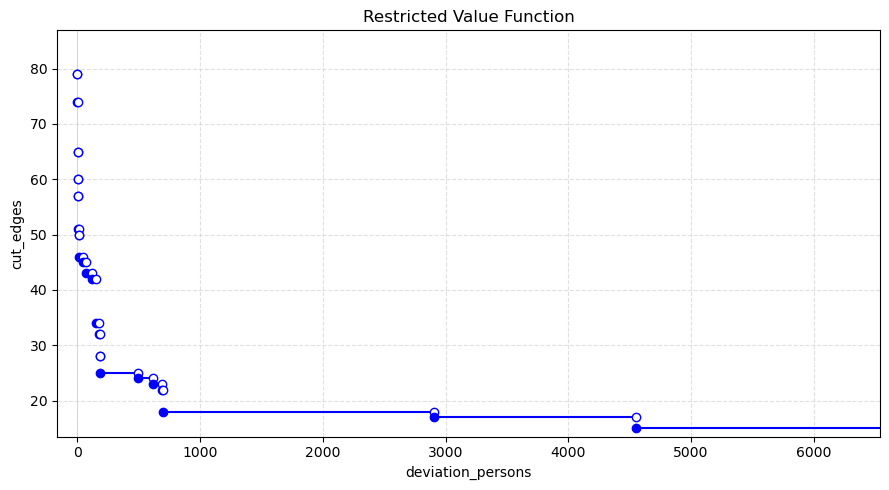

In [12]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             )


####################################################################################################
Pareto maps for state NE, objective cut_edges
####################################################################################################



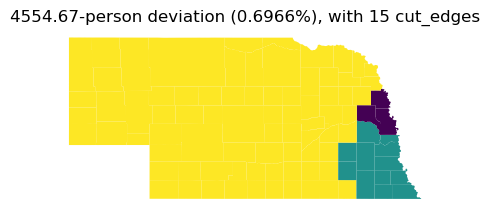

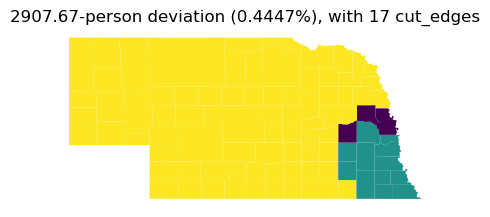

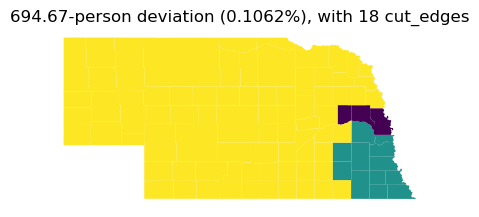

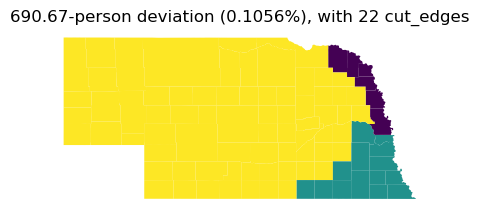

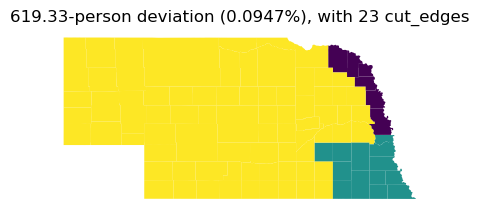

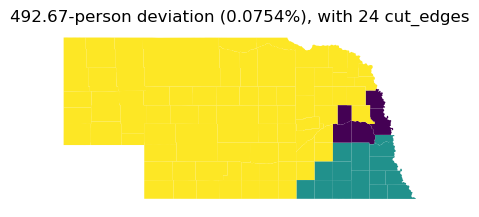

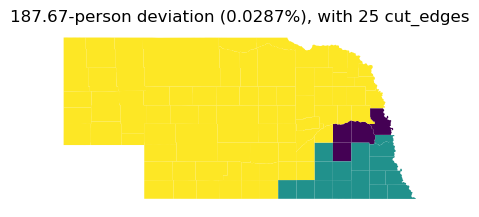

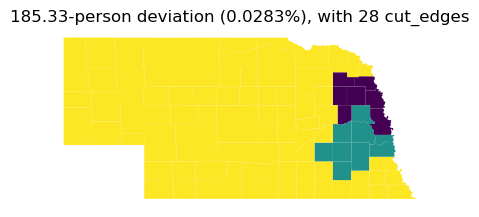

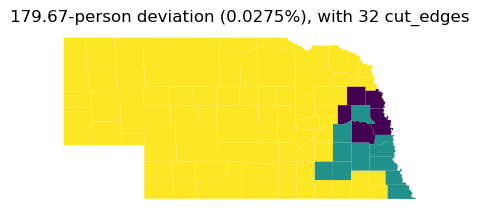

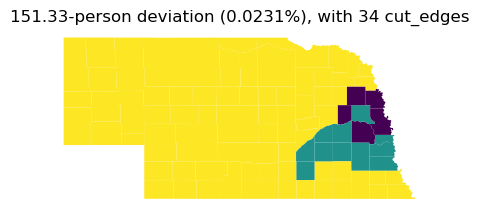

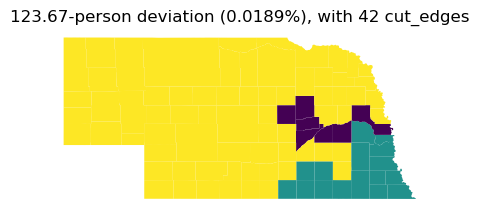

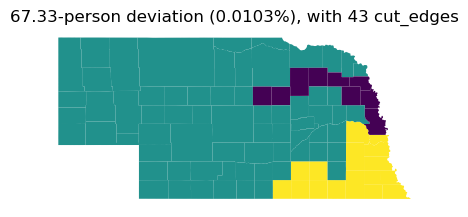

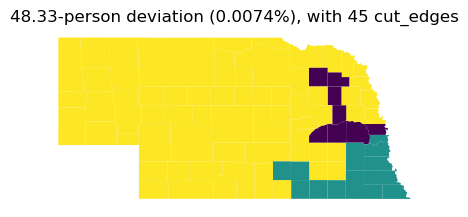

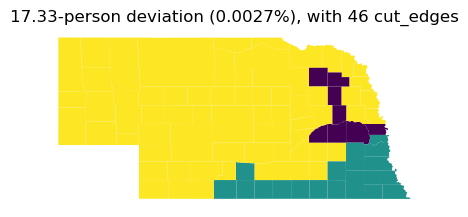

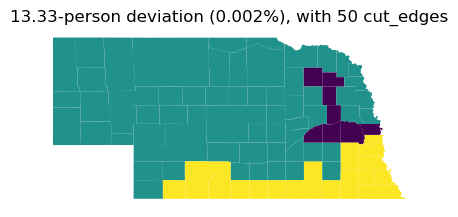

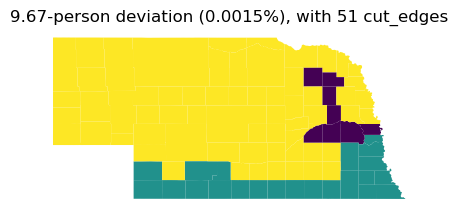

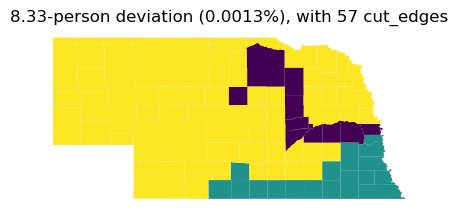

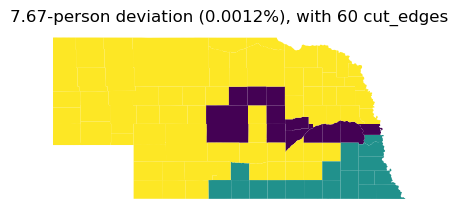

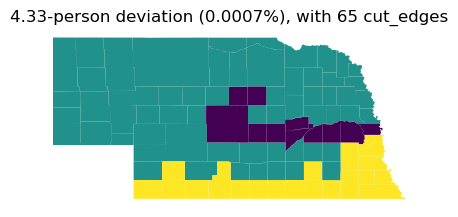

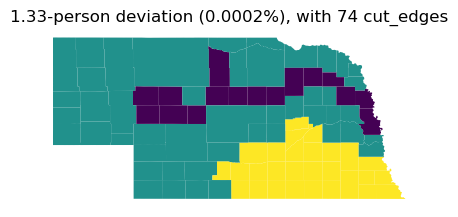

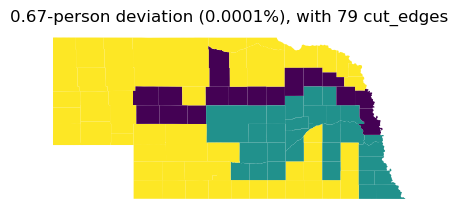

In [13]:
from draw import draw_plan

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)